In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
fifa=pd.read_csv('SoFifa_data.csv',index_col=0)
fifa

# Can add (contract end - current year) to check if remaining contract plays a role in determining market value

Name  Age Overall rating Potential      ID  Height_cm  \
0         Y. Moukoko   18             77        87  240833        179   
1       M. El Arouch   19             66        81  269852        166   
2     Yang Min Hyeok   17             53        68   71106        171   
3             H. Ito   24             78        81  234205        188   
4        N. Mazraoui   25             81        83  236401        183   
...              ...  ...            ...       ...     ...        ...   
5720         R. Yapi   22             63        72  252707        178   
5721         B. Barr   22             54        57  252756        177   
5722  22 K. Ouattara   22             57        63  252772        174   
5723     K. Bąkowski   20             62        76  252783        190   
5724   R. Neshcheret   21             65        75  252789        190   

      Weight_kg   foot Best position  Growth        Joined Loan date end  \
0            72   Left            ST      10  Nov 20, 2020           NaN   
1            64  Right           CAM      15  May 10, 2022           NaN   
2            61  Right            RM      15  Dec 29, 2023           NaN   
3            84   Left            CB       3  May 20, 2022           NaN   
4            65  Right            RM       2   Jul 1, 2022           NaN   
...         ...    ...           ...     ...           ...           ...   
5720         70  Right            RB       9   Sep 1, 2023           NaN   
5721         71  Right           CAM       3  Feb 14, 2023           NaN   
5722         69   Left            LB       6   Jan 7, 2020           NaN   
5723         75  Right            GK      14   Feb 4, 2019  Jun 30, 2024   
5724         81  Right            GK      10   Jan 1, 2019           NaN   

      Total attacking Crossing Finishing Heading accuracy Short passing  \
0                 343       47        79               69            71   
1                 269       58        56               32            67   
2                 223       52        53               33            43   
3                 311       68        48               74            76   
4                 352       79        69               65            83   
...               ...      ...       ...              ...           ...   
5720              205       56        24               44            50   
5721              208       36        39               41            59   
5722              177       45        30               35            42   
5723               64        8         7               12            31   
5724               98       10         9               14            56   

     Volleys  Total skill Dribbling Curve FK Accuracy Long passing  \
0         77          318        79    68          42           48   
1         56          336        73    65          62           64   
2         42          224        61    44          31           37   
3         45          320        68    52          45           80   
4         56          354        83    69          42           76   
...      ...          ...       ...   ...         ...          ...   
5720      31          220        63    38          27           39   
5721      33          223        53    45          26           44   
5722      25          220        58    40          38           28   
5723       6           84        15    12          11           32   
5724       9          110        11    10          12           61   

     Ball control  Total movement Acceleration Sprint speed Agility Reactions  \
0              81             409           82           79      85        77   
1              72             382           77           71      88        58   
2              51             331           67           70      72        39   
3              75             379           81           81      66        82   
4              84             393           83           75      86        79  

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5725 entries, 0 to 5724
Data columns (total 75 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      5725 non-null   object 
 1   Age                       5725 non-null   int64  
 2   Overall rating            5725 non-null   int64  
 3   Potential                 5725 non-null   int64  
 4   ID                        5725 non-null   int64  
 5   Height_cm                 5725 non-null   int64  
 6   Weight_kg                 5725 non-null   int64  
 7   foot                      5725 non-null   object 
 8   Best position             5725 non-null   object 
 9   Growth                    5725 non-null   int64  
 10  Joined                    5725 non-null   object 
 11  Loan date end             677 non-null    object 
 12  Total attacking           5725 non-null   int64  
 13  Crossing                  5725 non-null   int64  
 14  Finishing    

In [12]:
#Numerical Features
# Not taking ID

Numeric_features=[feature for feature in data.columns if (data[feature].dtype !='object' and feature!='ID')]

Numeric_features,len(Numeric_features)

(['Age',
  'Overall rating',
  'Potential',
  'Height_cm',
  'Weight_kg',
  'Growth',
  'Total attacking',
  'Crossing',
  'Finishing',
  'Heading accuracy',
  'Short passing',
  'Volleys',
  'Total skill',
  'Dribbling',
  'Curve',
  'FK Accuracy',
  'Long passing',
  'Ball control',
  'Total movement',
  'Acceleration',
  'Sprint speed',
  'Agility',
  'Reactions',
  'Balance',
  'Total power',
  'Shot power',
  'Jumping',
  'Stamina',
  'Strength',
  'Long shots',
  'Total mentality',
  'Aggression',
  'Interceptions',
  'Att. Position',
  'Vision',
  'Penalties',
  'Composure',
  'Total defending',
  'Defensive awareness',
  'Standing tackle',
  'Sliding tackle',
  'Total goalkeeping',
  'GK Diving',
  'GK Handling',
  'GK Kicking',
  'GK Positioning',
  'GK Reflexes',
  'Total stats',
  'Base stats',
  'Weak foot',
  'Skill moves',
  'International reputation',
  'Pace / Diving',
  'Shooting / Handling',
  'Passing / Kicking',
  'Dribbling / Reflexes',
  'Defending / Pace',
  'Phy

In [13]:
# Numerical Features can usually be of two types: Continuous or Discrete

# Checking for the no. of unique values in each numerical feature

for feature in Numeric_features:
    print(feature)
    print('{} length: {}'.format(data[feature].unique(),data[feature].nunique()))


Age
[18 19 17 24 25 27 20 21 22 38 16 23 26 30 36 31 29 33 32 28 34 37 35 44
 39 40] length: 26
Overall rating
[77 66 53 78 81 84 75 69 76 73 82 79 86 80 72 71 65 88 70 83 74 91 68 90
 85 87 89 67 62 64 61 59 60 63 58 57 55 54 52 56 49 50 47 51 48 46] length: 46
Potential
[87 81 68 83 85 82 88 86 89 90 84 92 74 94 77 93 80 78 91 75 79 70 72 76
 67 65 73 71 66 69 63 64 61 62 60 54 59 56 46 53 58 48 55 57 52] length: 45
Height_cm
[179 166 171 188 183 189 174 187 182 193 190 191 181 175 178 169 184 172
 177 173 185 186 180 170 176 195 192 168 194 197 167 196 199 163 165 206
 161 200 164 201 198 162 203 202 158 160 205] length: 47
Weight_kg
[ 72  64  61  84  65  83  74  80  86  76  82  75  90  89  79  85  66  67
  70  68  77  78  71  73  69  62  60  63  81  94  87  88  58  92  96  56
  91  98  95  93 100  99  59  55  97  57 101  53 103 110] length: 50
Growth
[10 15  3  2  1 19  7 12  9  5  8 11  0 16  6 13 14 22  4 18 21 20 24 25
 17 23 26] length: 27
Total attacking
[343 269 223 311 352 3

In [14]:
# Let's assume that the features which have more than 27 unique values are Continuous and those which have less are Discrete

#Continuous Features

Cont_features=[feature for feature in Numeric_features if data[feature].nunique()>27]

Cont_features,len(Cont_features)

(['Overall rating',
  'Potential',
  'Height_cm',
  'Weight_kg',
  'Total attacking',
  'Crossing',
  'Finishing',
  'Heading accuracy',
  'Short passing',
  'Volleys',
  'Total skill',
  'Dribbling',
  'Curve',
  'FK Accuracy',
  'Long passing',
  'Ball control',
  'Total movement',
  'Acceleration',
  'Sprint speed',
  'Agility',
  'Reactions',
  'Balance',
  'Total power',
  'Shot power',
  'Jumping',
  'Stamina',
  'Strength',
  'Long shots',
  'Total mentality',
  'Aggression',
  'Interceptions',
  'Att. Position',
  'Vision',
  'Penalties',
  'Composure',
  'Total defending',
  'Defensive awareness',
  'Standing tackle',
  'Sliding tackle',
  'Total goalkeeping',
  'GK Diving',
  'GK Handling',
  'GK Kicking',
  'GK Positioning',
  'GK Reflexes',
  'Total stats',
  'Base stats',
  'Pace / Diving',
  'Shooting / Handling',
  'Passing / Kicking',
  'Dribbling / Reflexes',
  'Defending / Pace',
  'Physical / Positioning',
  'Value_mill(€)',
  'Wage_thous(€)',
  'ReleaseClause_mill(€

In [15]:
# Discrete Features

Disc_features=[feature for feature in Numeric_features if feature not in Cont_features]

Disc_features,len(Disc_features)

(['Age',
  'Growth',
  'Weak foot',
  'Skill moves',
  'International reputation',
  'Number of playstyles'],
 6)

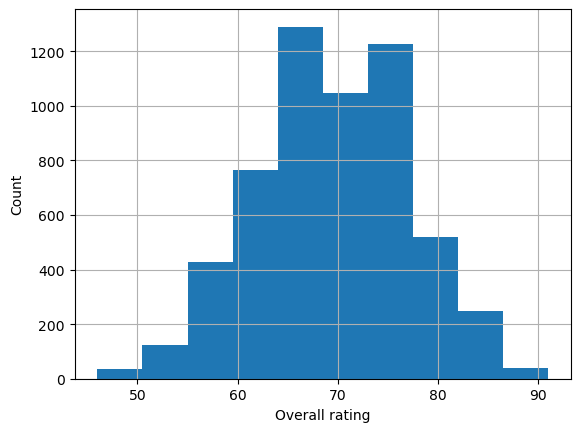

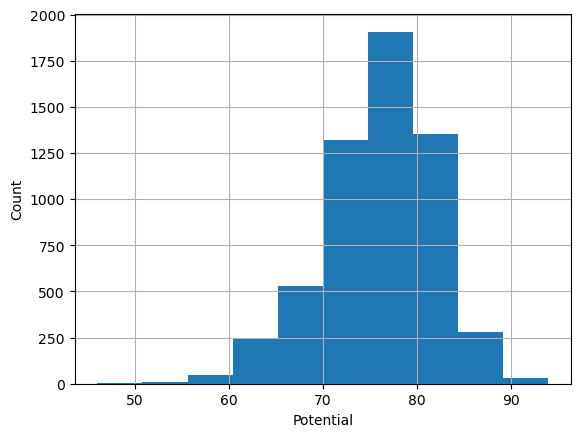

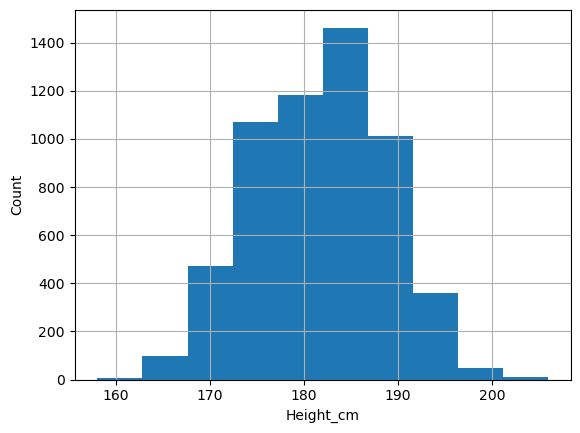

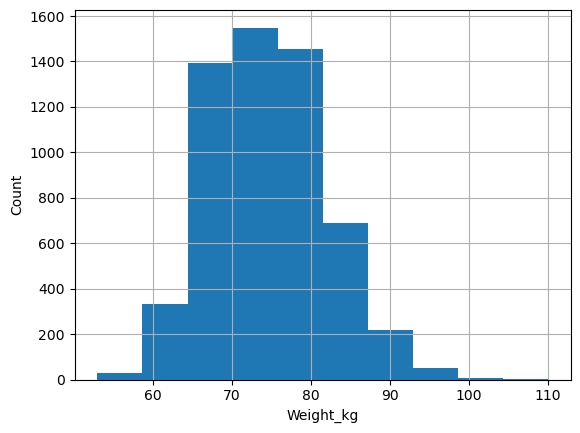

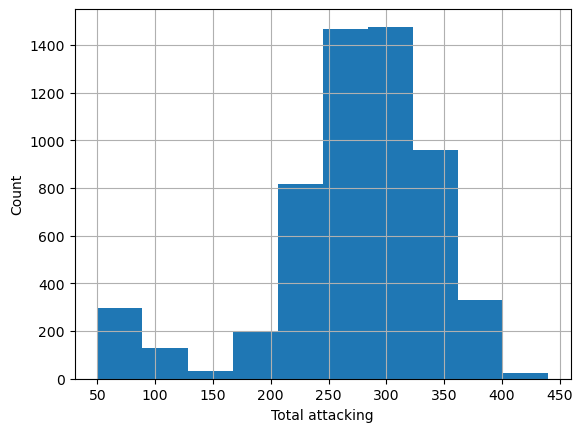

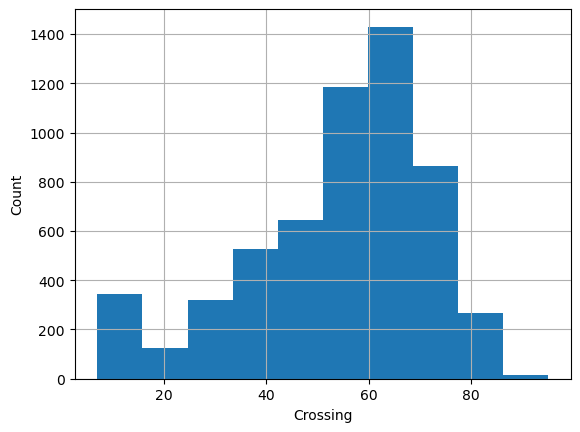

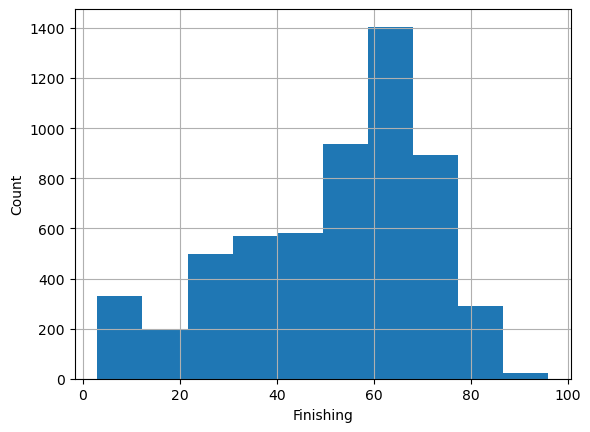

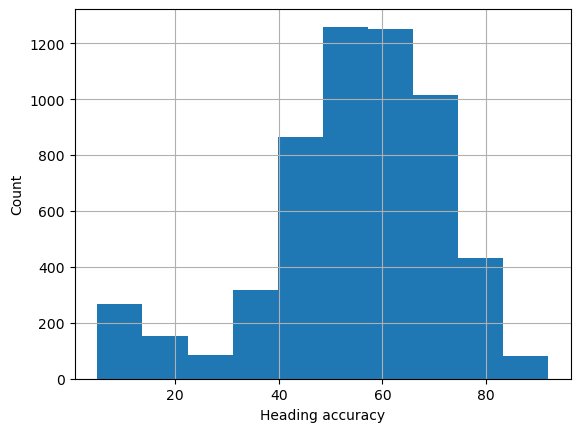

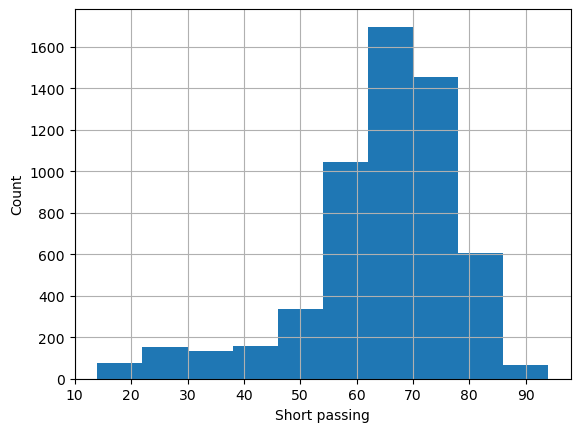

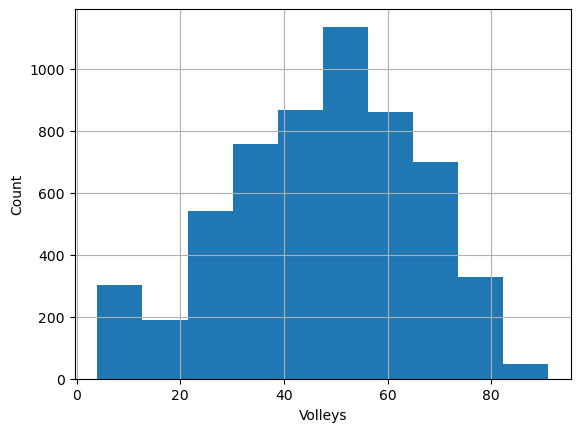

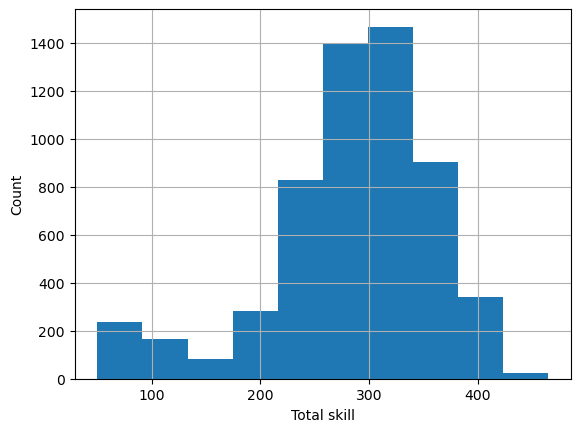

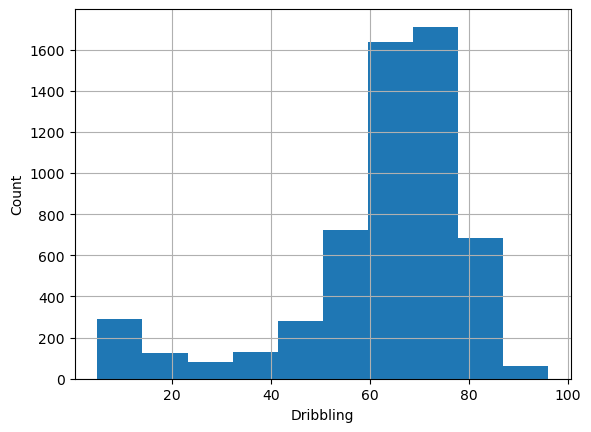

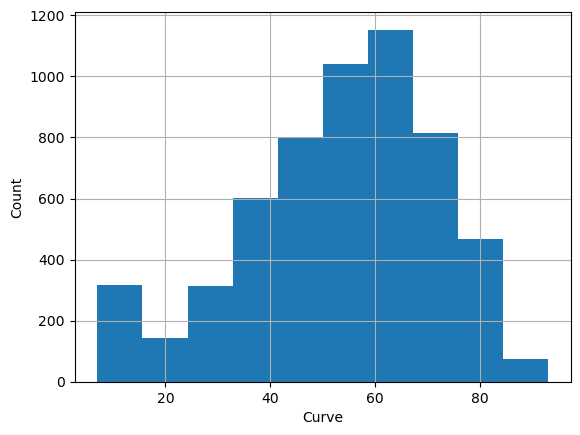

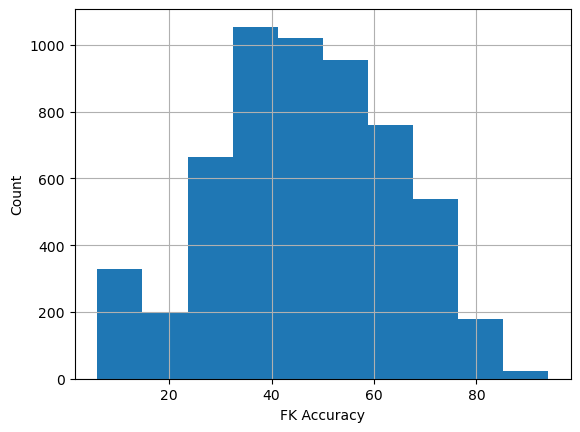

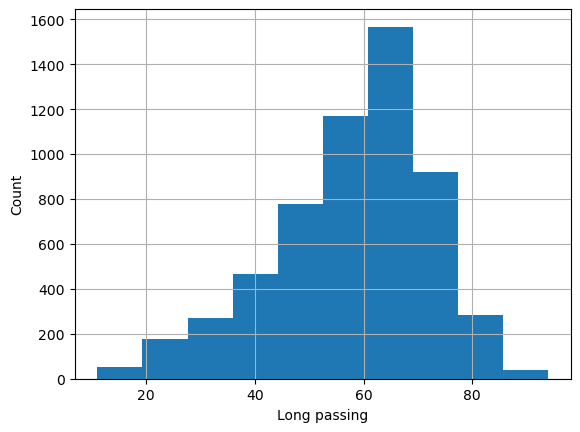

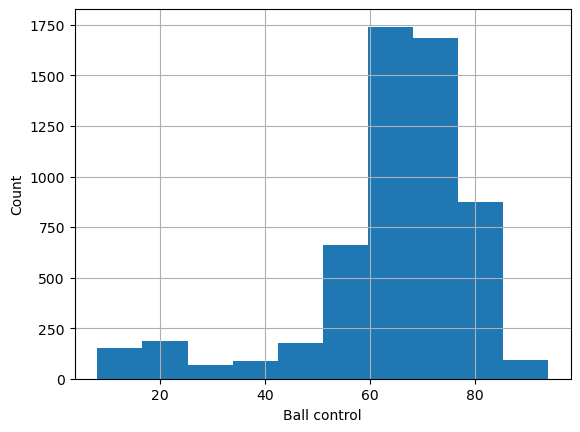

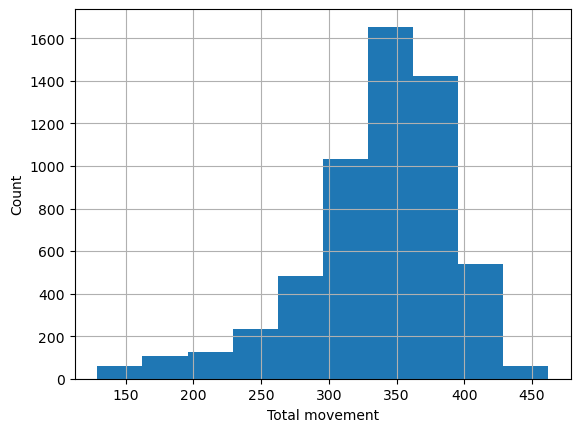

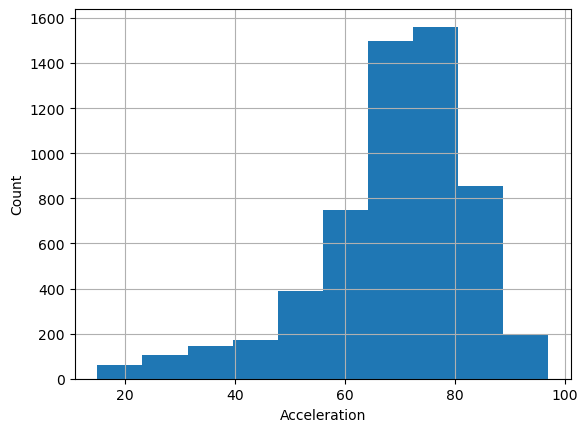

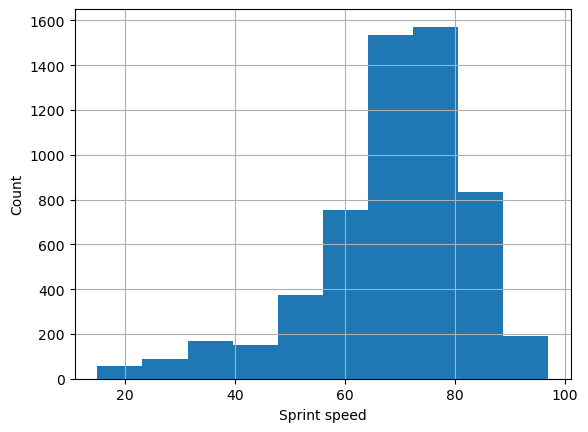

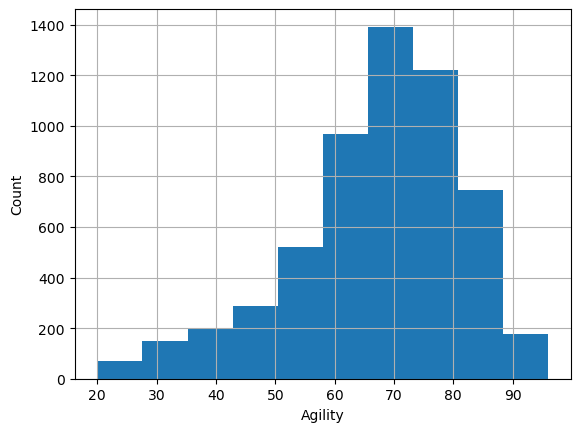

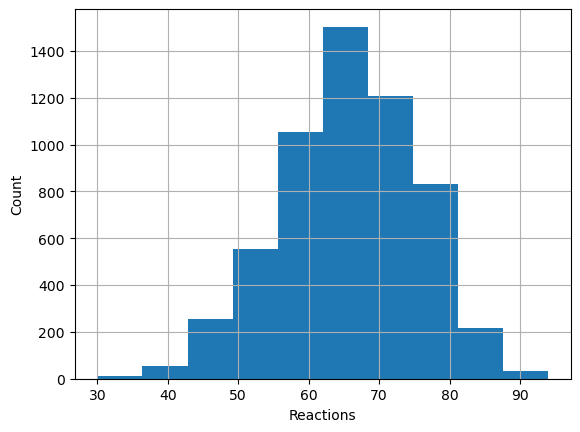

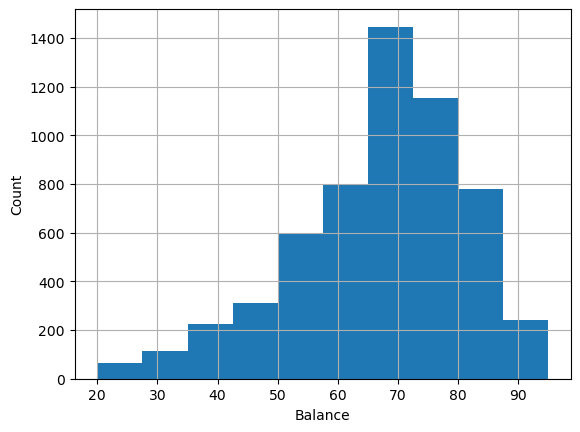

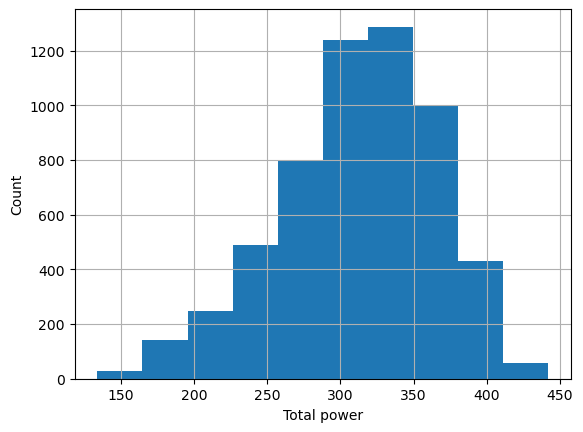

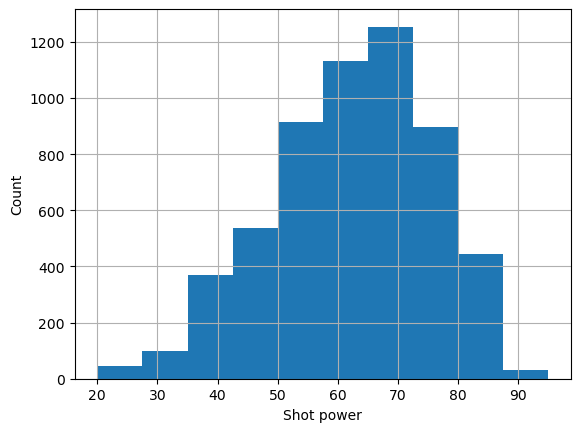

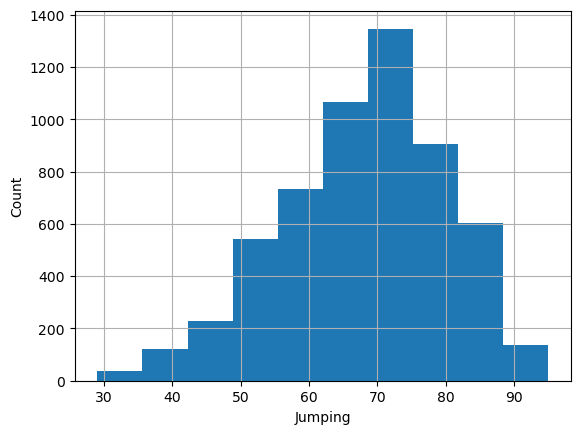

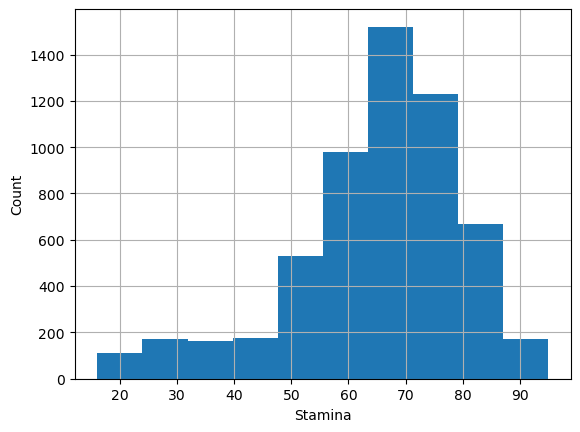

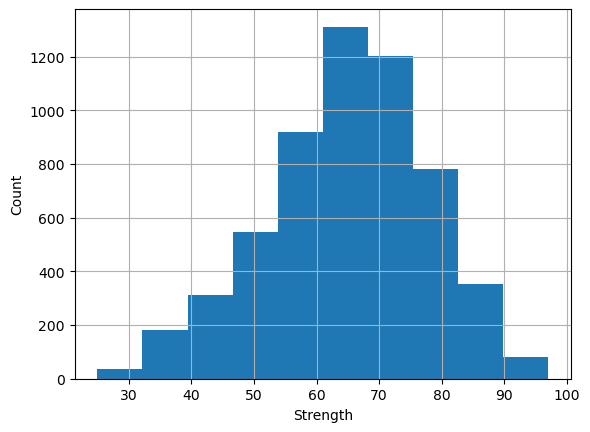

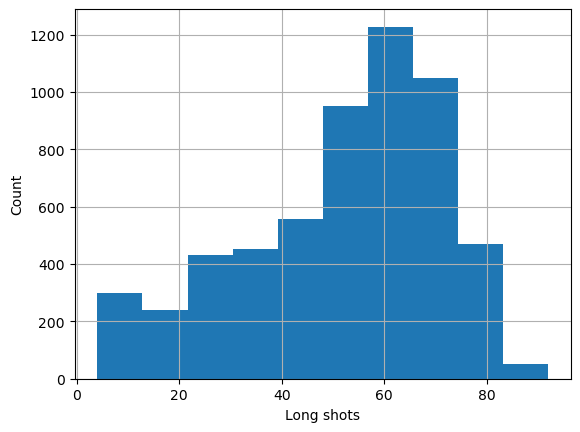

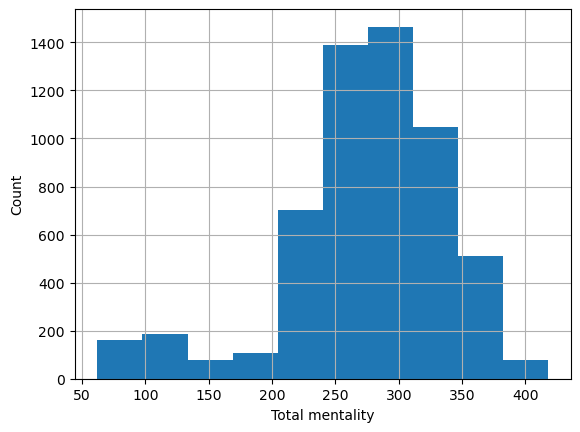

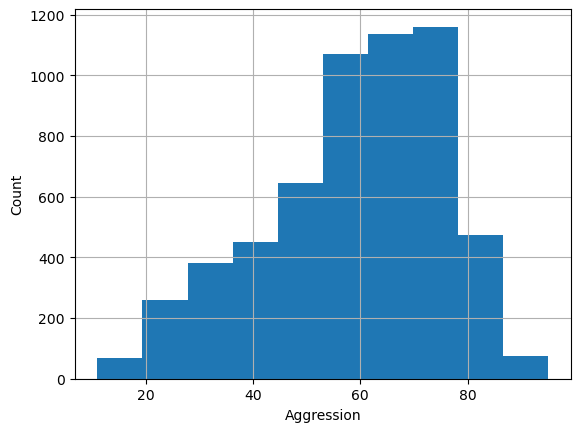

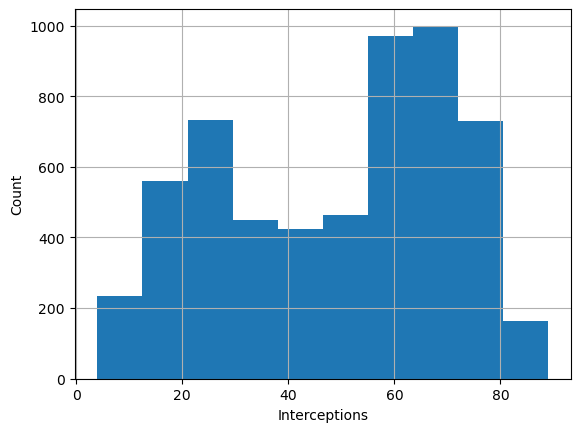

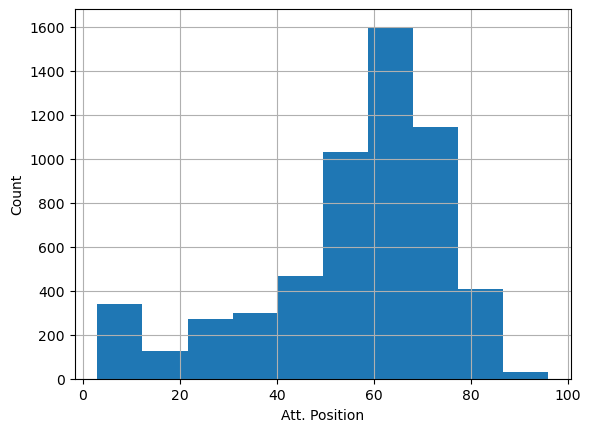

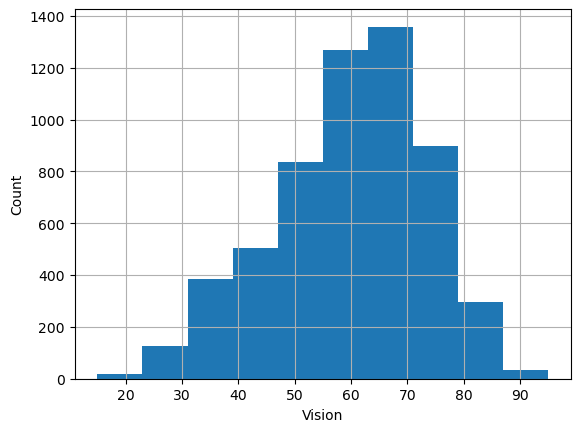

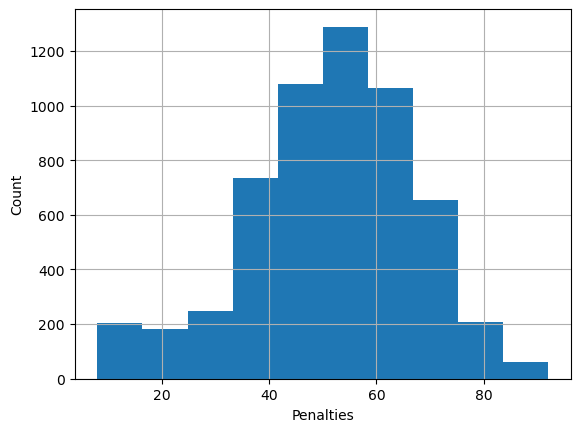

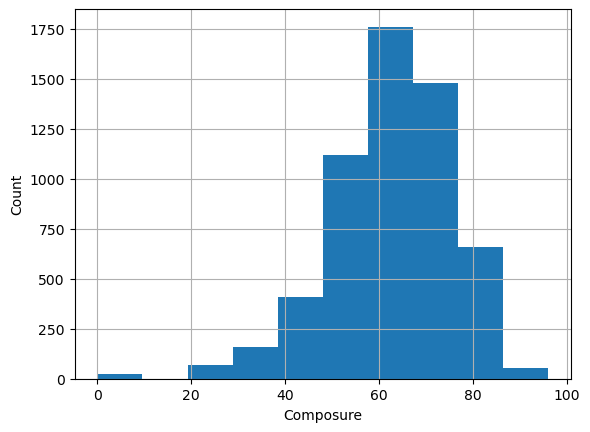

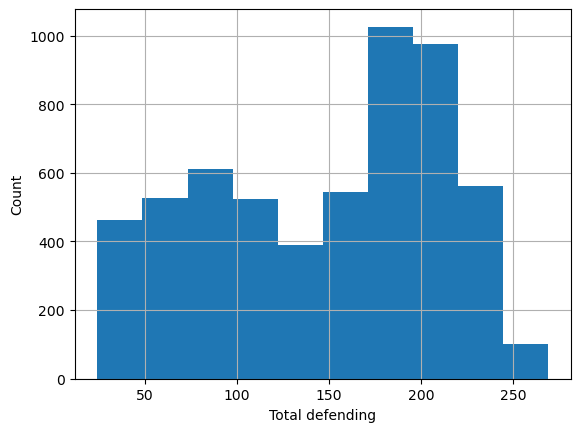

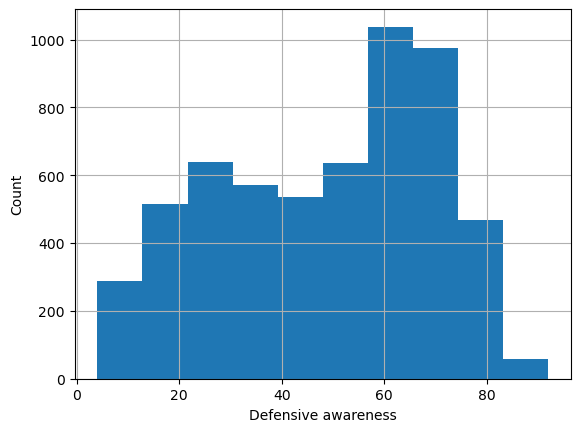

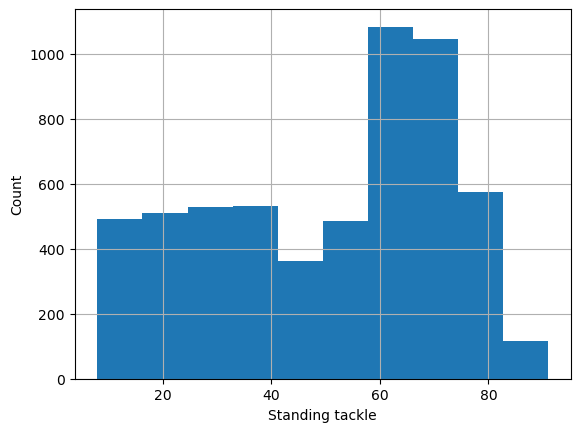

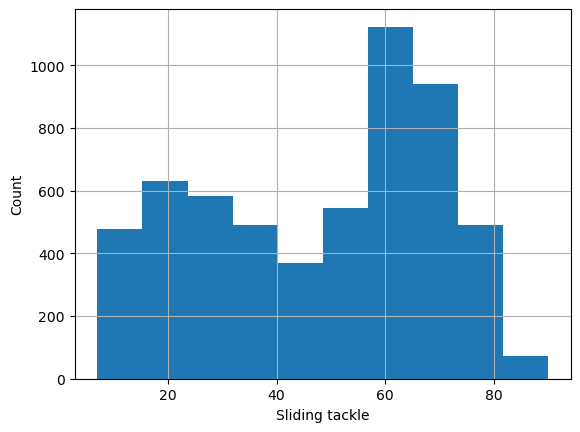

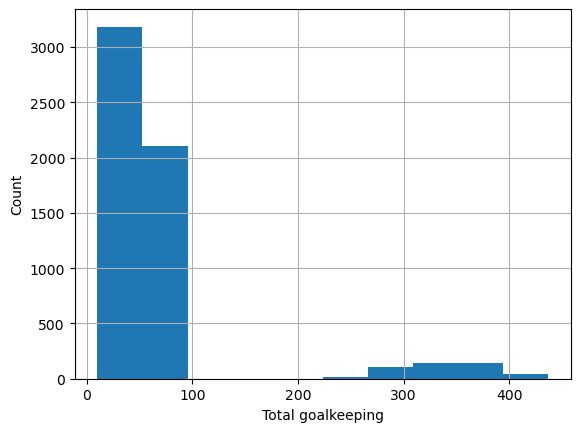

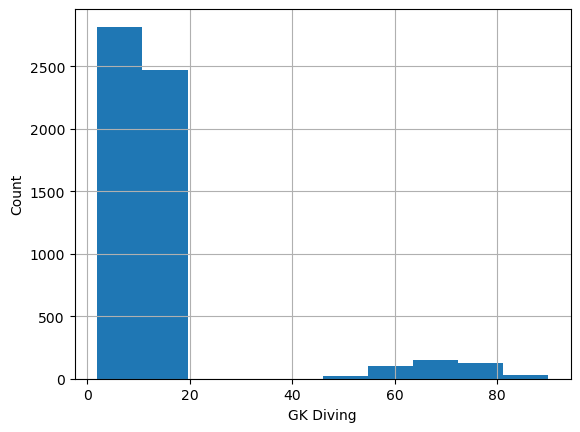

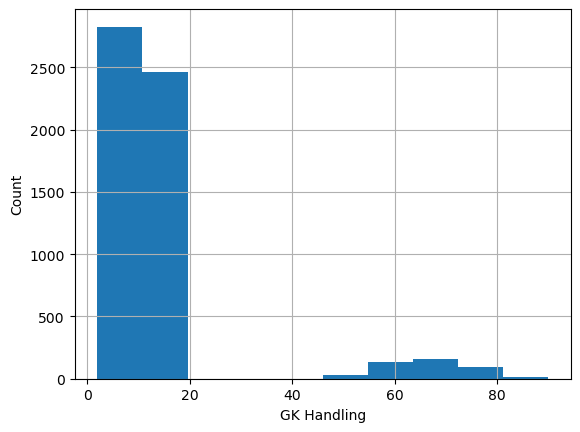

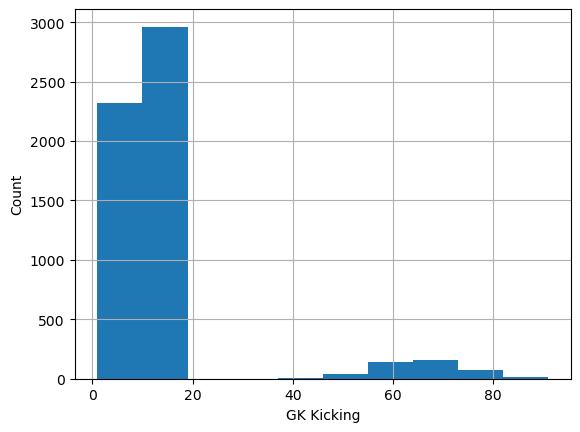

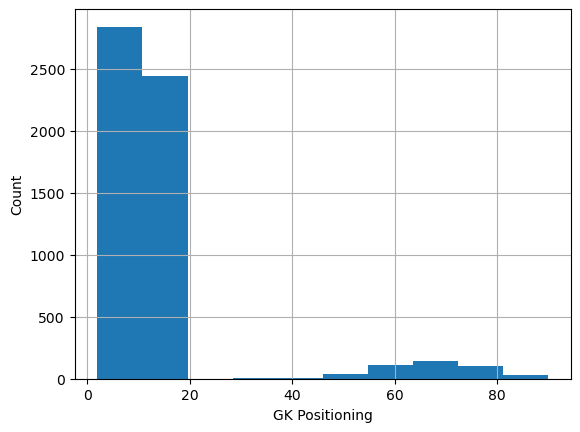

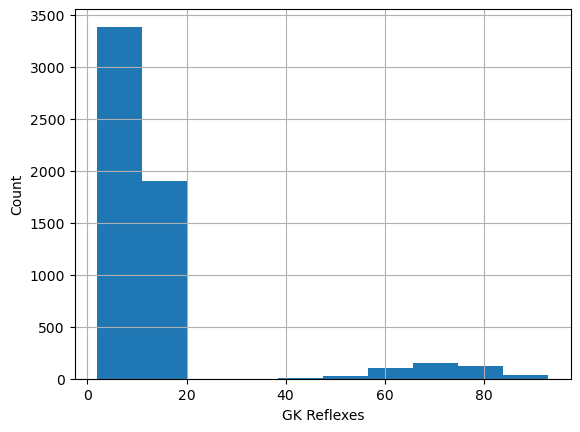

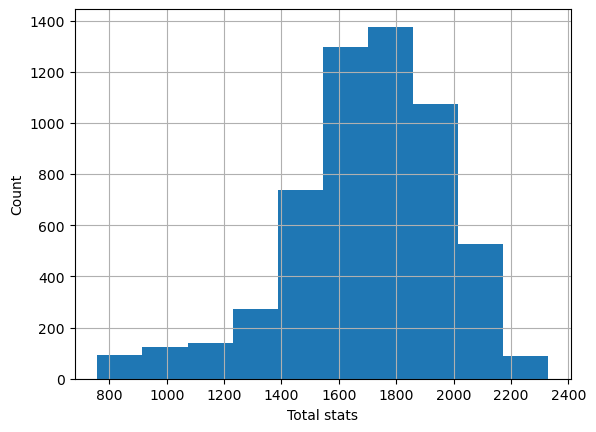

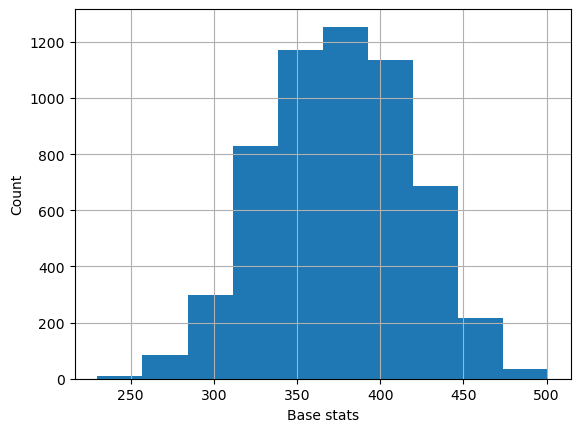

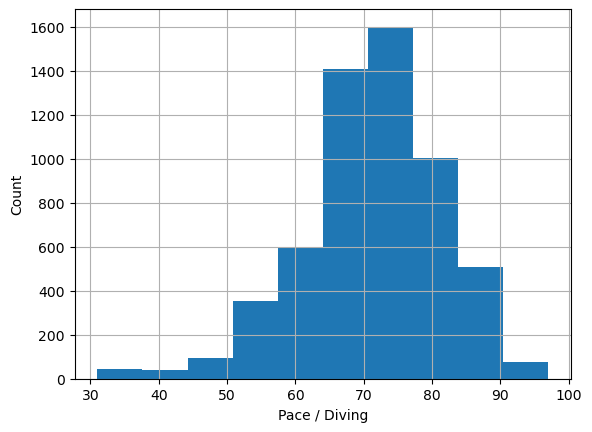

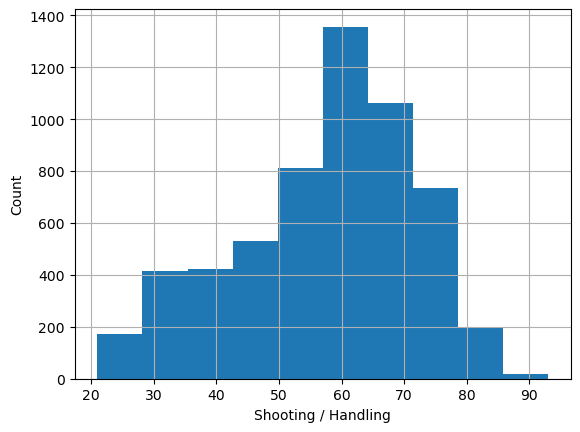

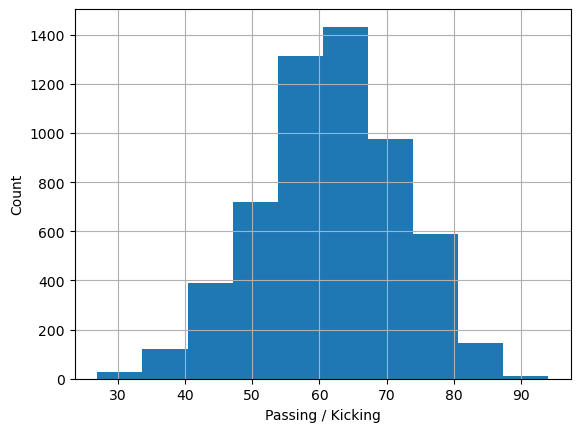

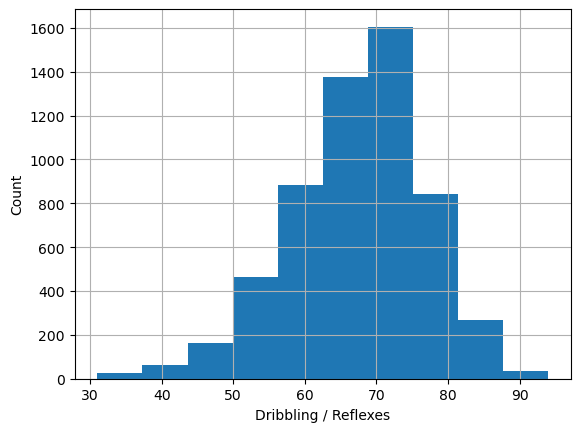

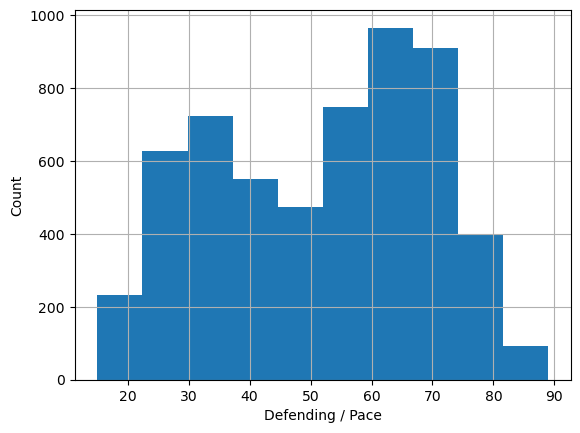

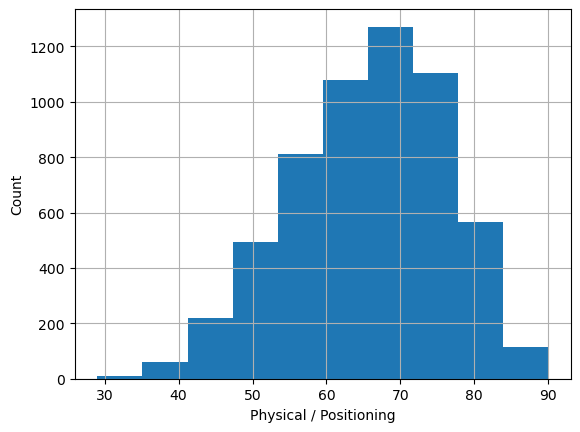

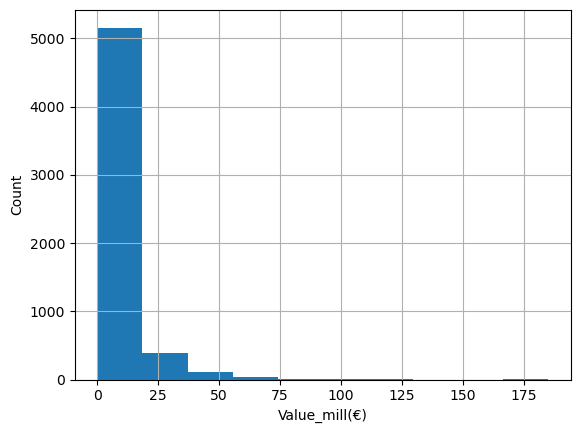

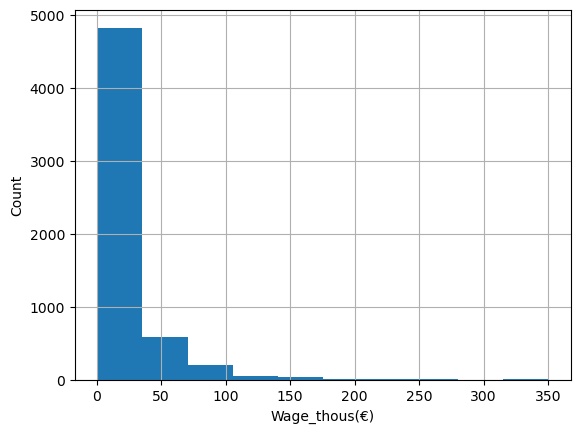

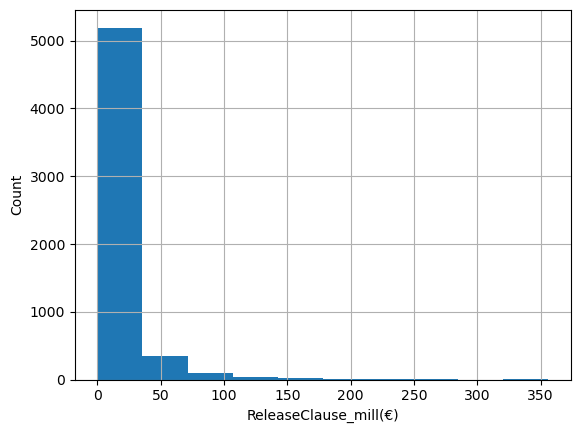

In [16]:
# Let's check the distribution of the continuous features

for feature in Cont_features:
    data[feature].hist()
#     bins=10 is default
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [17]:
# Data doesn't seem to be normally distributed (it's skewed)
# We have to perform log transformations

dataset=data.copy()
for feature in Numeric_features:
    dataset[feature]=np.log(dataset[feature]+1)

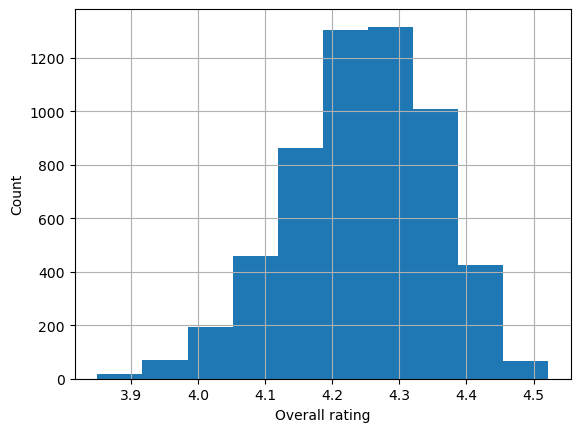

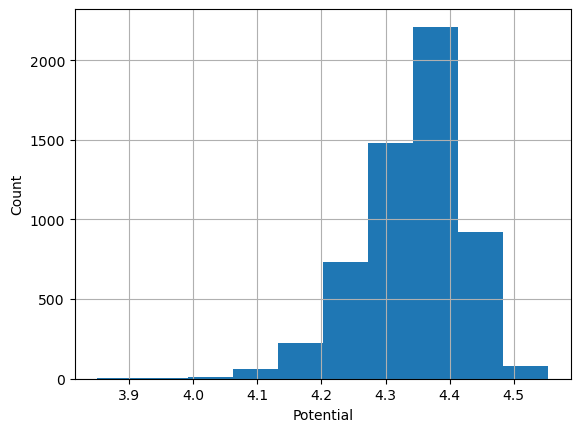

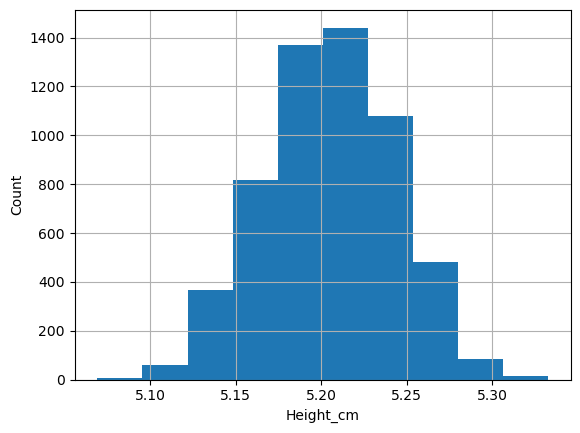

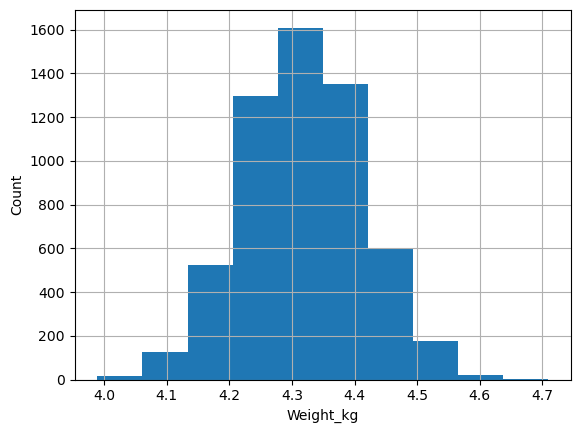

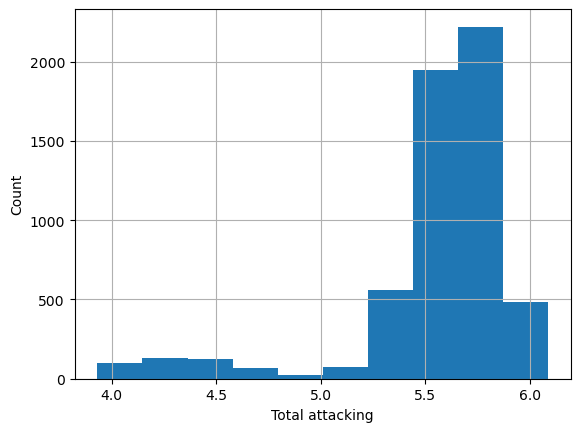

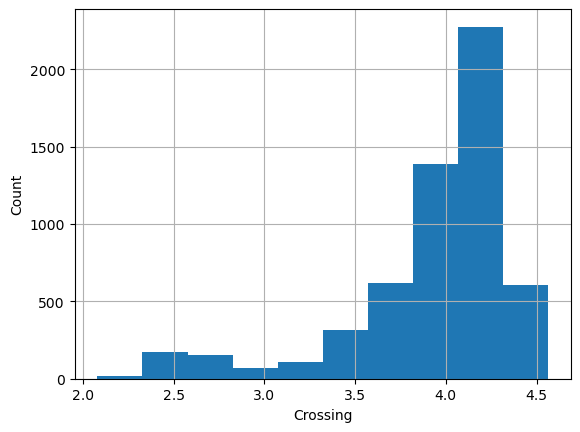

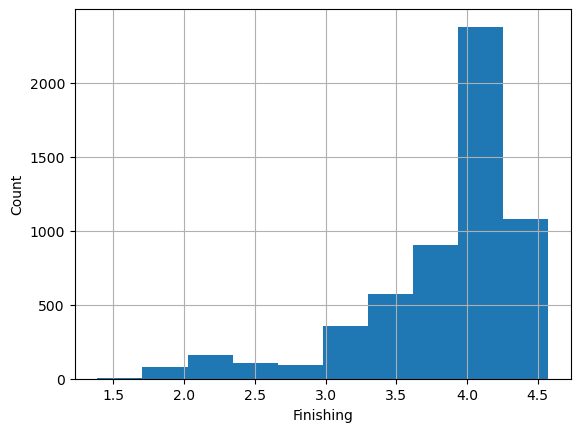

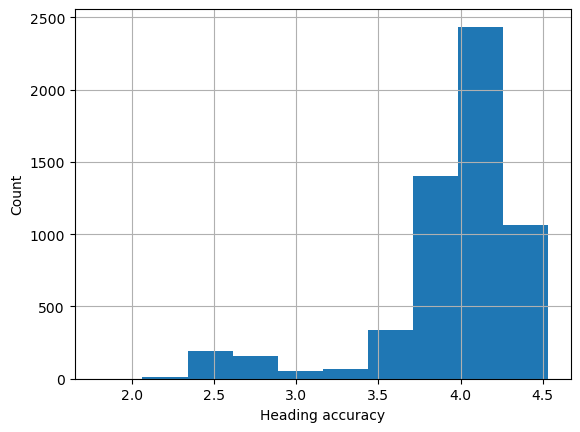

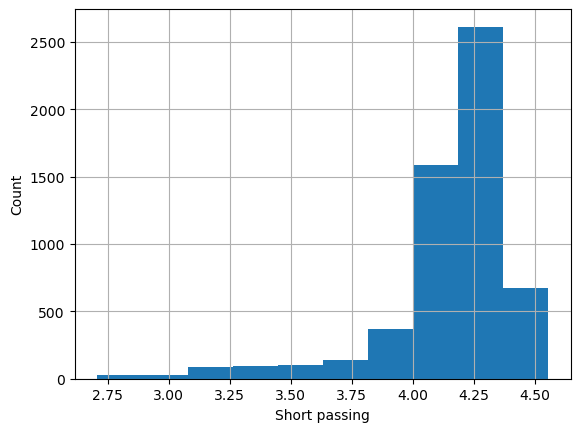

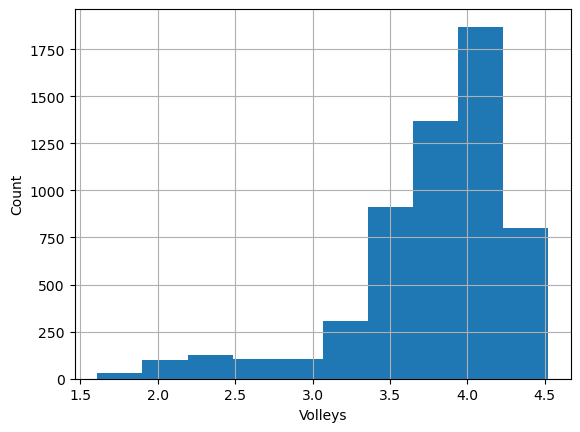

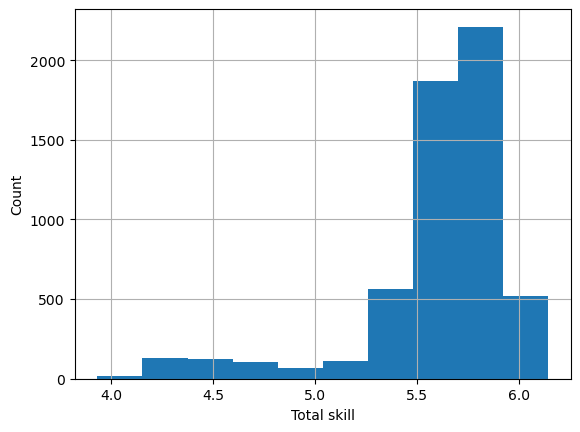

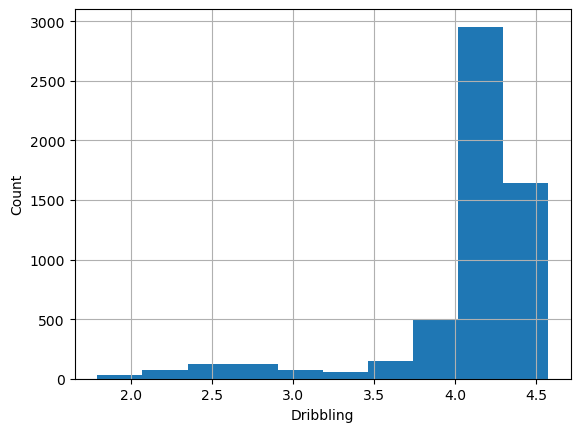

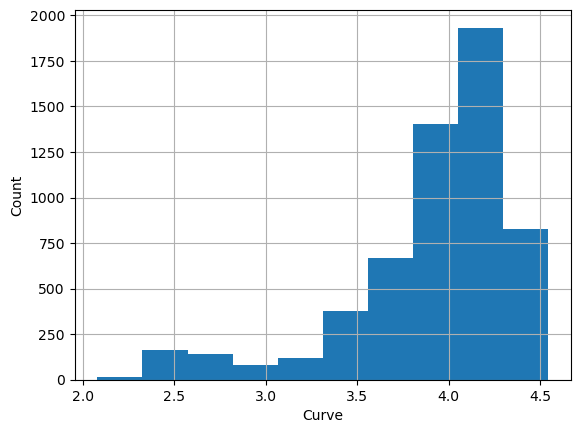

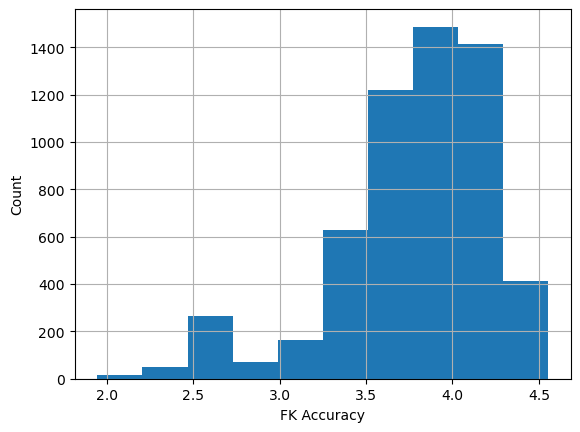

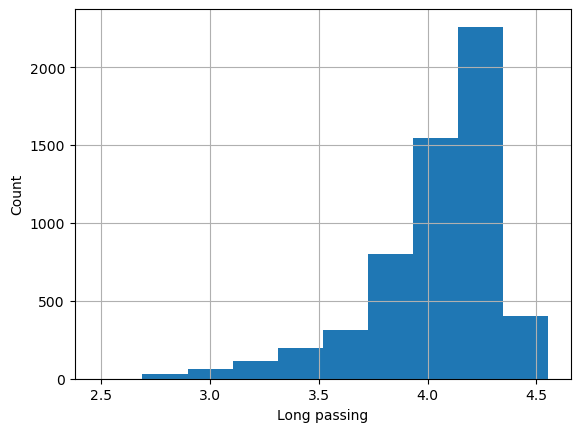

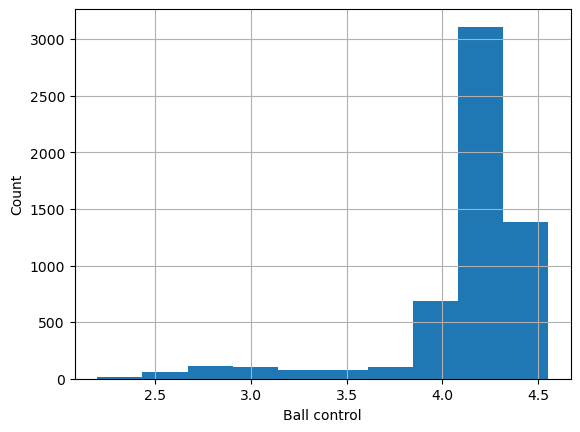

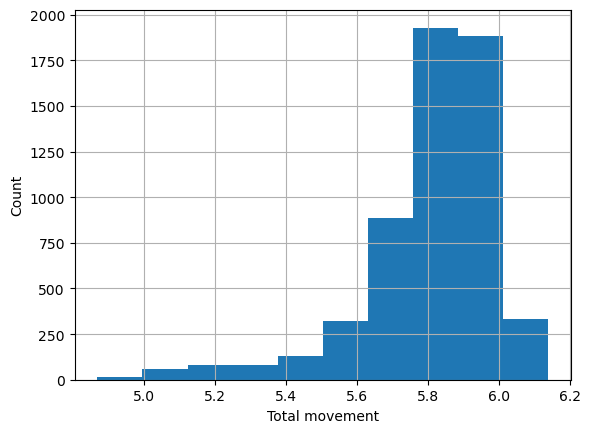

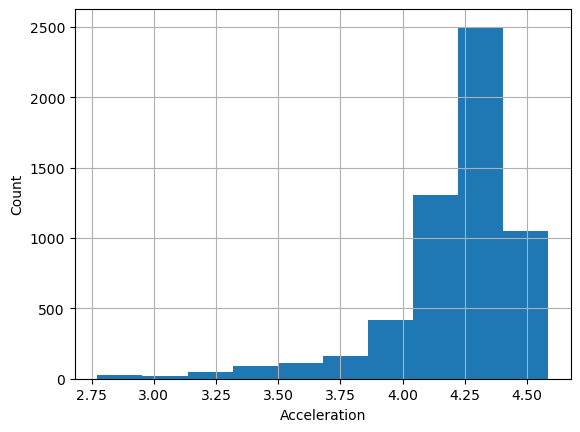

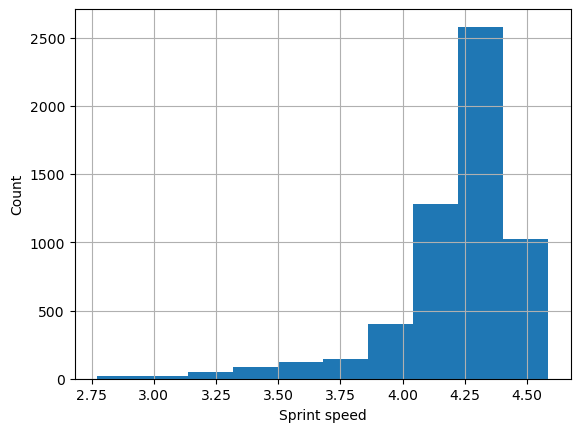

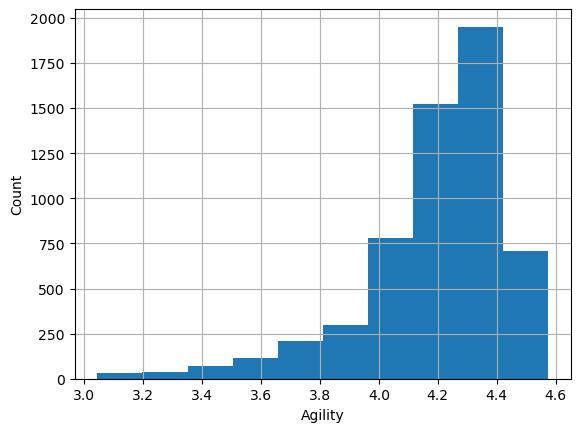

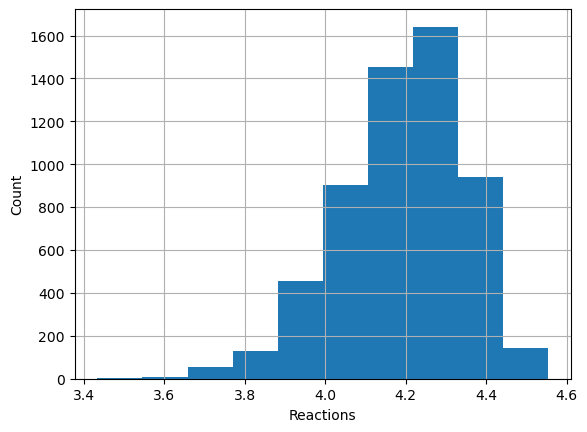

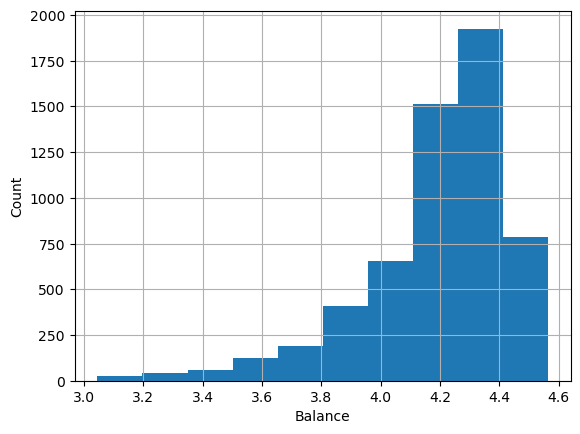

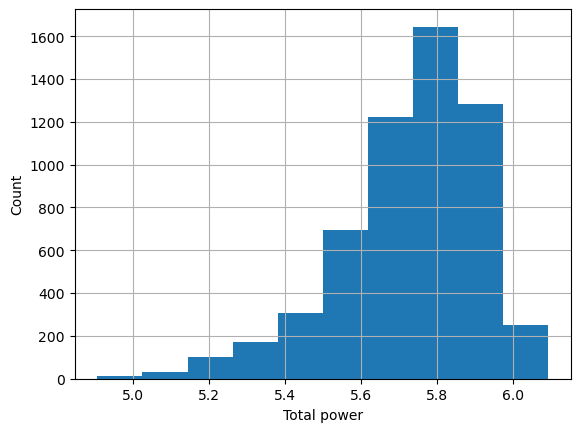

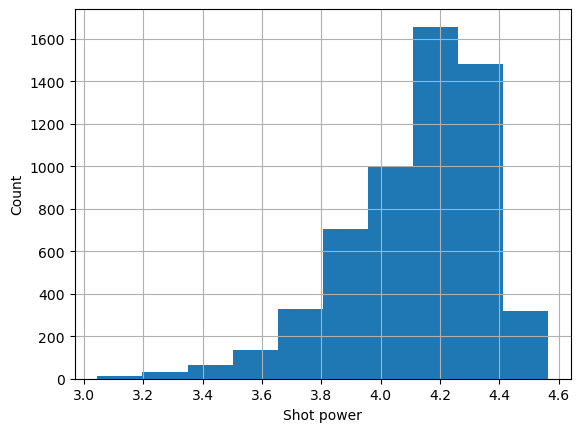

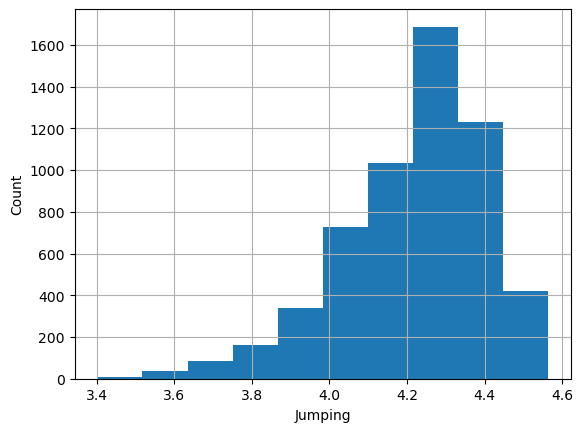

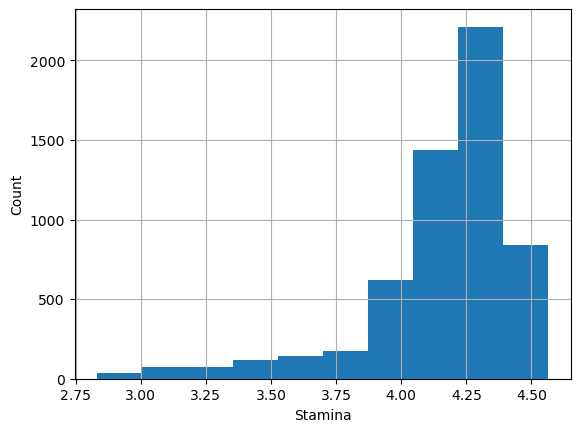

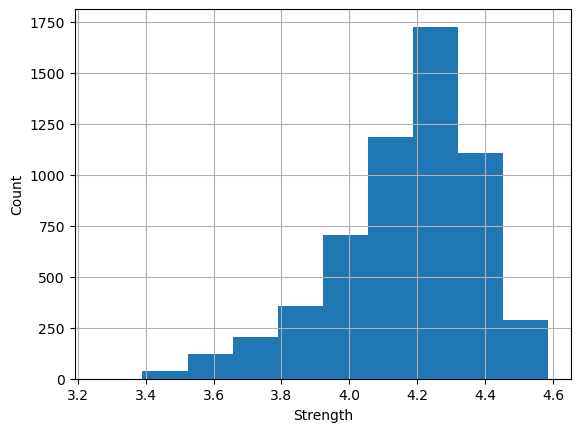

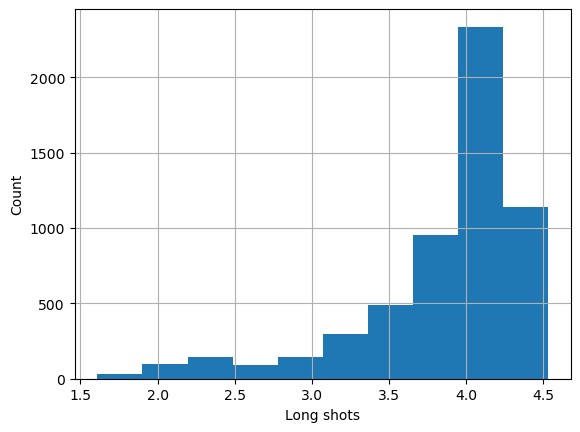

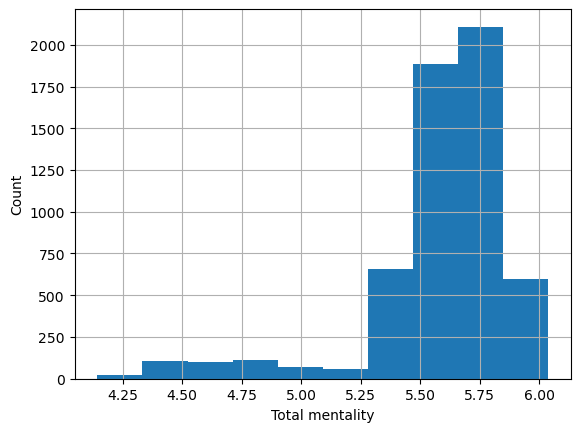

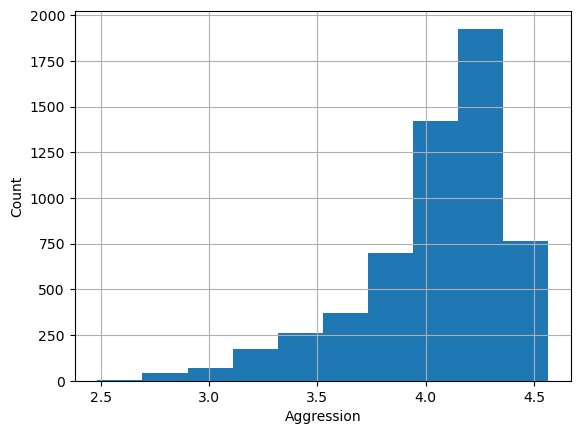

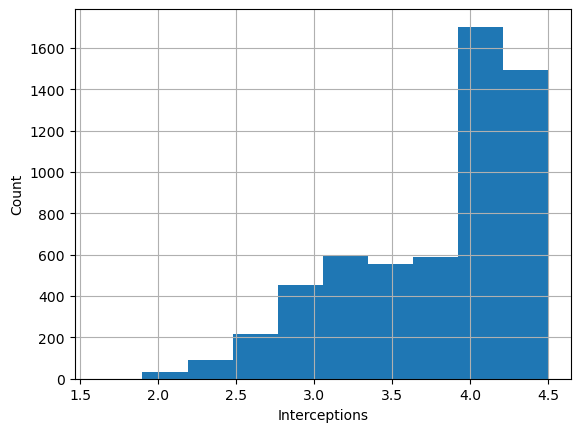

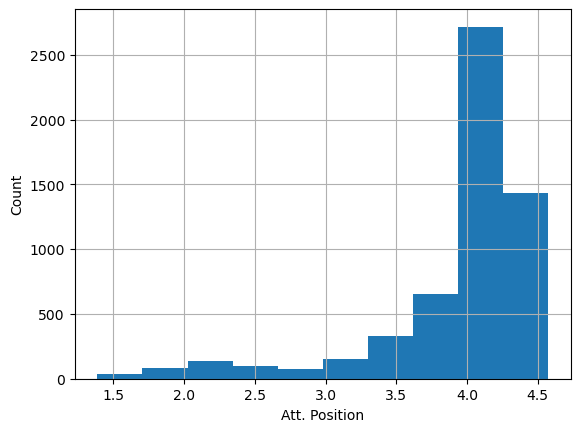

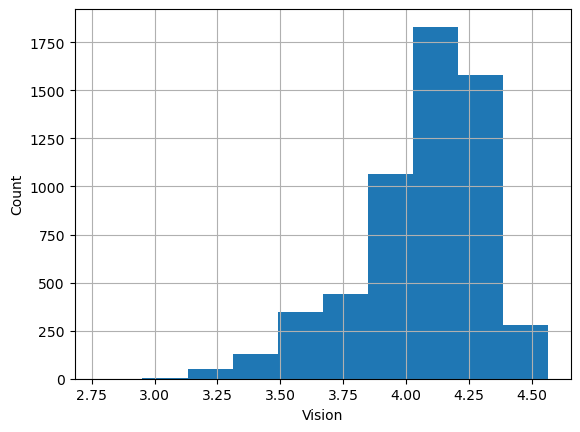

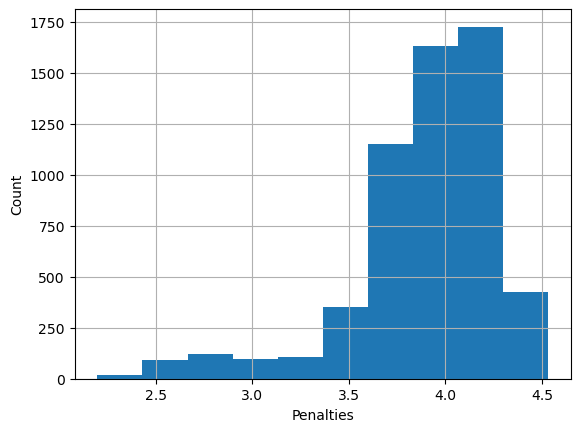

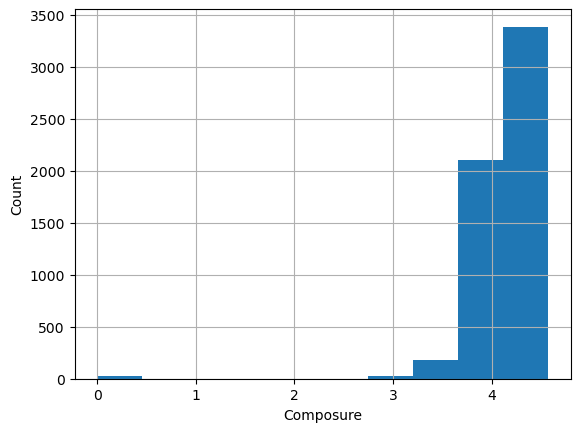

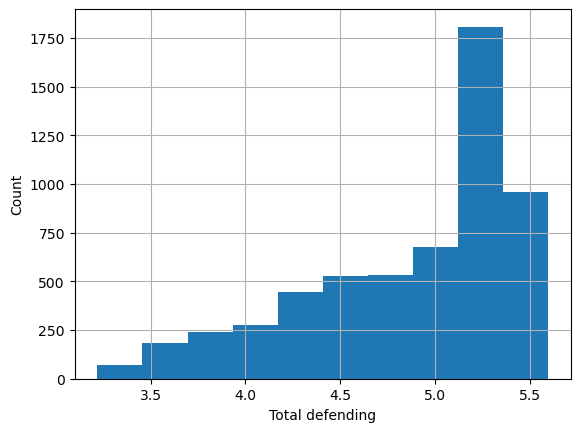

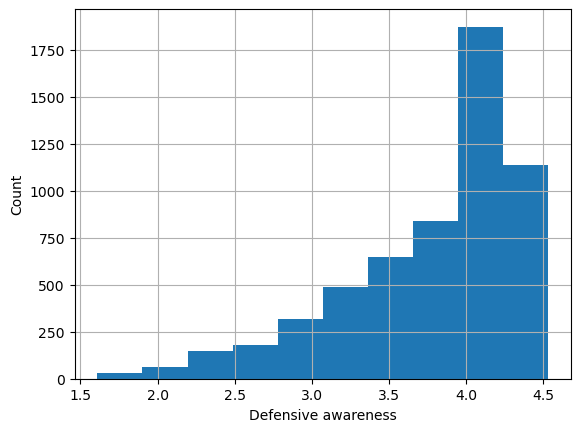

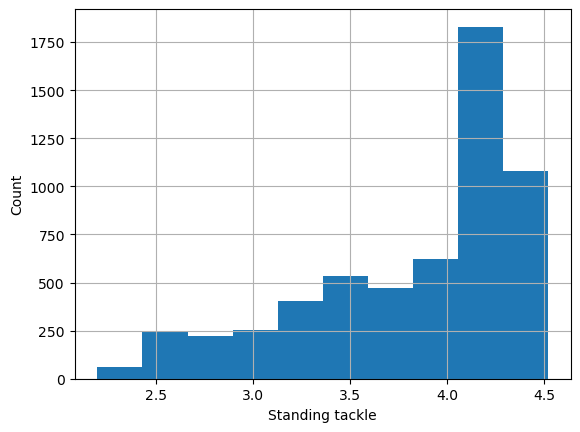

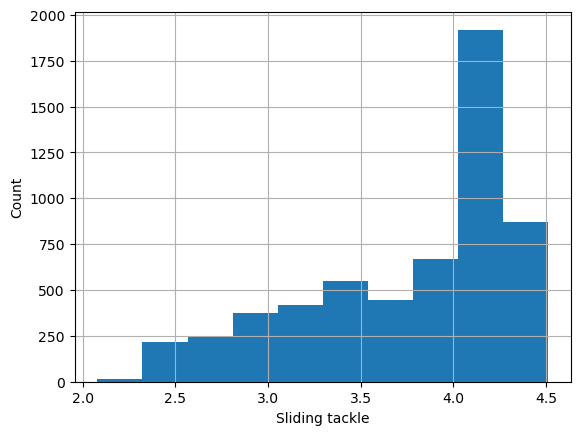

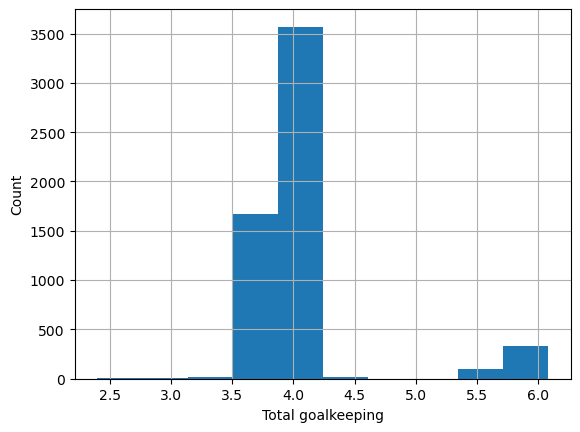

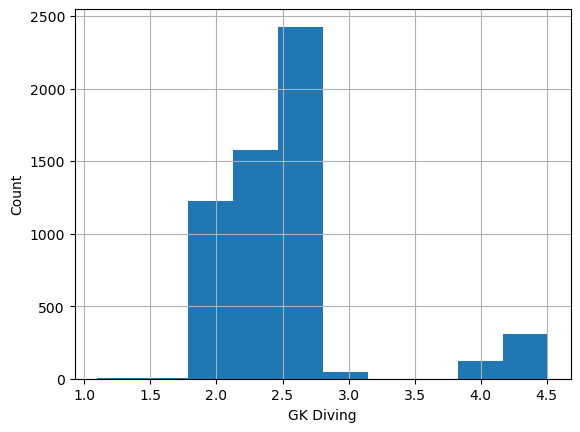

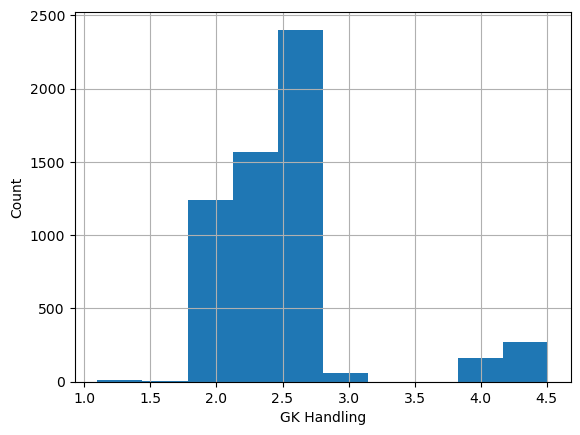

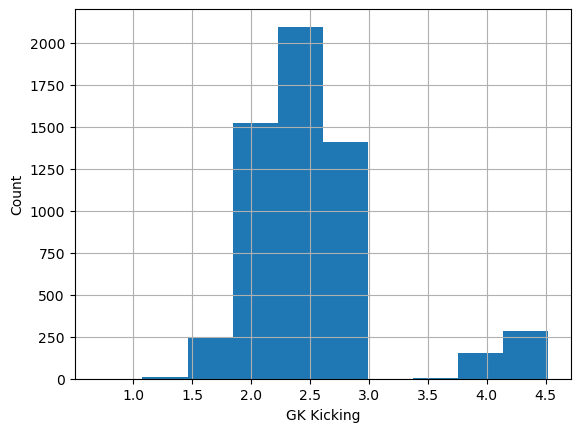

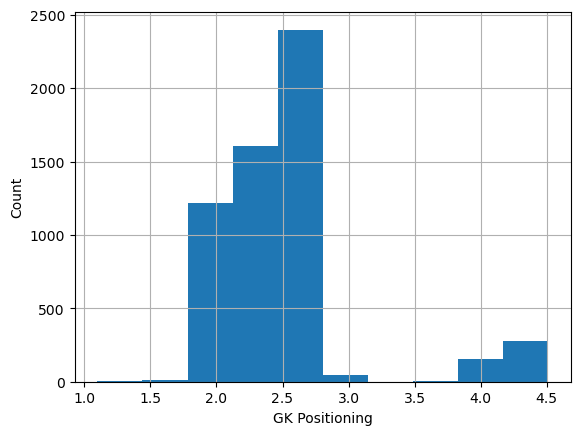

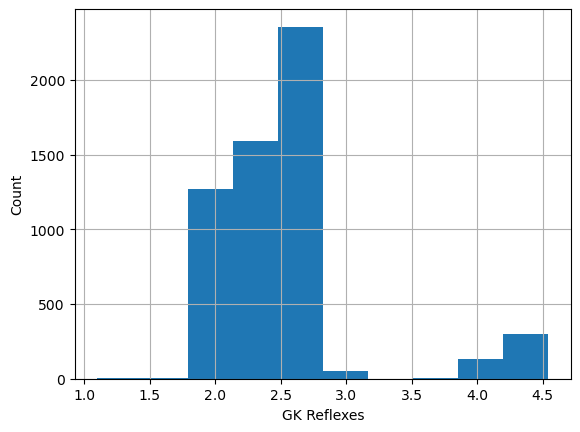

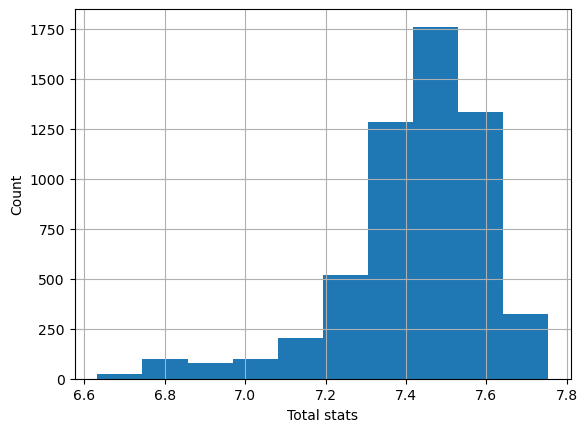

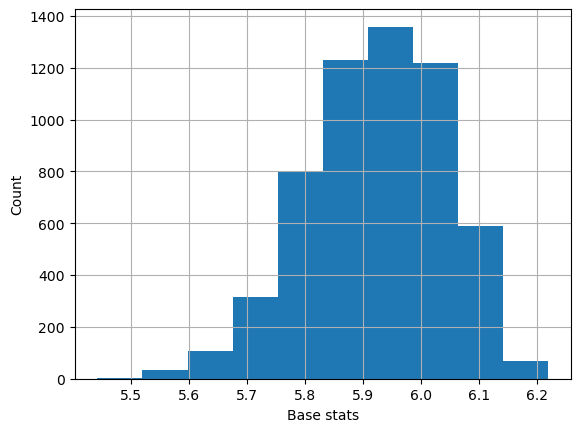

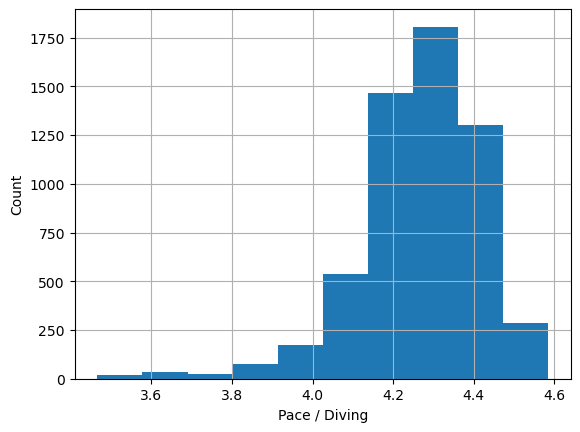

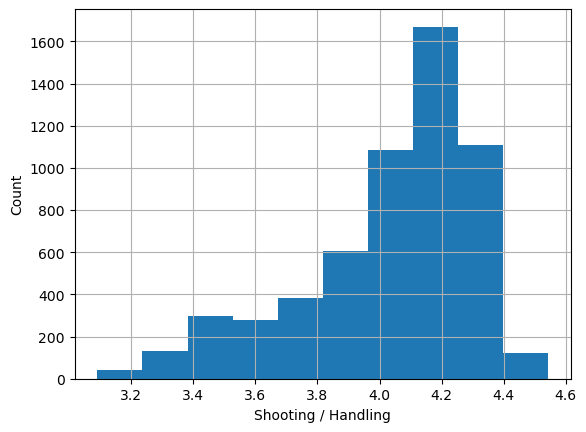

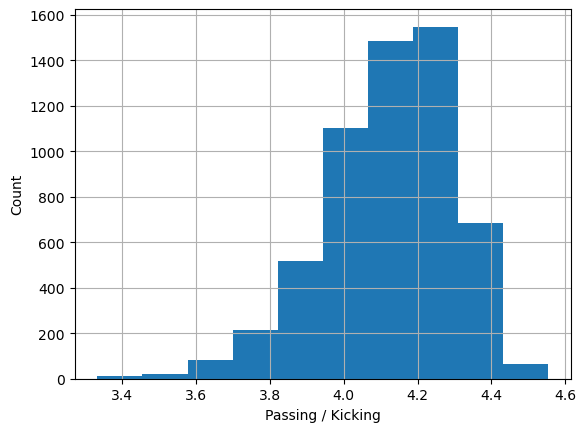

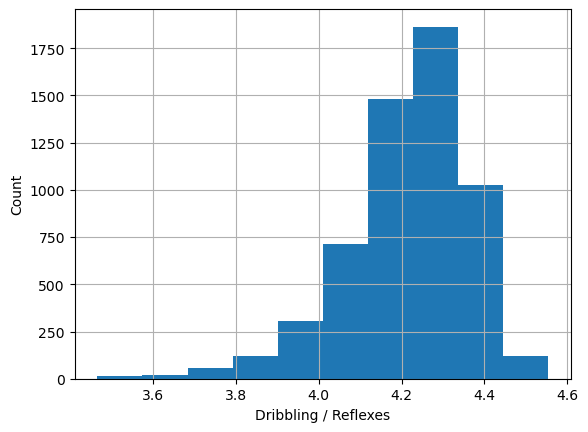

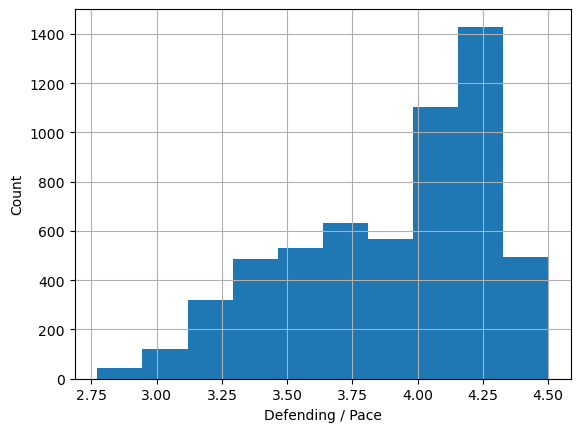

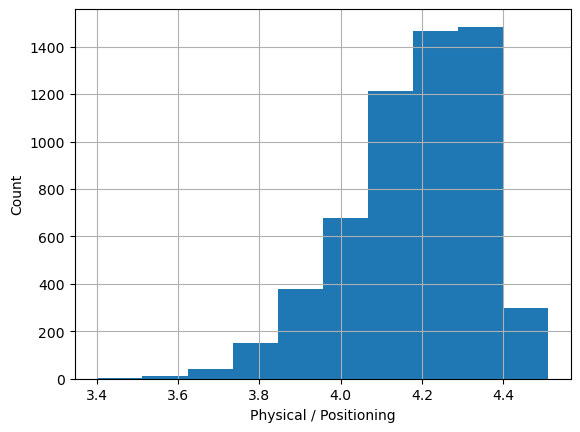

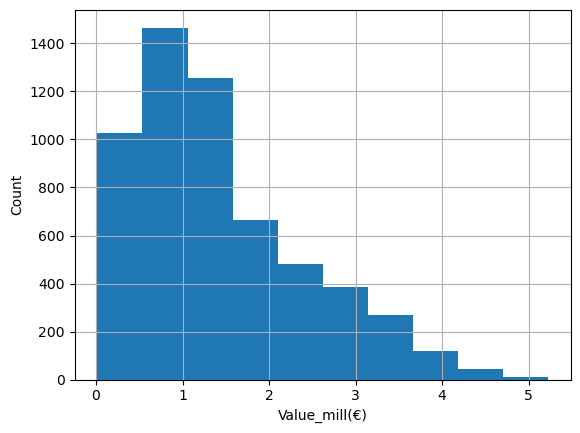

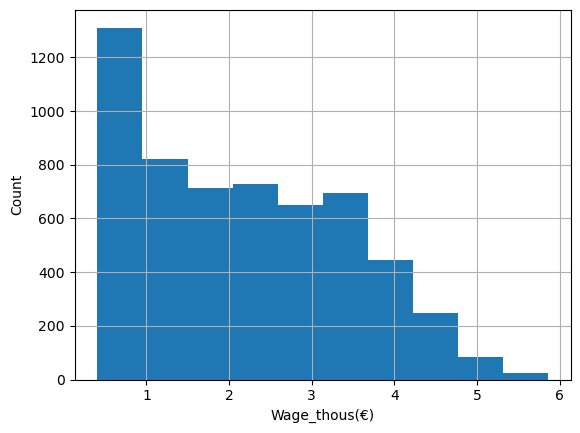

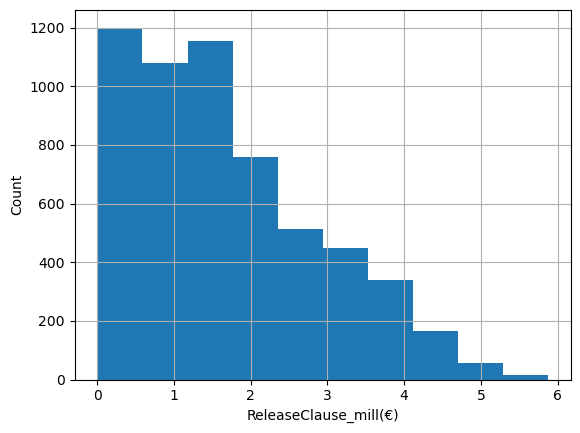

In [18]:
# Let's check the distribution of the log transformed continuous features

for feature in Cont_features:
    dataset[feature].hist()
#     bins=10 is default
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
    
    
# There isn't much improvement    

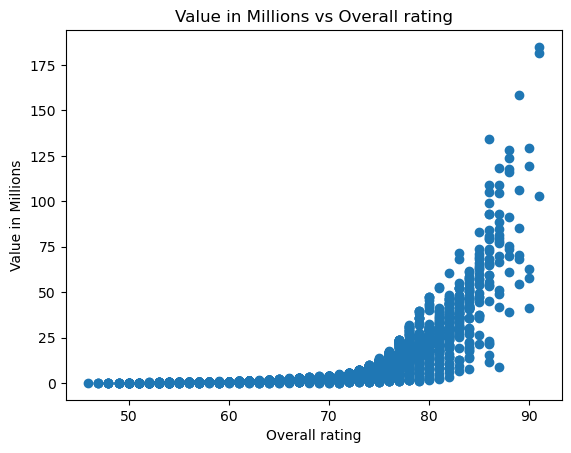

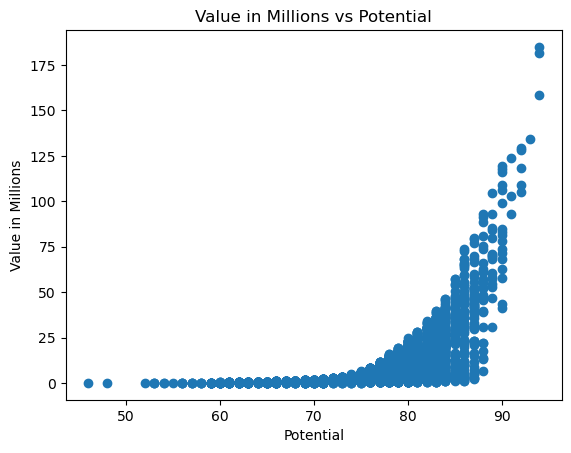

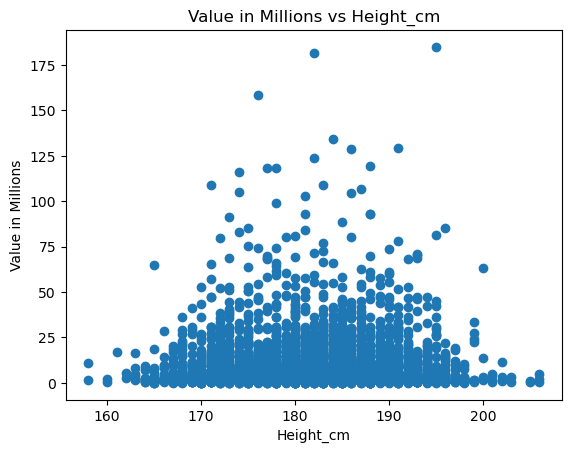

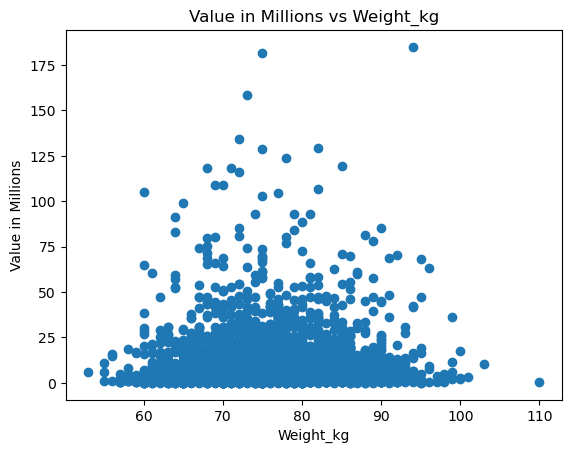

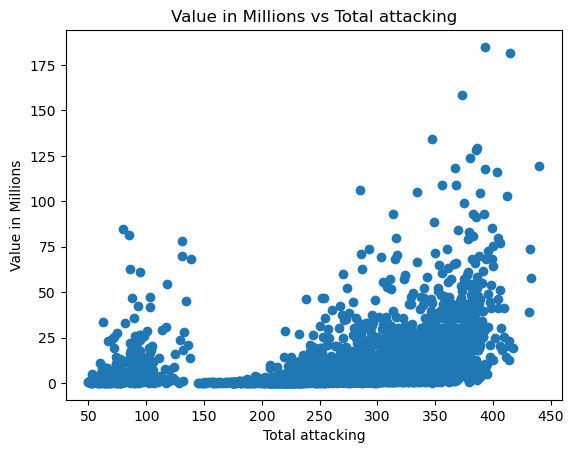

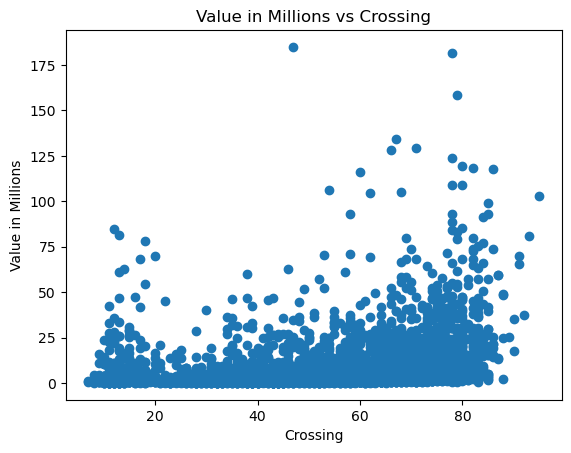

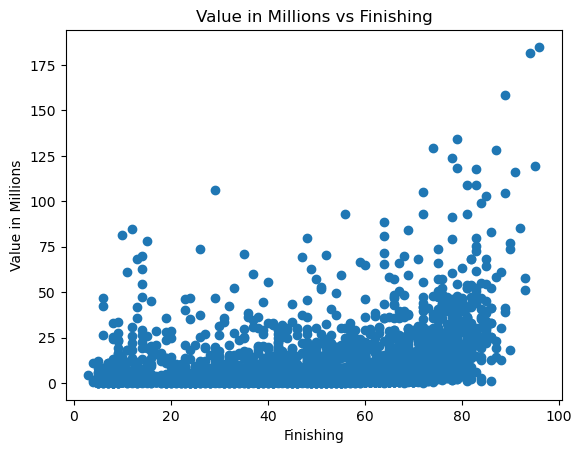

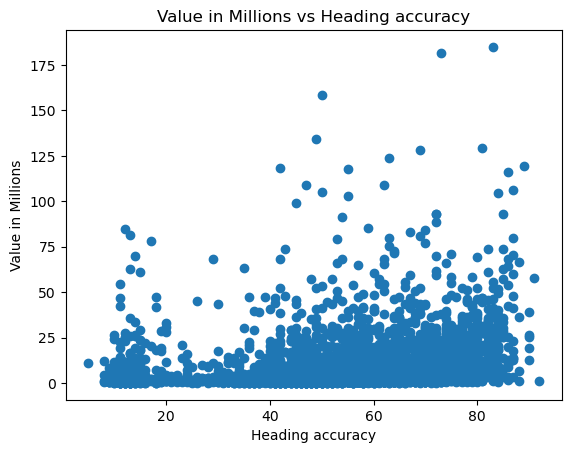

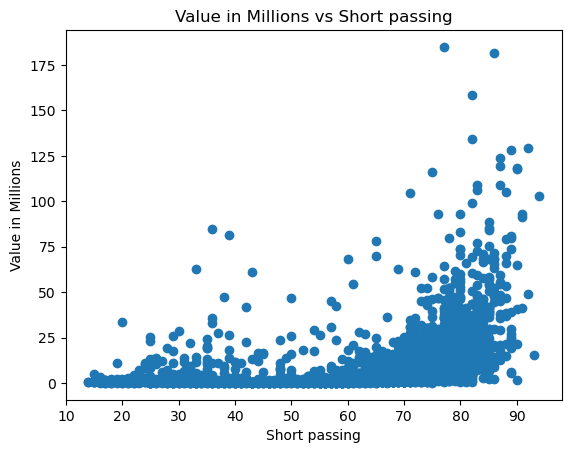

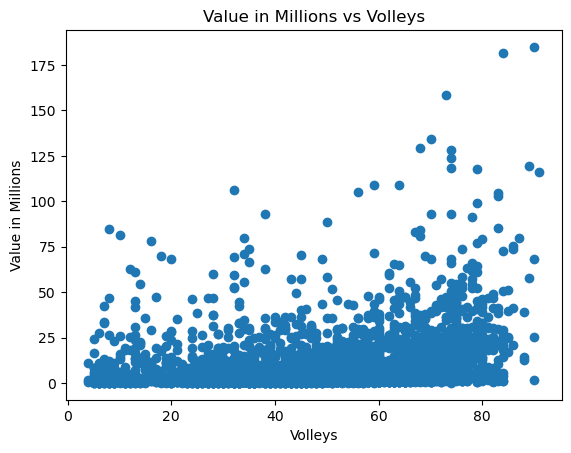

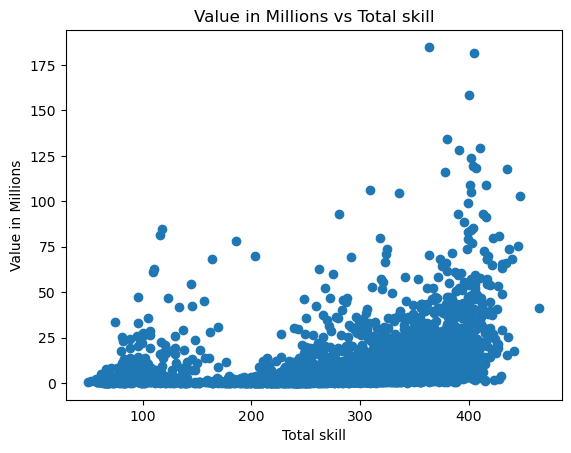

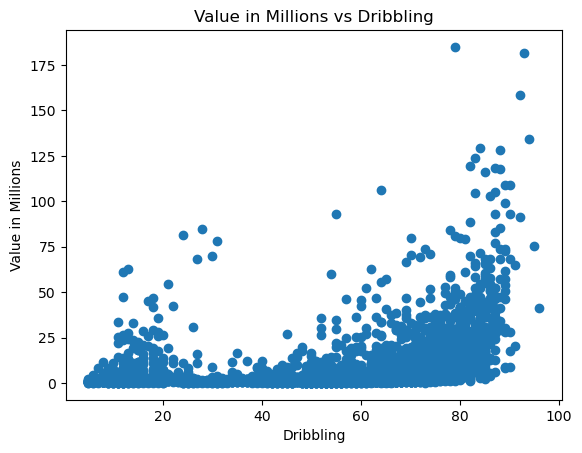

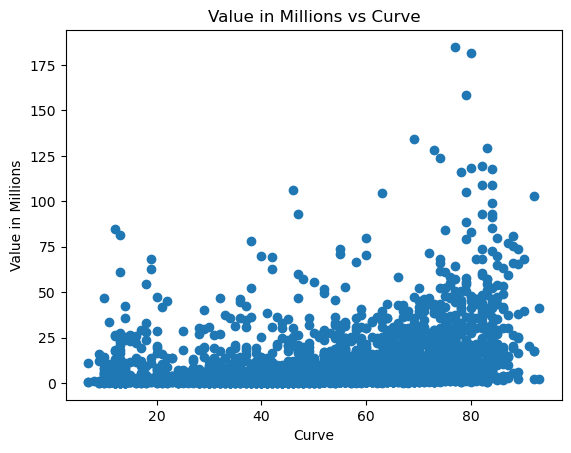

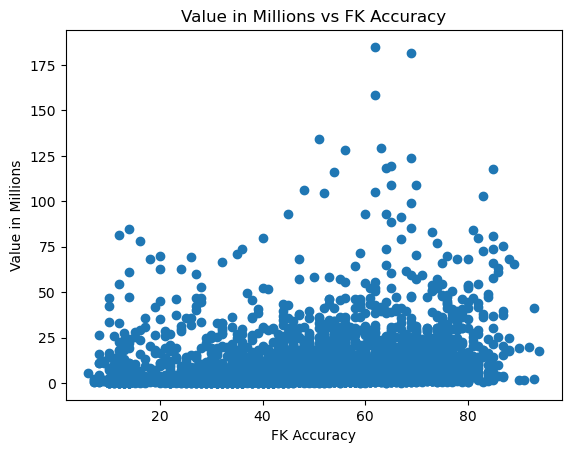

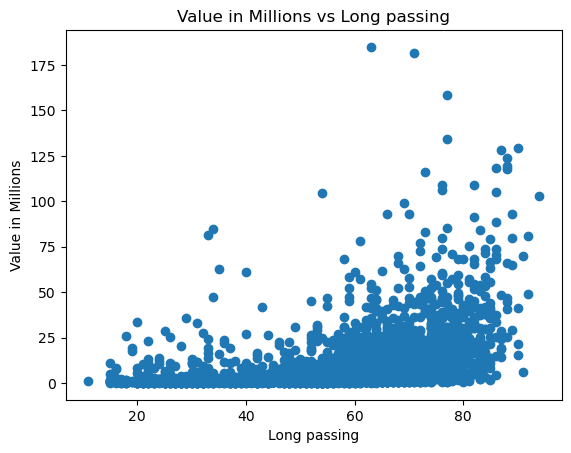

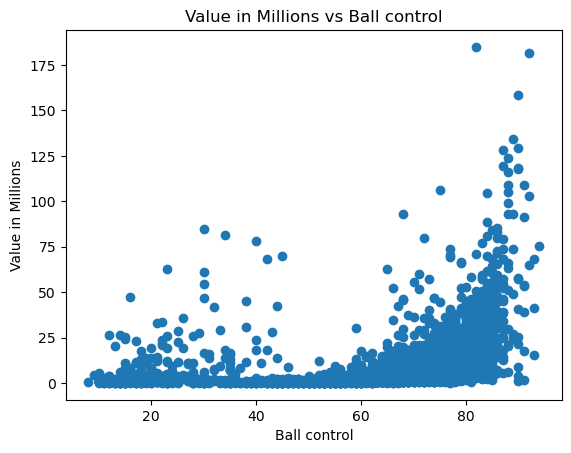

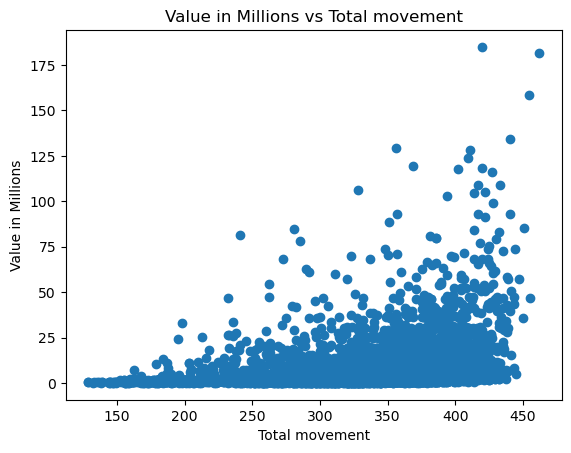

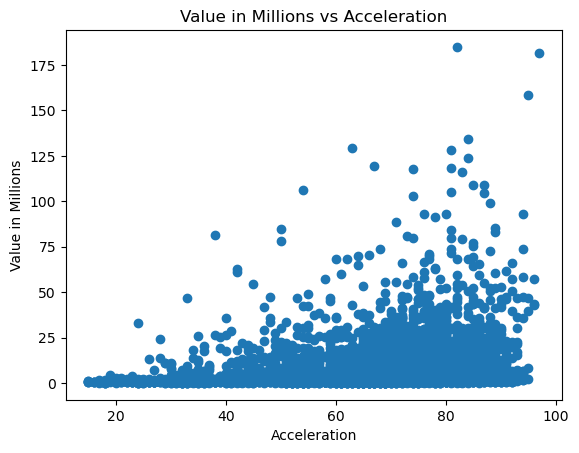

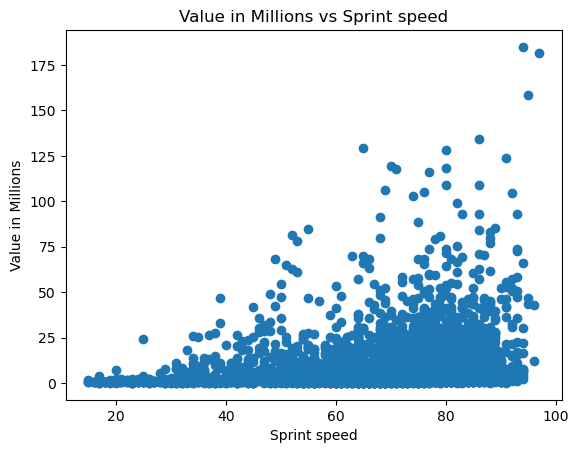

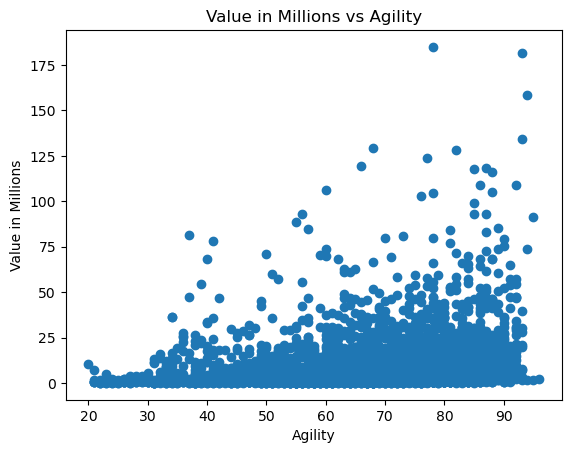

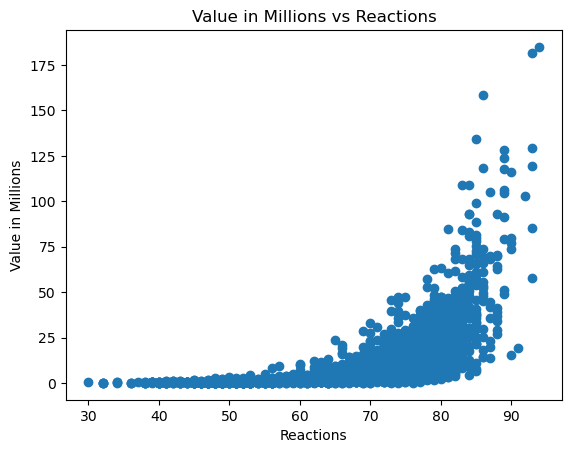

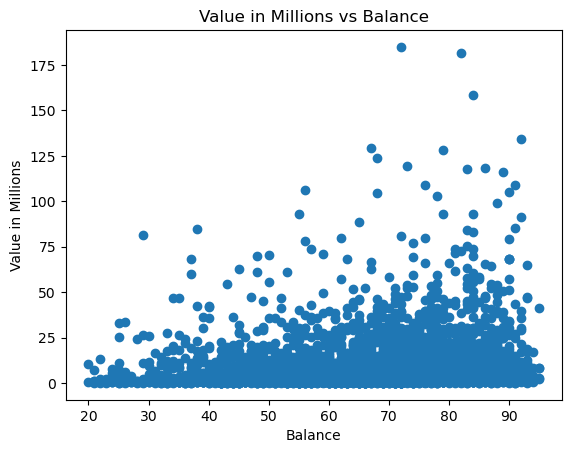

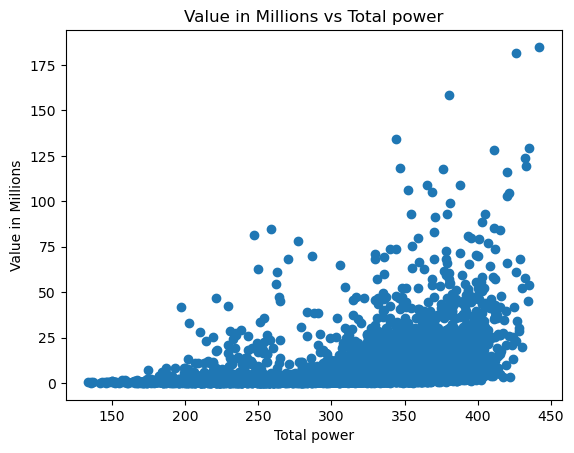

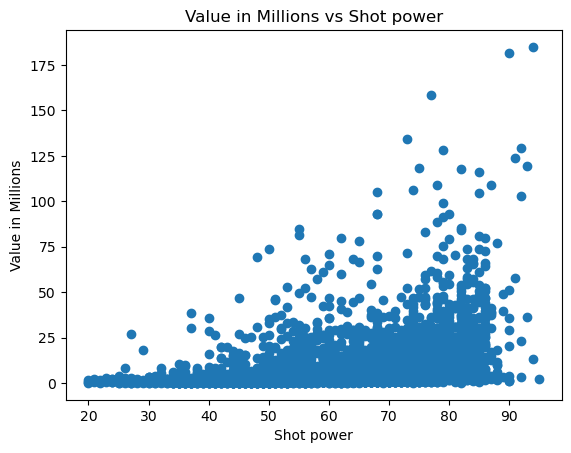

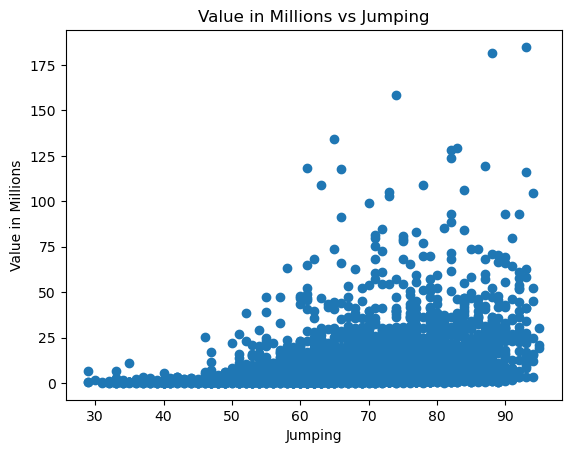

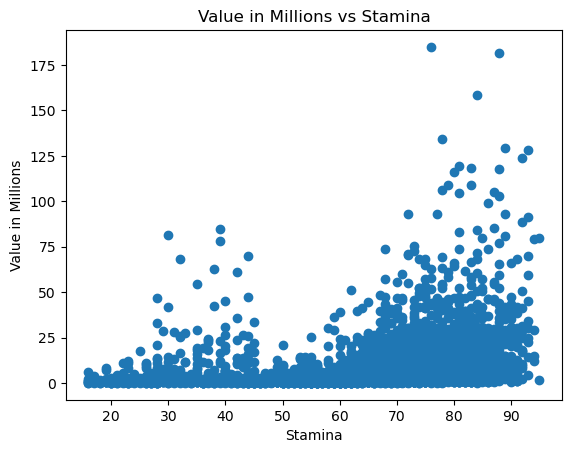

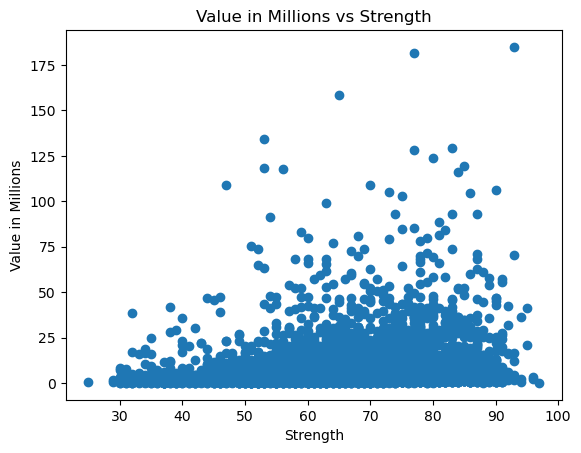

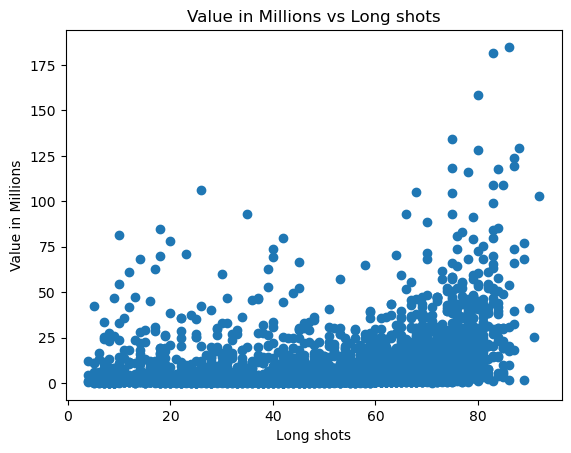

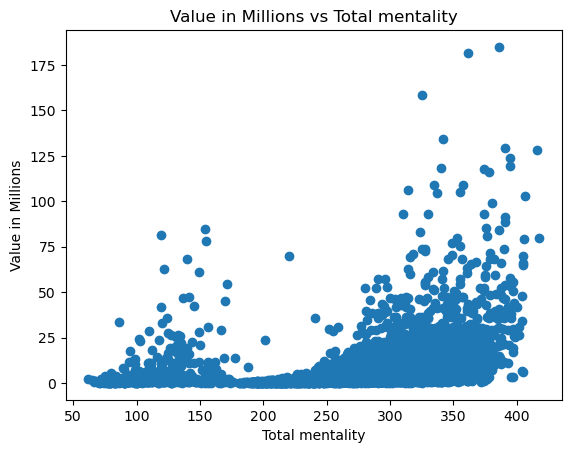

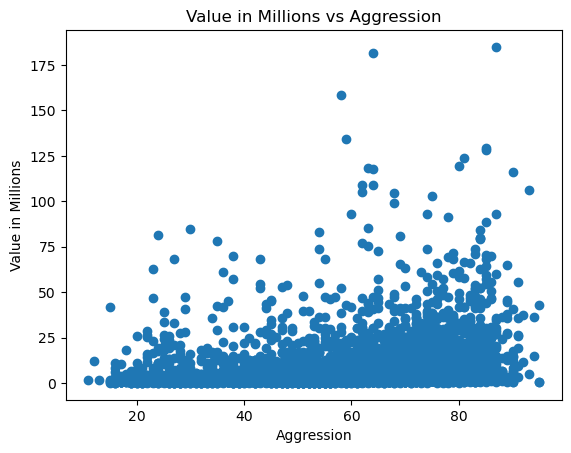

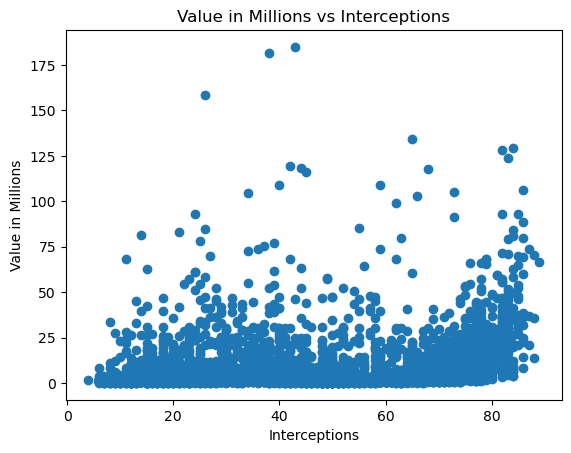

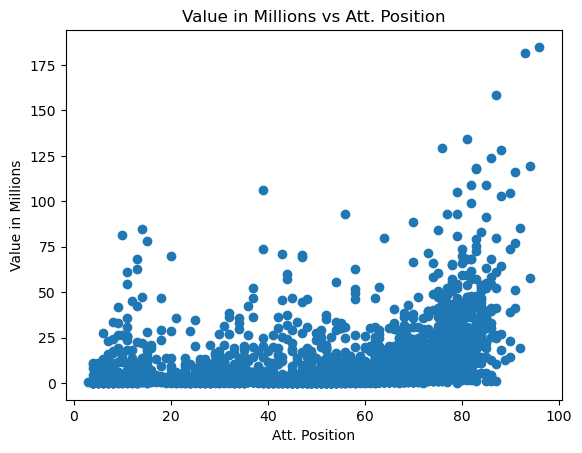

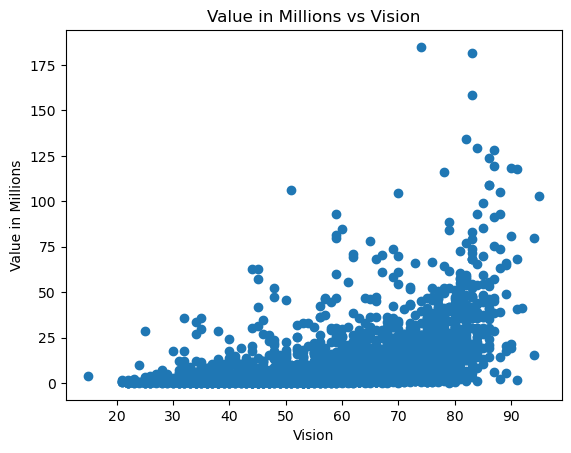

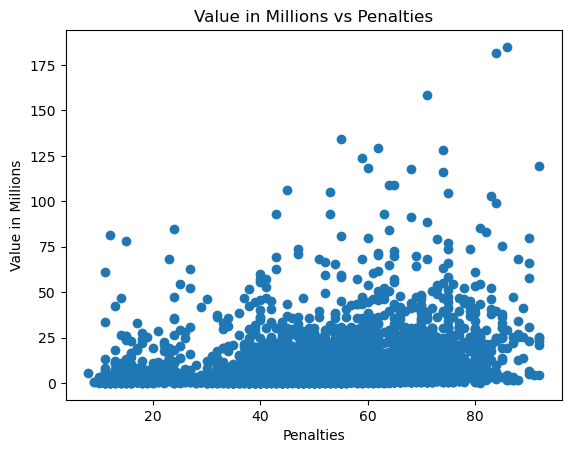

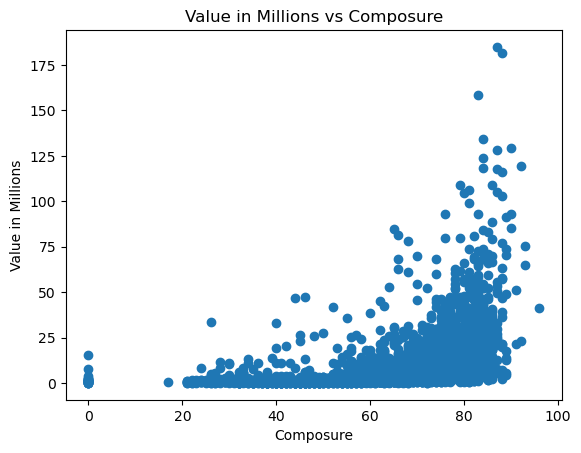

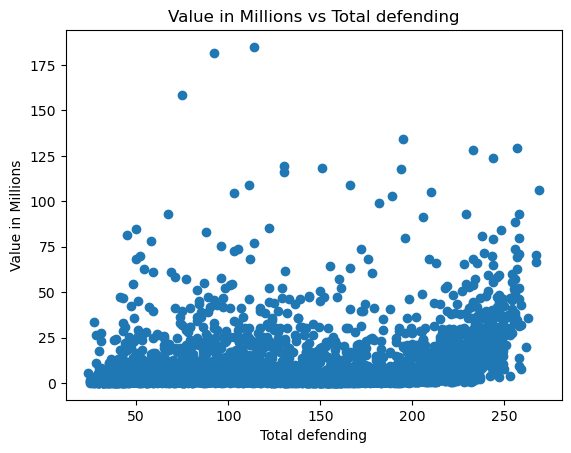

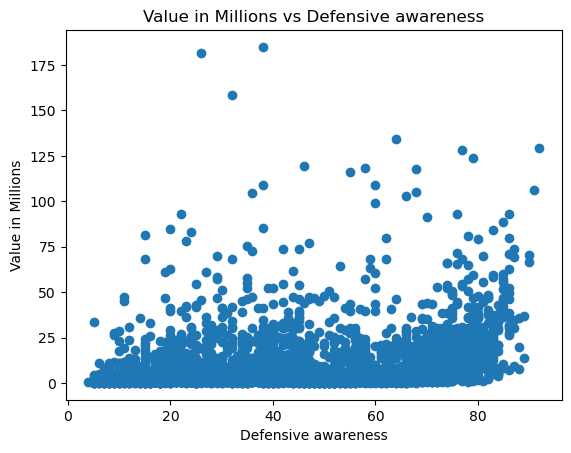

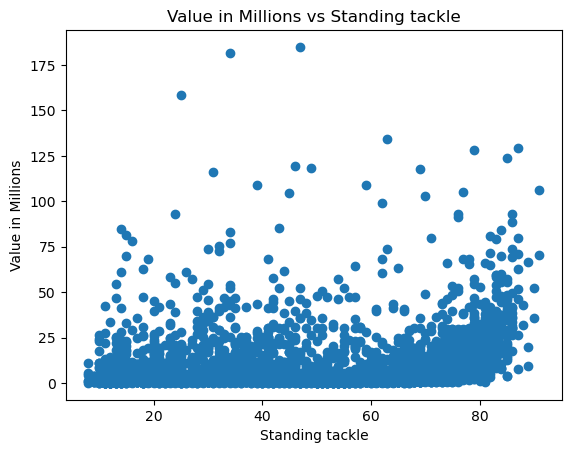

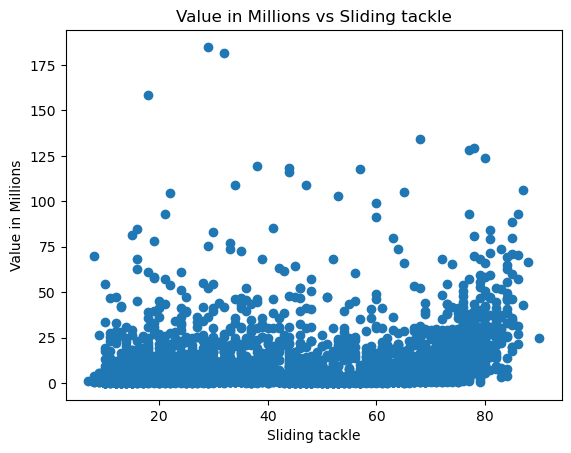

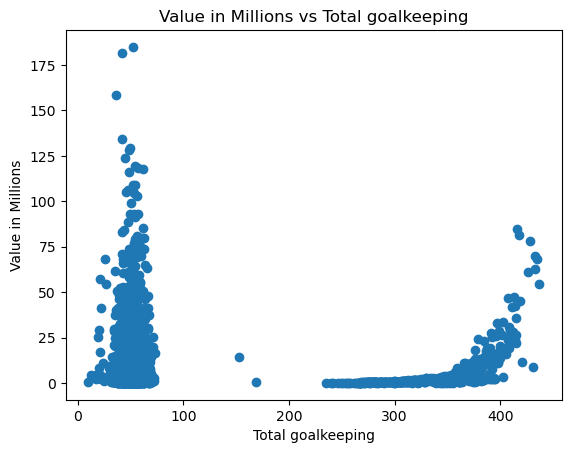

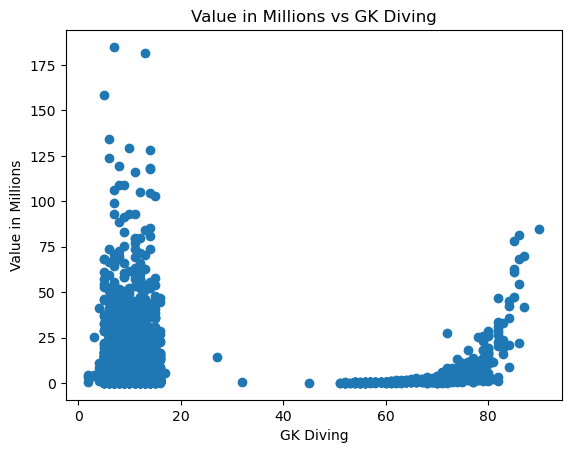

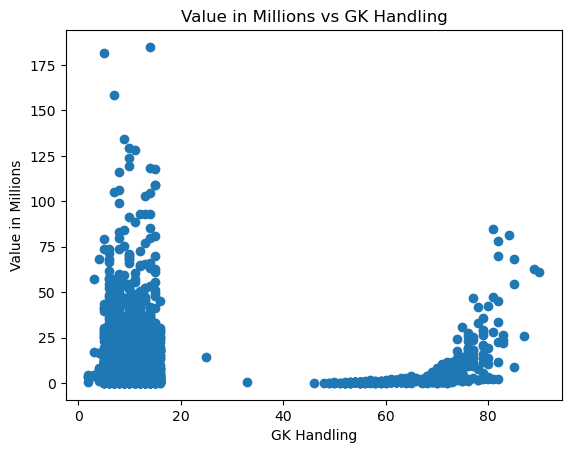

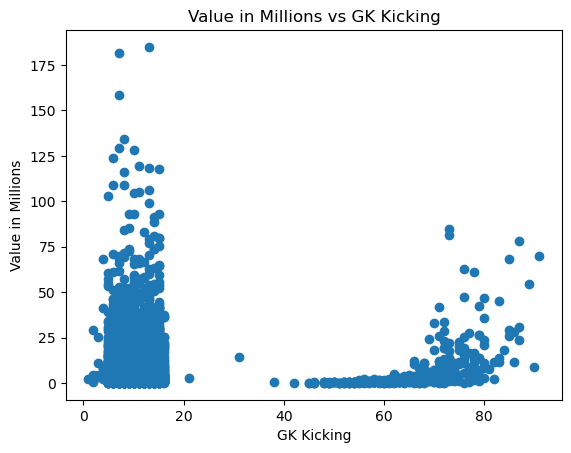

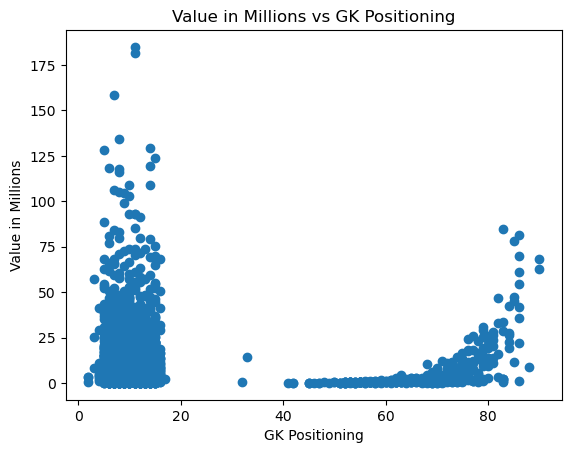

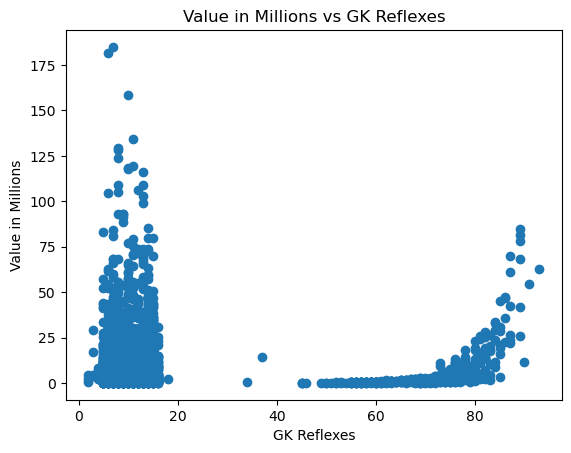

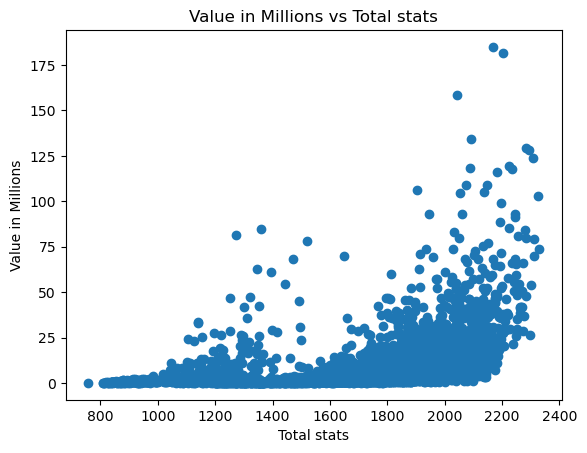

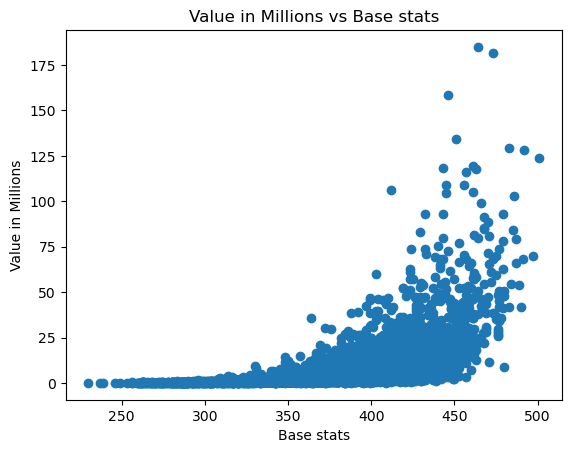

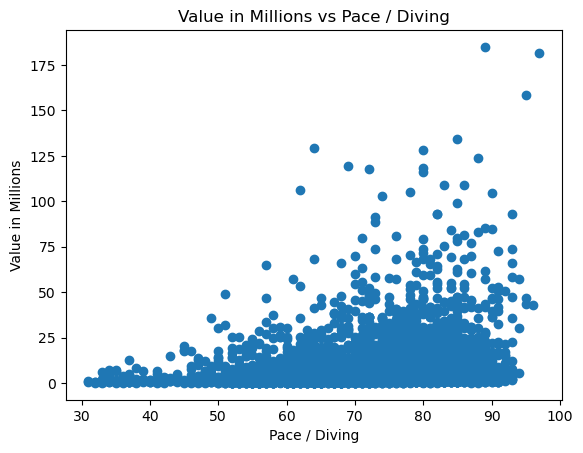

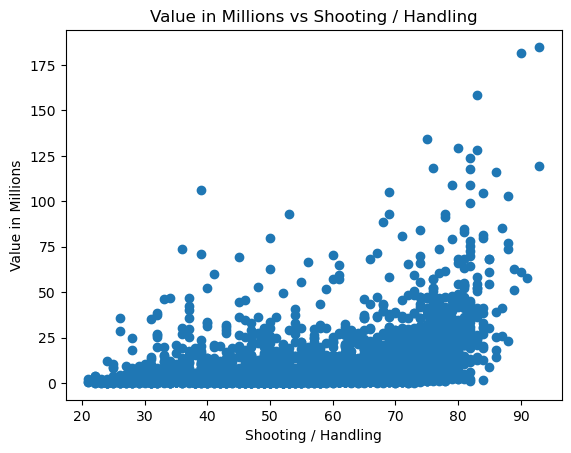

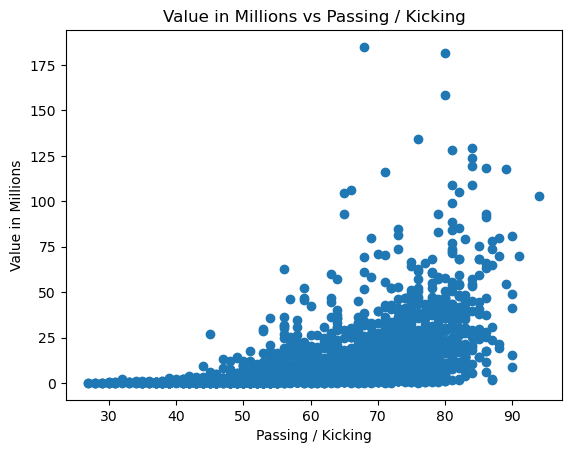

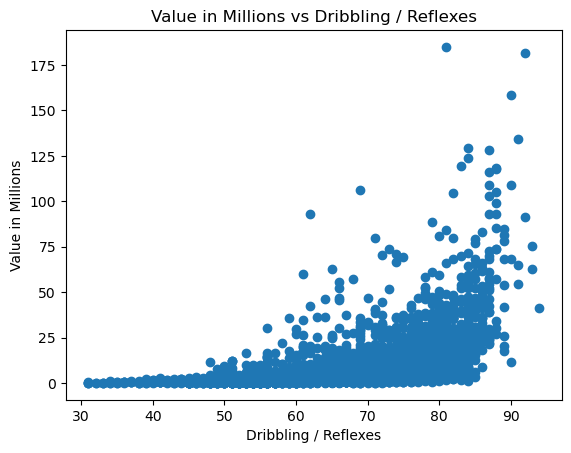

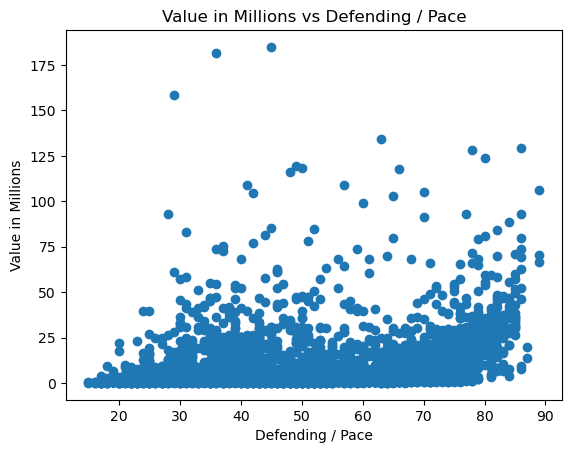

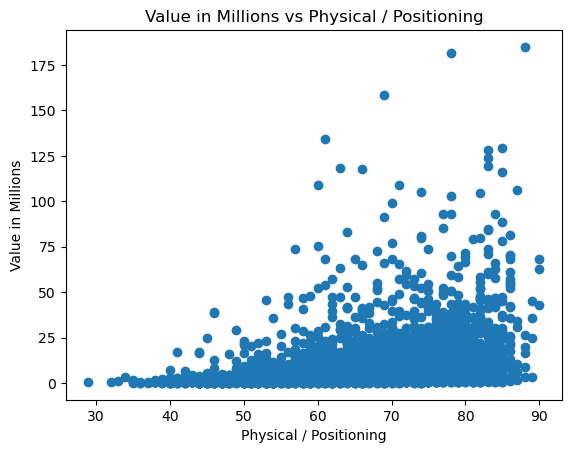

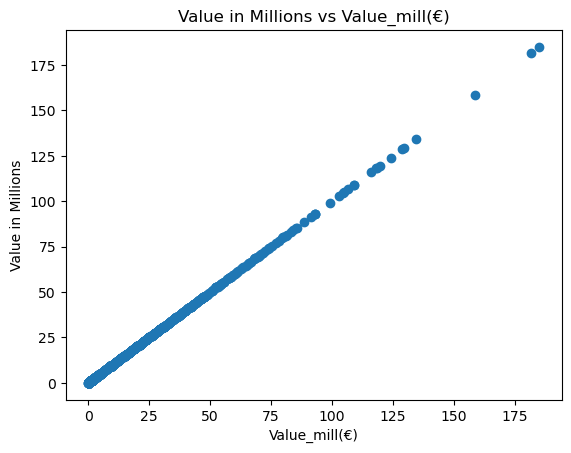

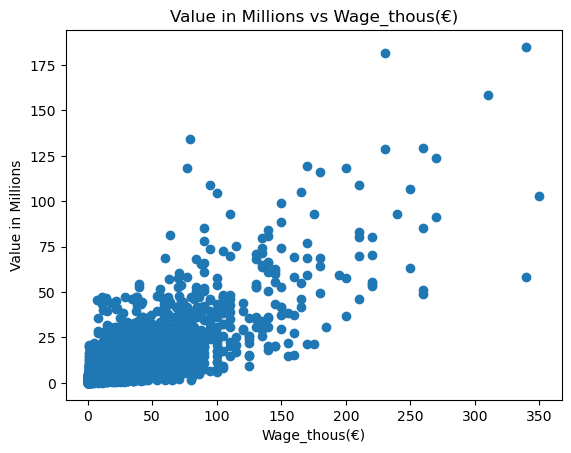

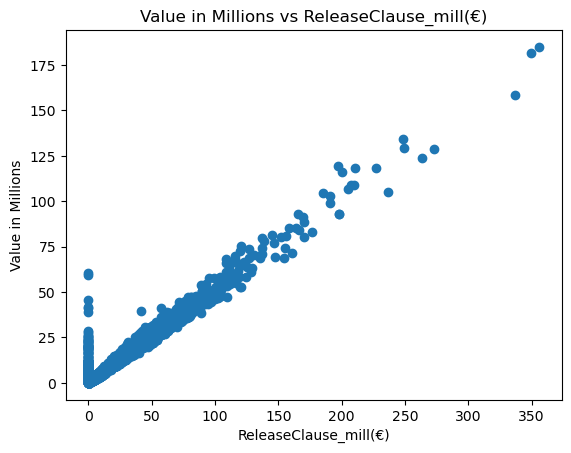

In [19]:
# Relation between the continuous variables with the Value_mill

dataset=data.copy()
for feature in Cont_features:
    
    plt.scatter(dataset[feature],dataset['Value_mill(€)'])
    plt.xlabel(feature)
    plt.ylabel('Value in Millions')
    plt.title(f'Value in Millions vs {feature}')
    plt.show()

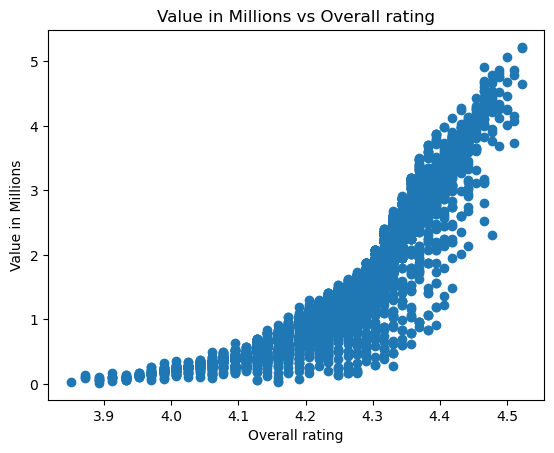

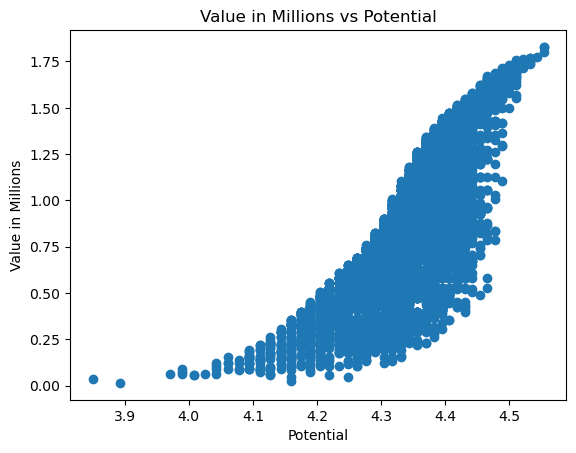

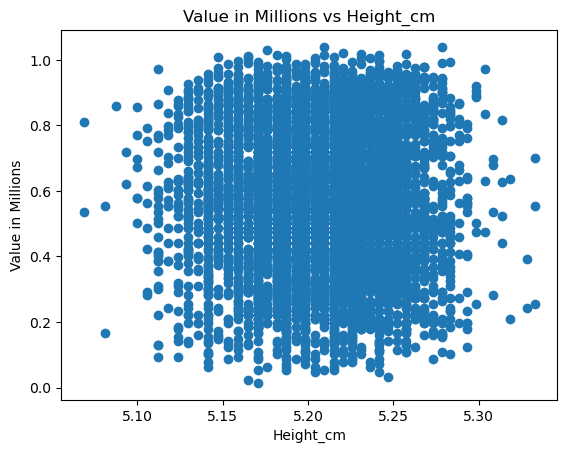

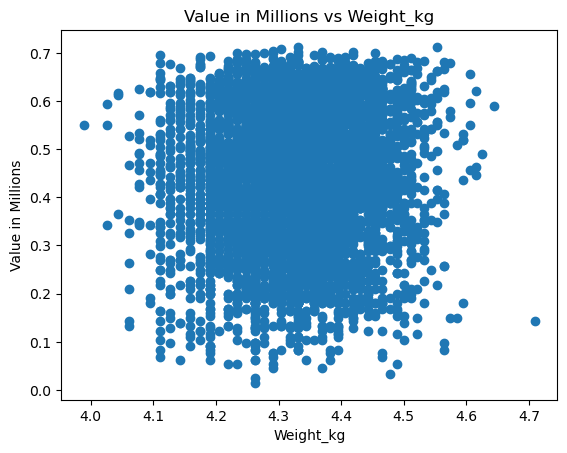

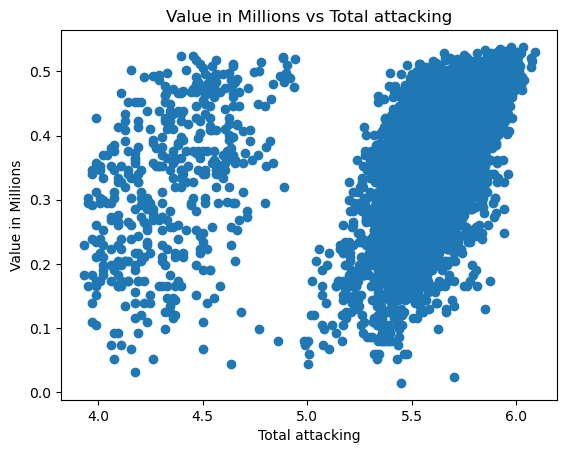

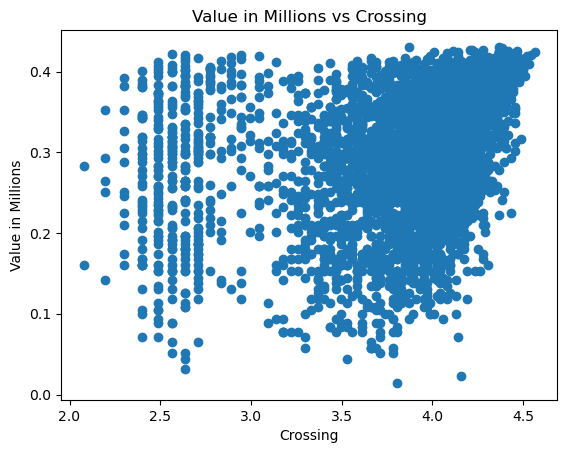

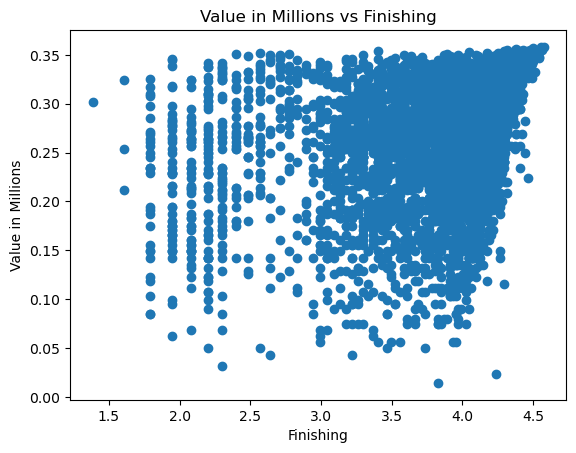

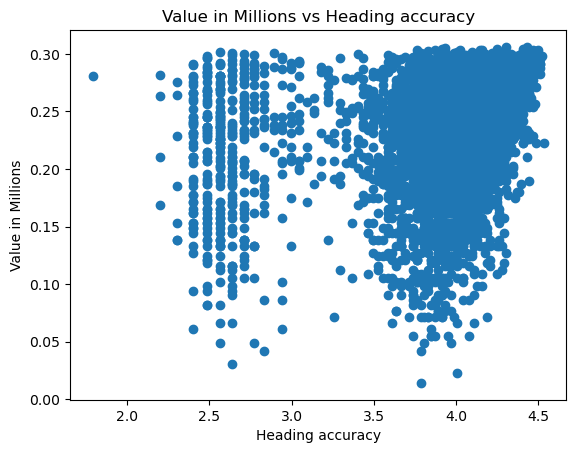

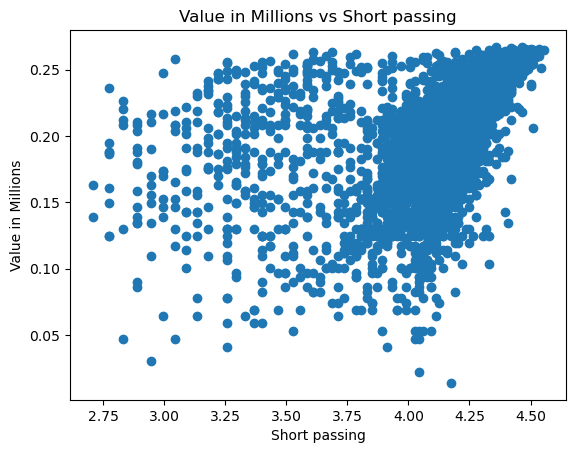

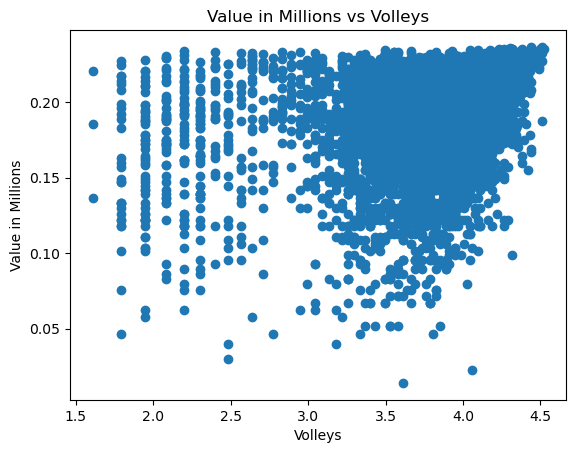

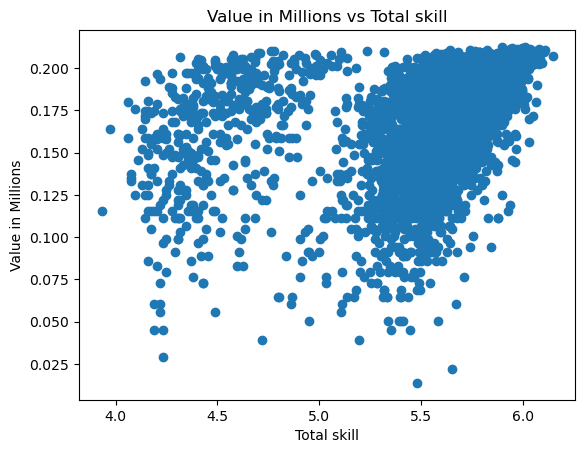

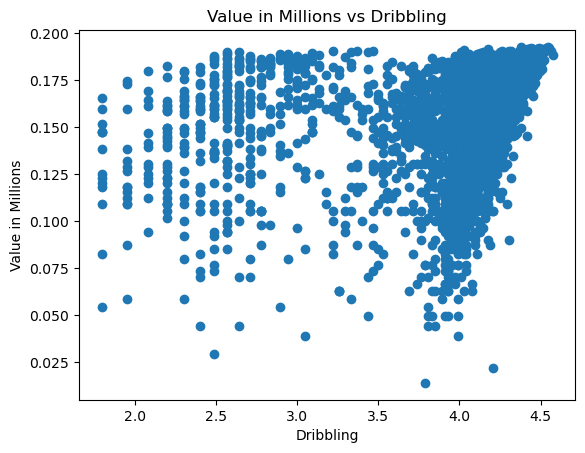

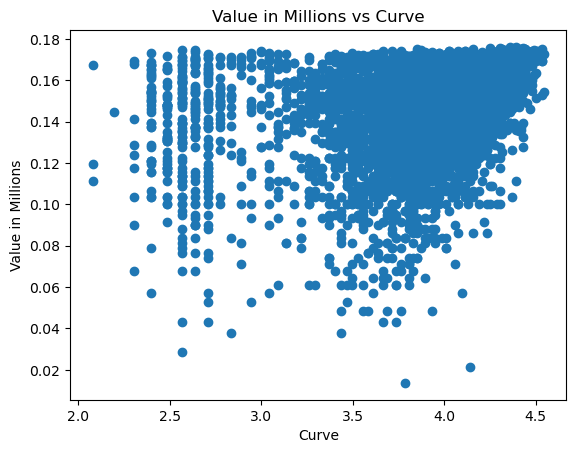

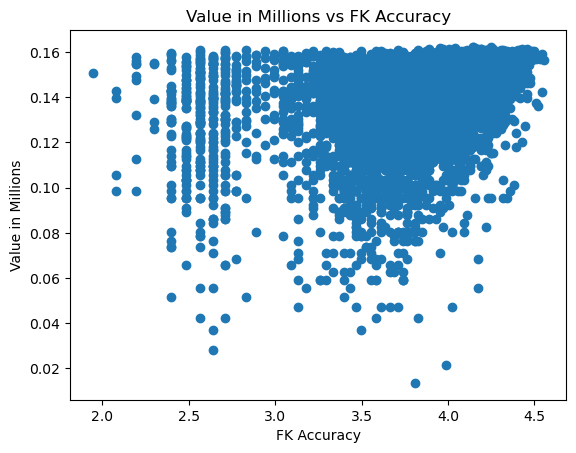

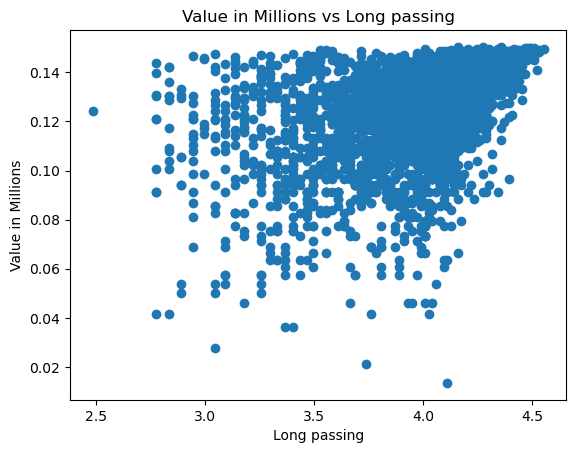

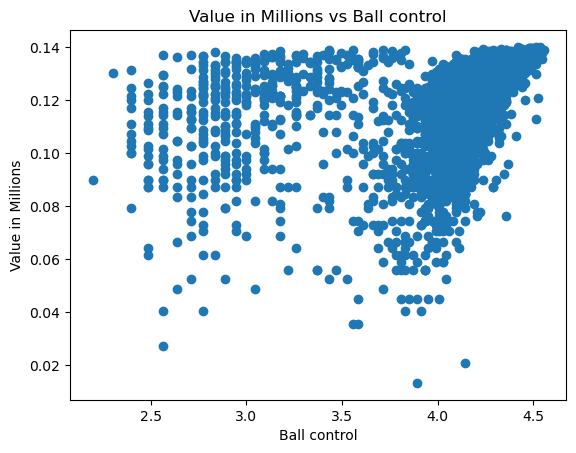

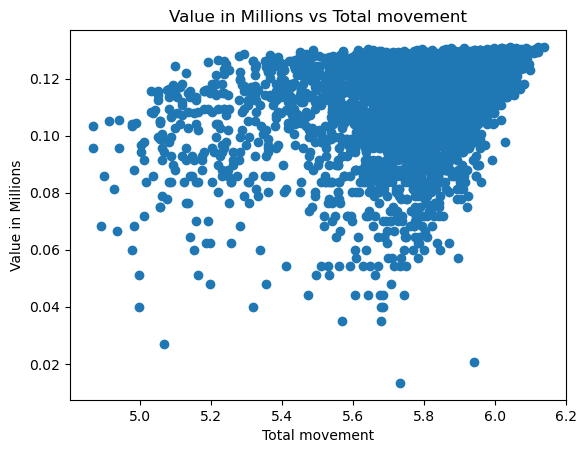

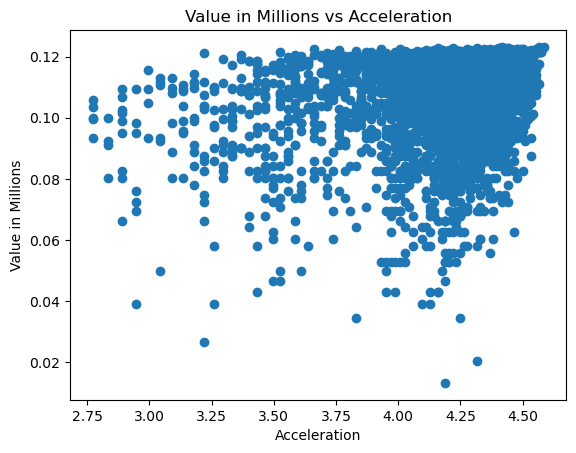

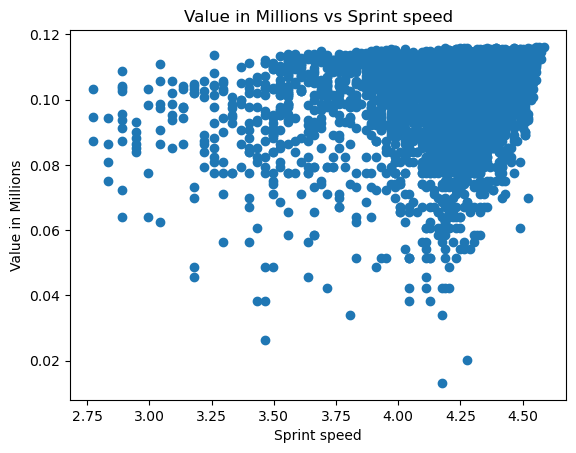

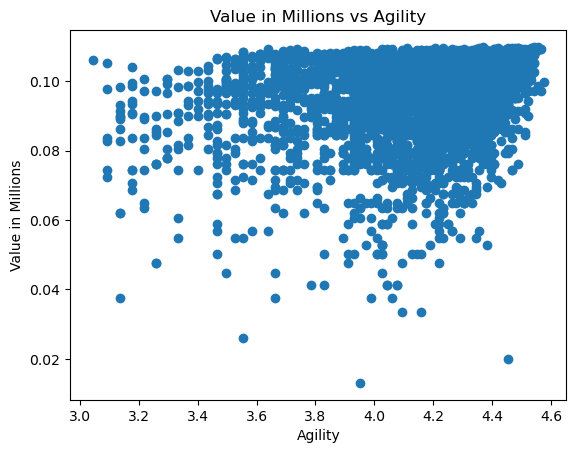

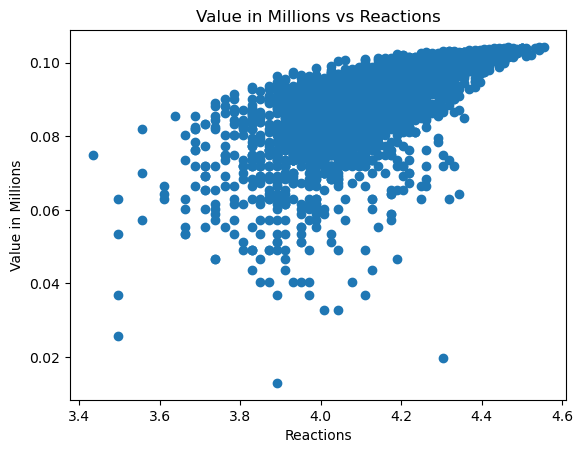

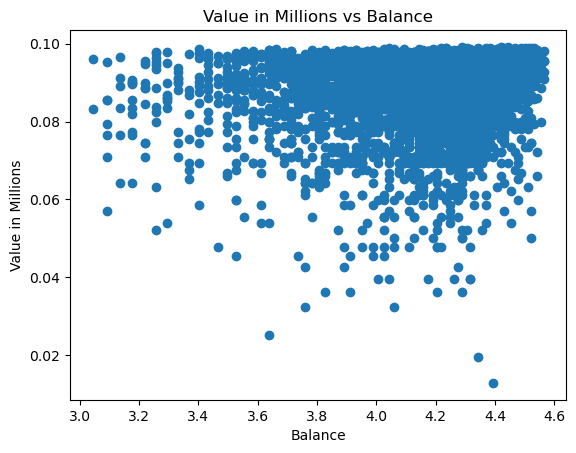

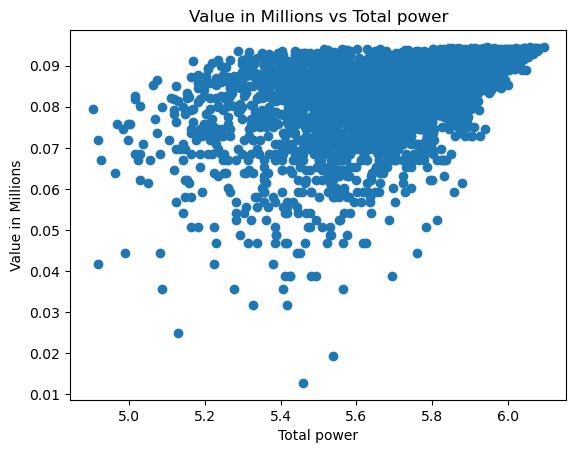

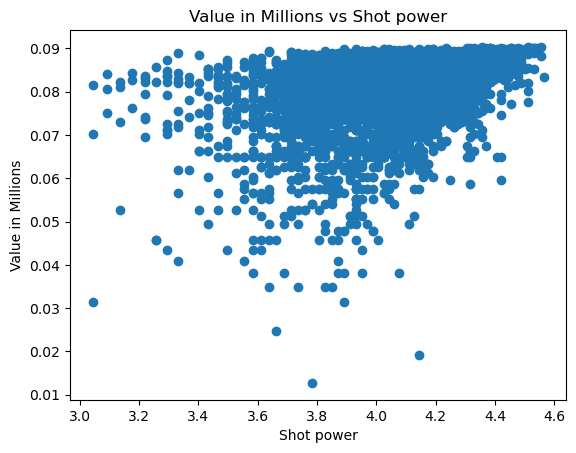

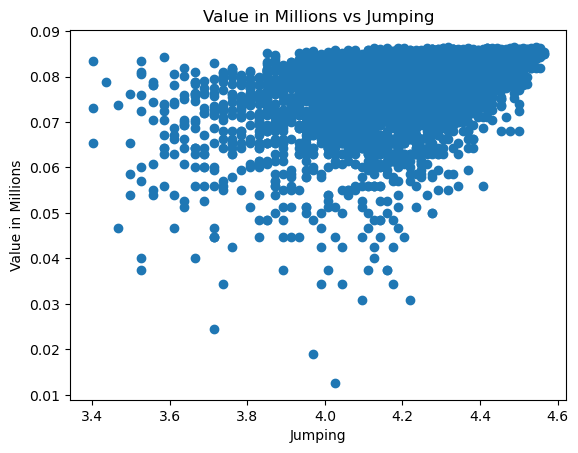

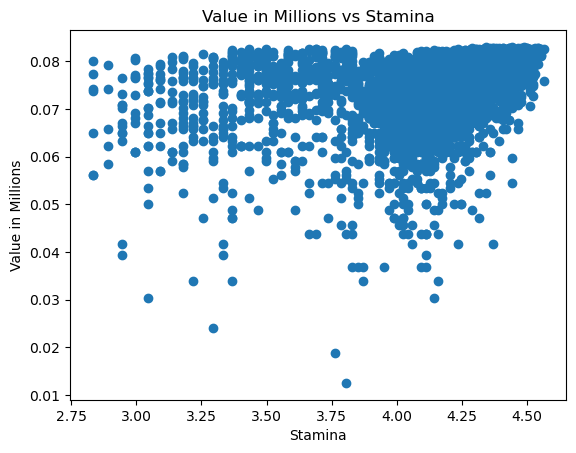

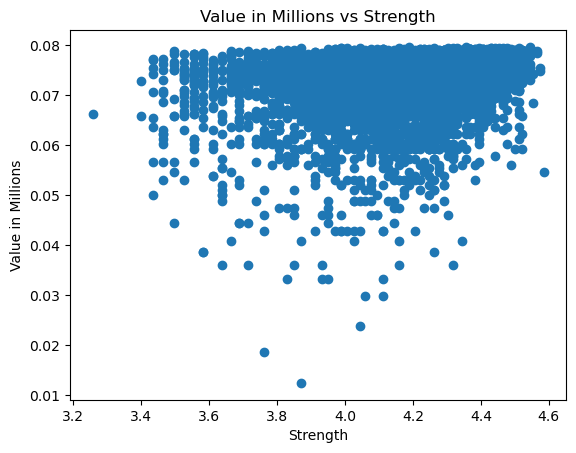

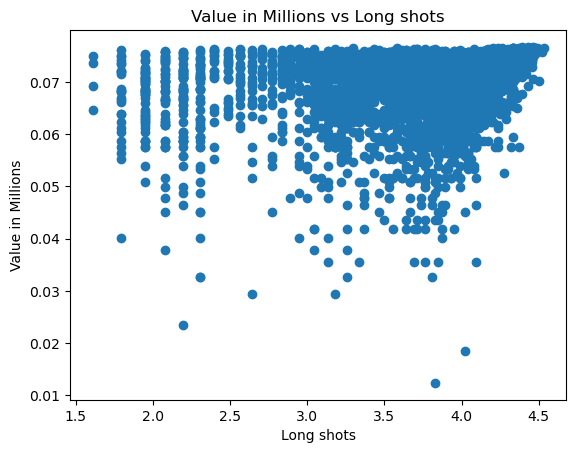

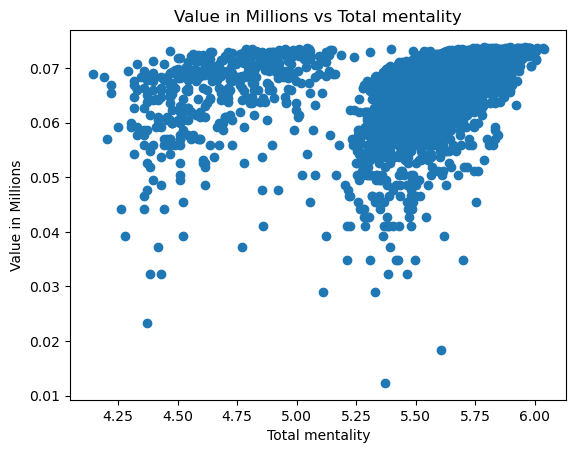

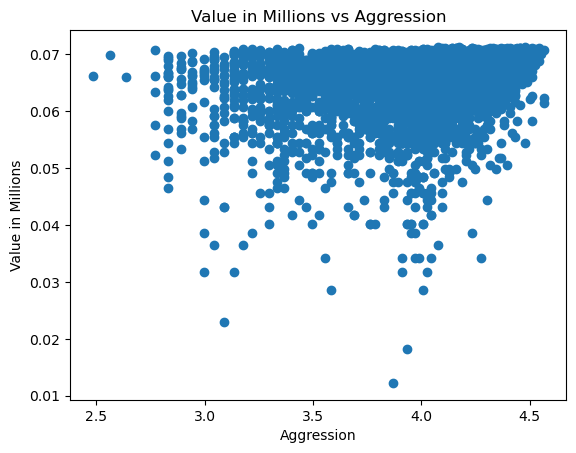

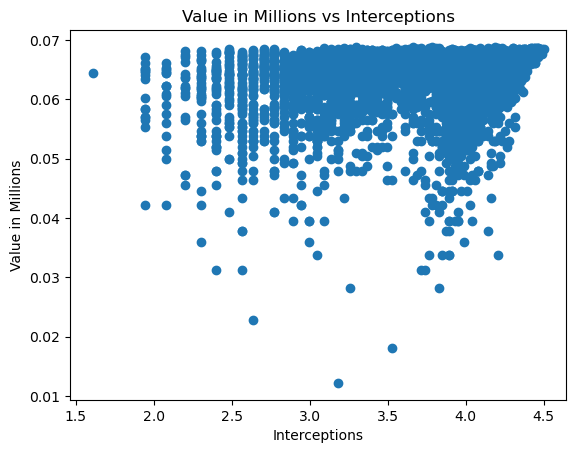

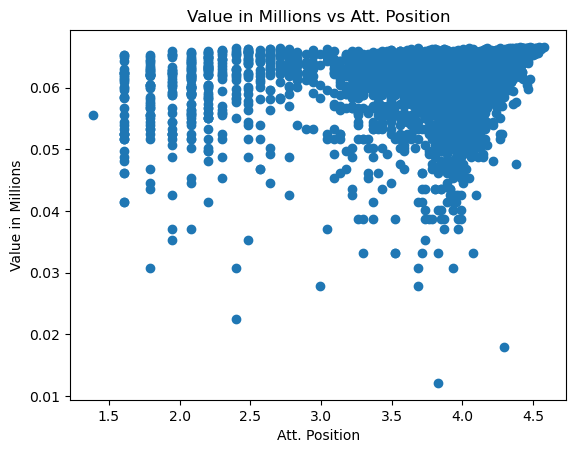

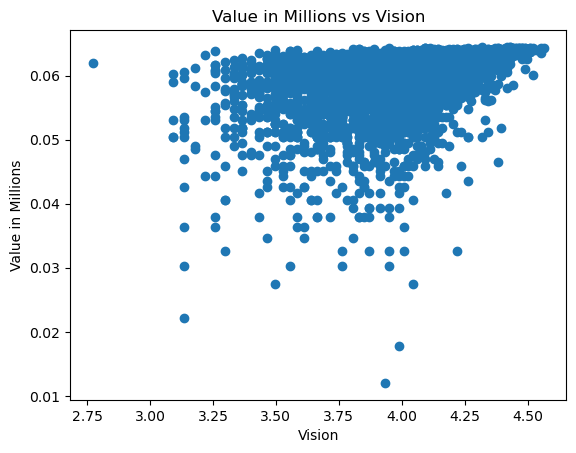

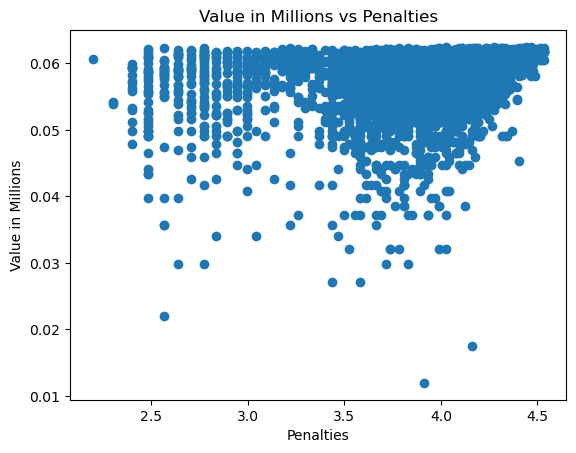

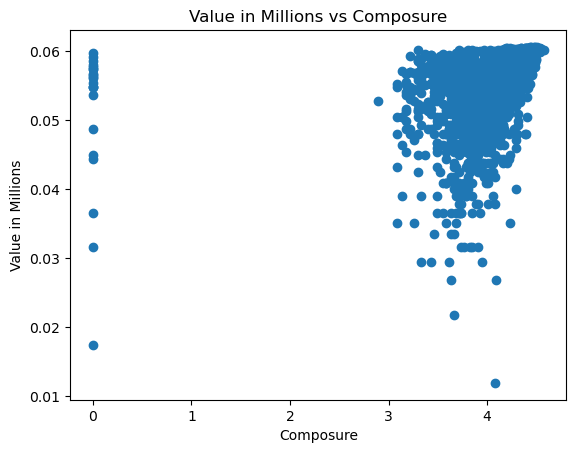

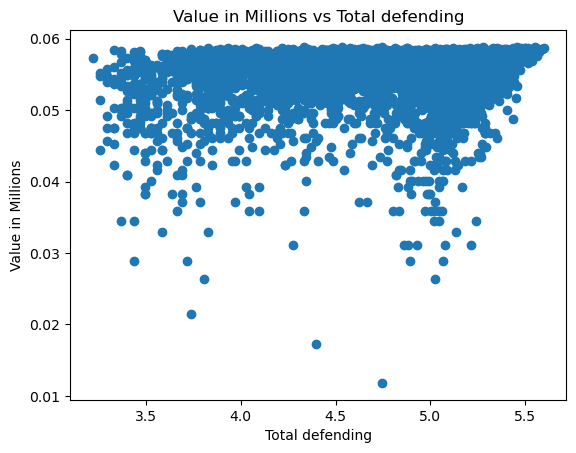

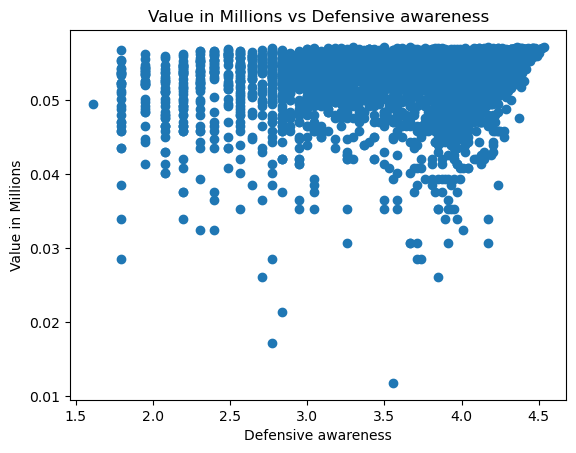

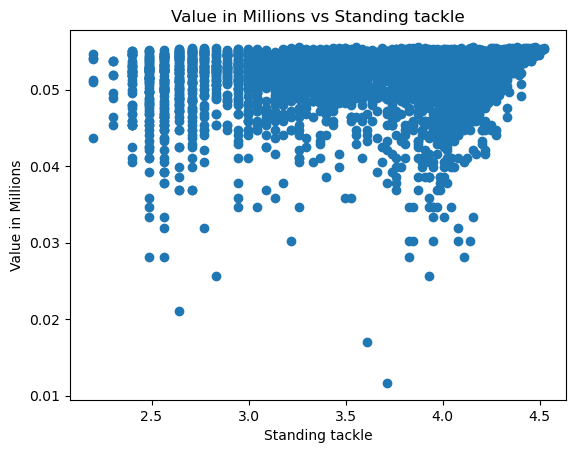

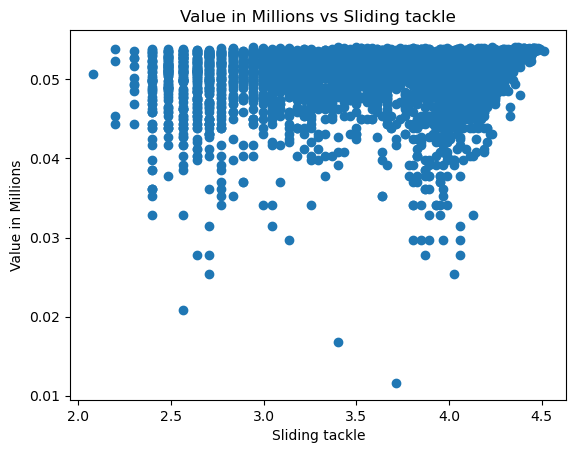

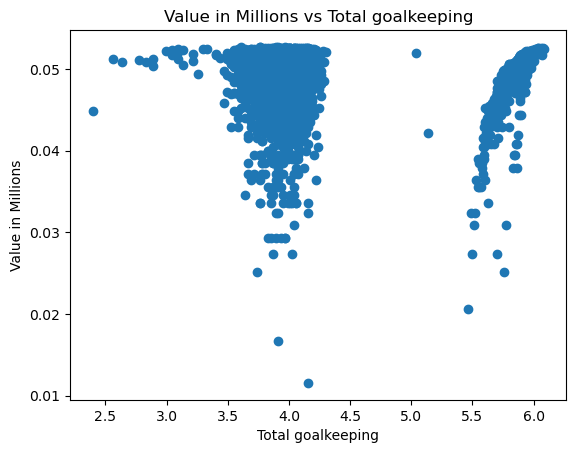

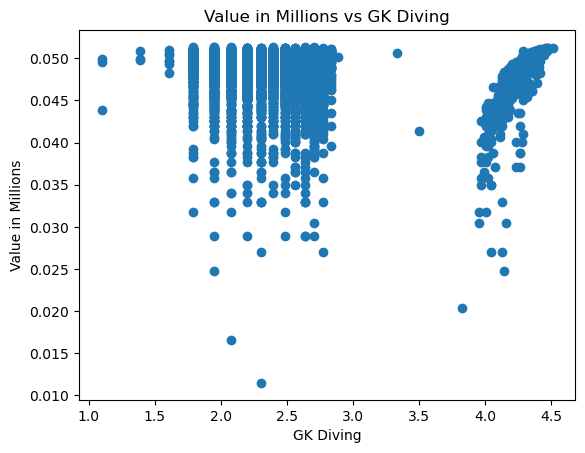

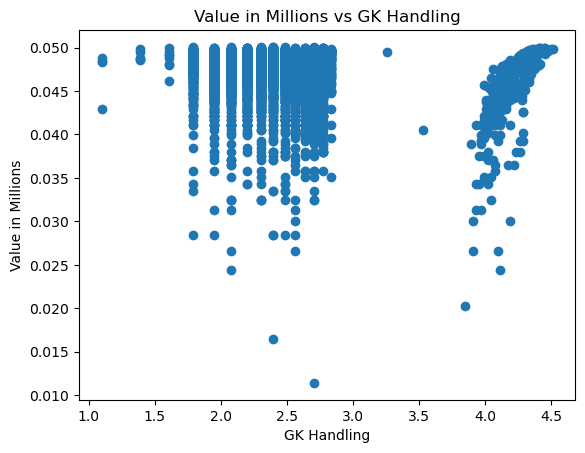

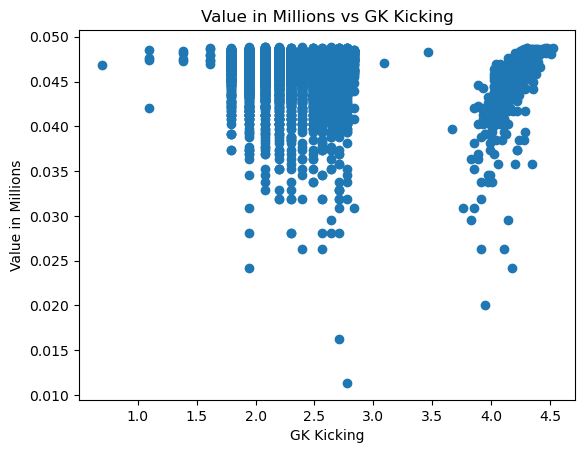

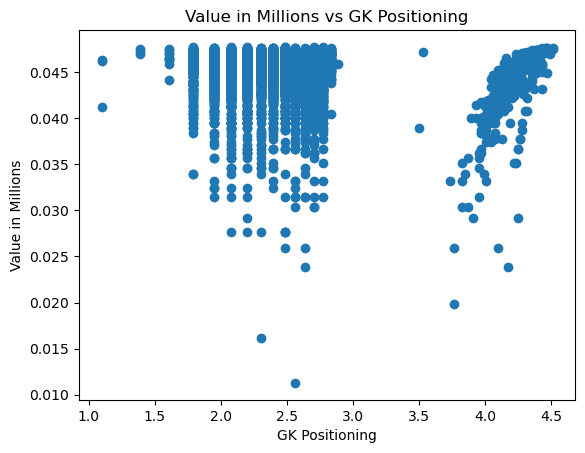

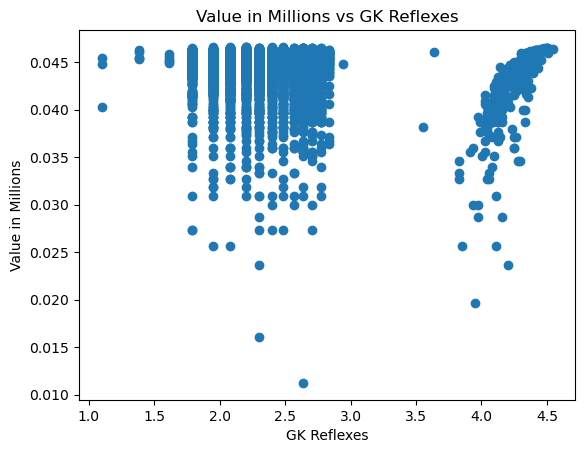

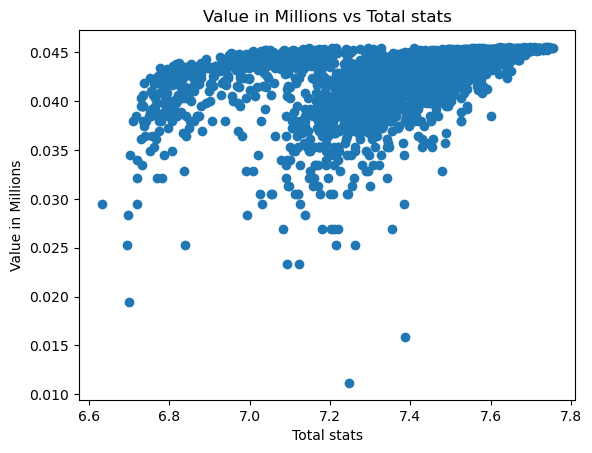

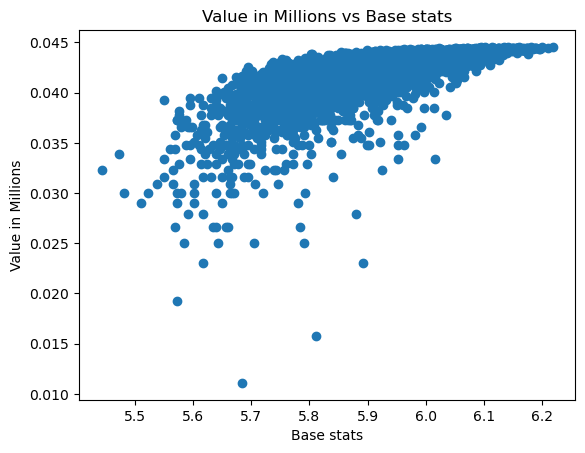

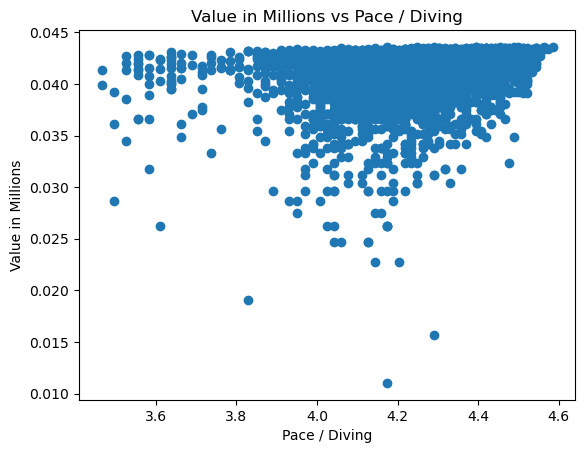

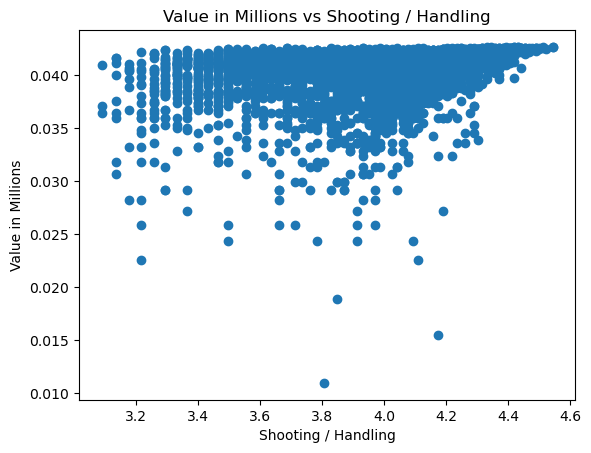

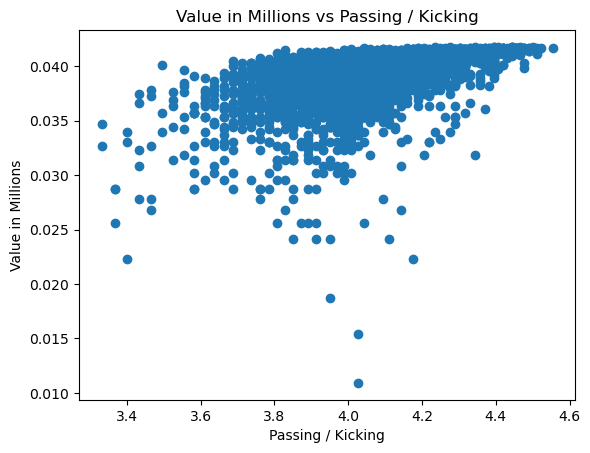

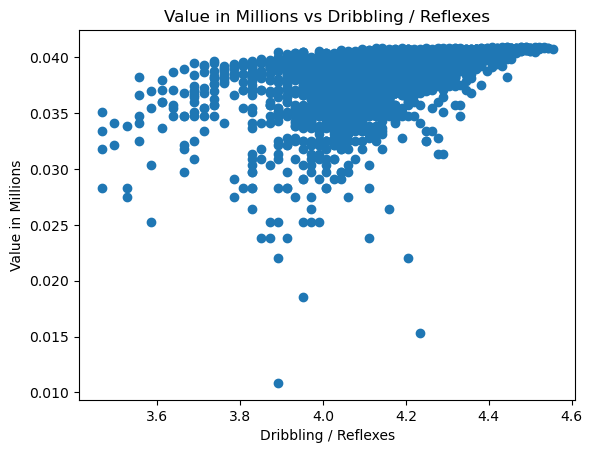

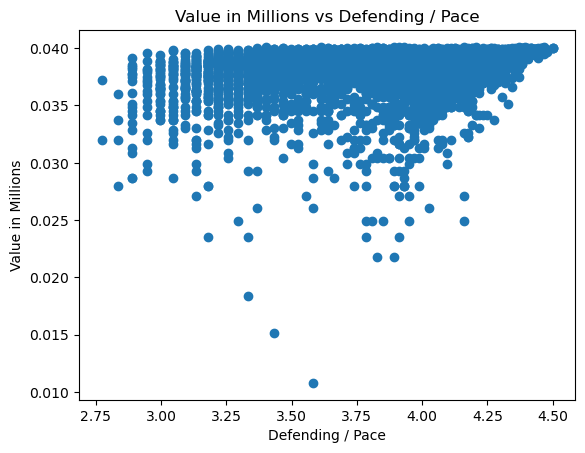

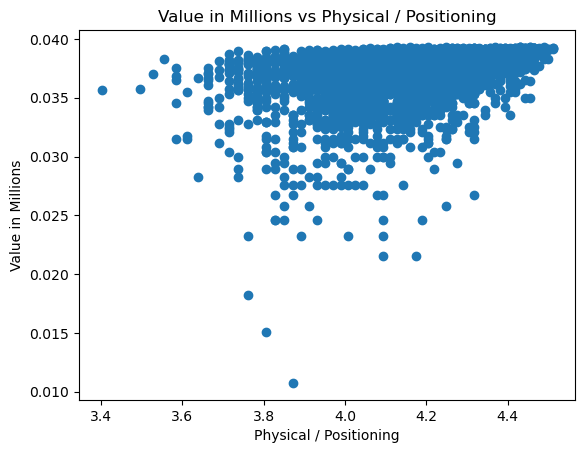

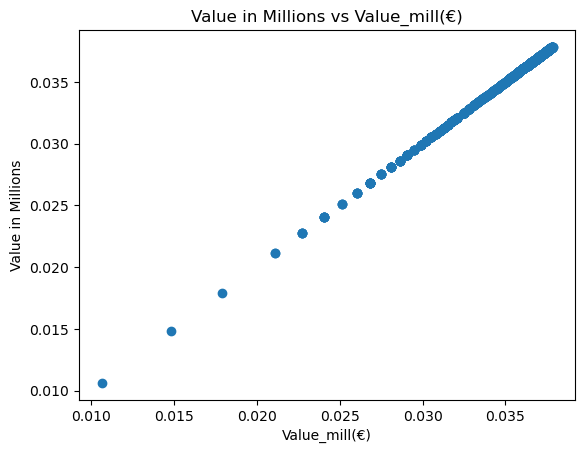

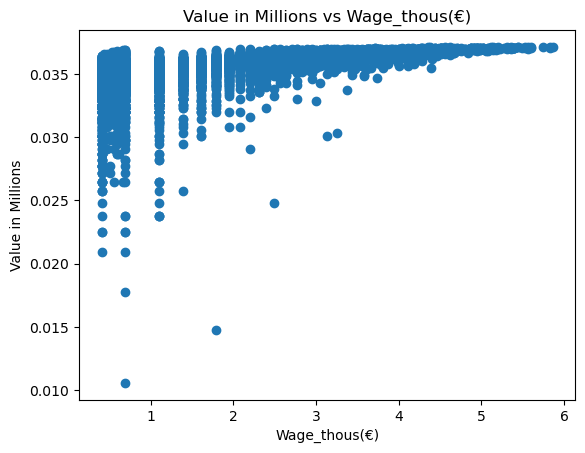

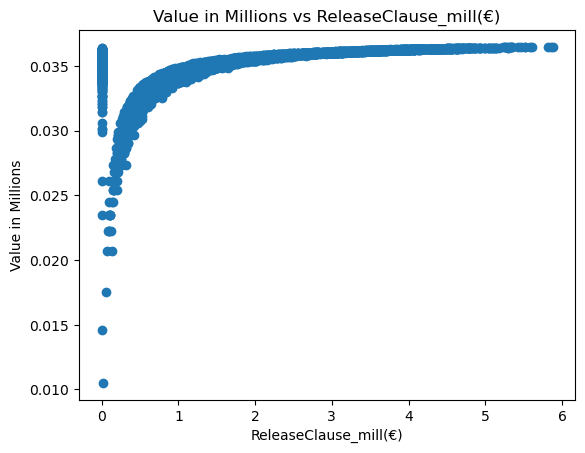

In [20]:
# Relation between the log transformed continuous variables with the Value_mill

dataset=data.copy()
for feature in Cont_features:
    dataset[feature]=np.log(dataset[feature]+1)
    dataset['Value_mill(€)']=np.log(dataset['Value_mill(€)']+1)
    plt.scatter(dataset[feature],dataset['Value_mill(€)'])
    plt.xlabel(feature)
    plt.ylabel('Value in Millions')
    plt.title(f'Value in Millions vs {feature}')
    plt.show()

In [21]:
## Comments on above graphs:


In [22]:
# Discrete Features:
Disc_features

['Age',
 'Growth',
 'Weak foot',
 'Skill moves',
 'International reputation',
 'Number of playstyles']

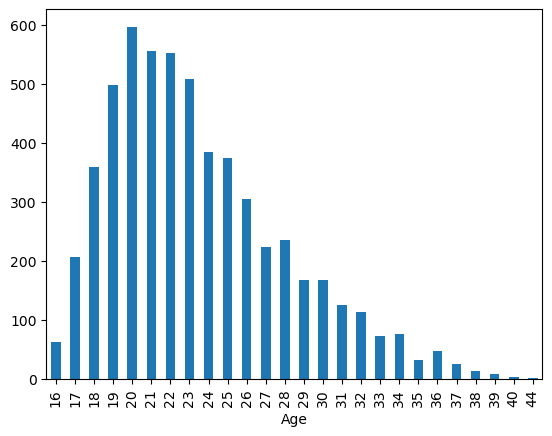

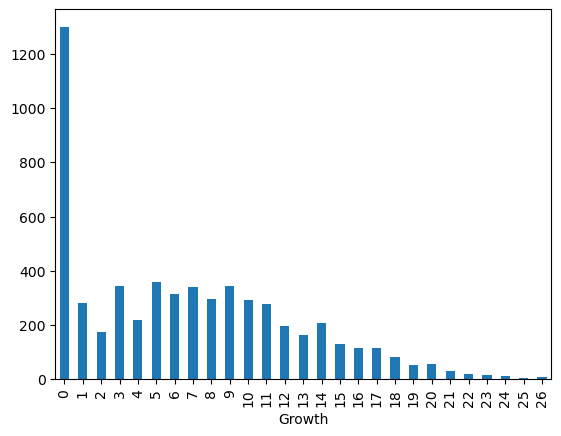

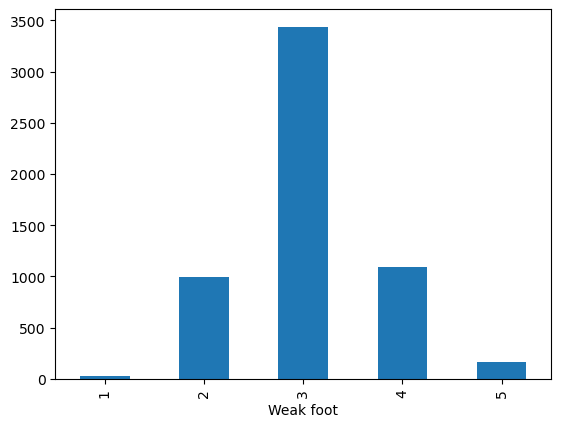

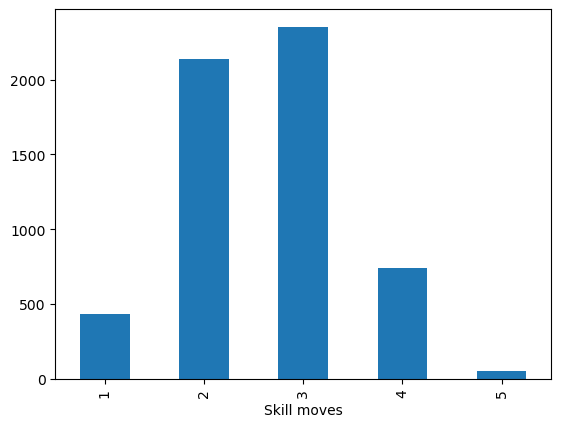

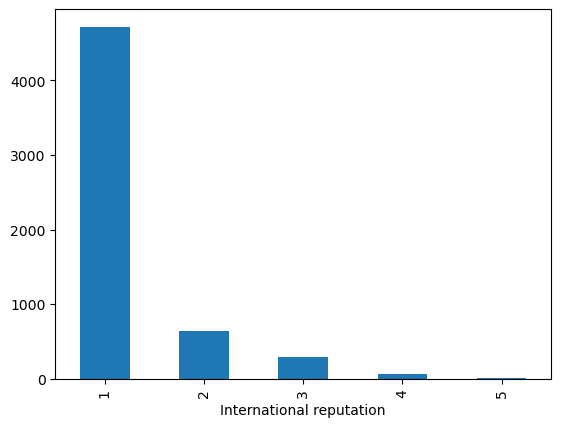

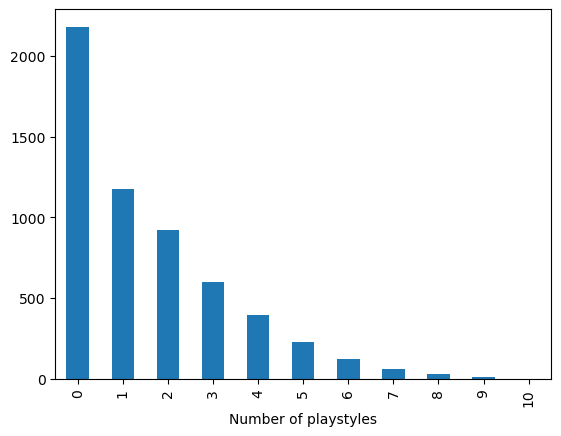

In [23]:
# Distribution of Discrete Features

for feature in Disc_features:
      (data.groupby(feature)[feature].count()).plot.bar()
#       data[feature].hist()
      plt.show()

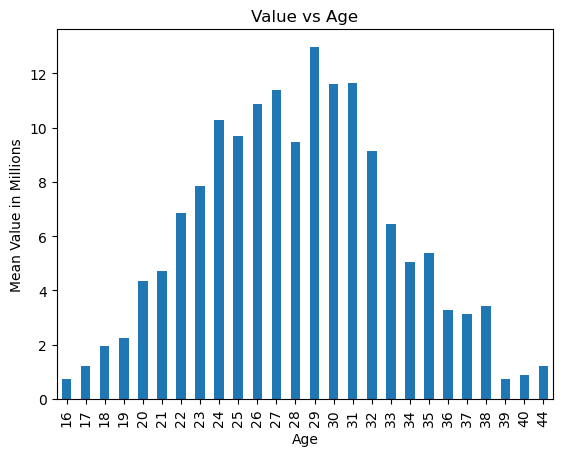

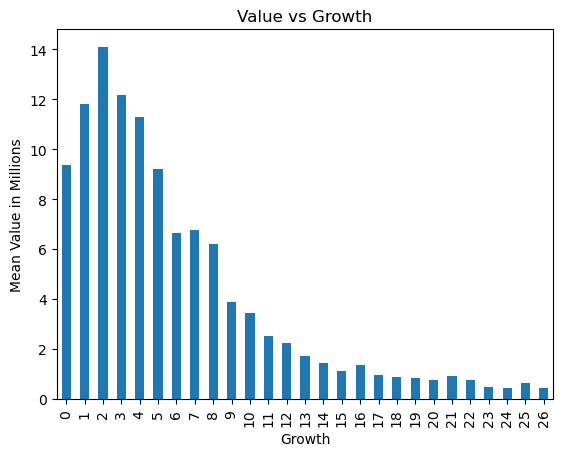

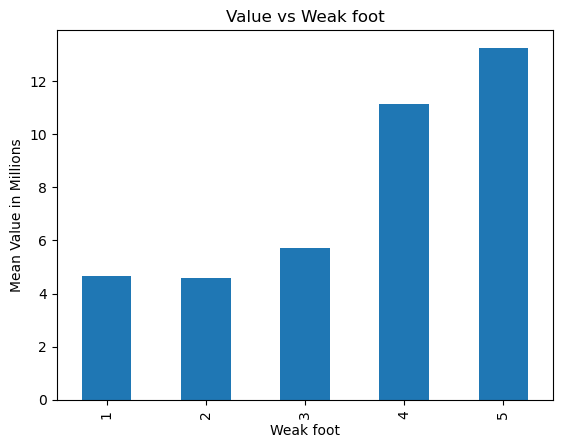

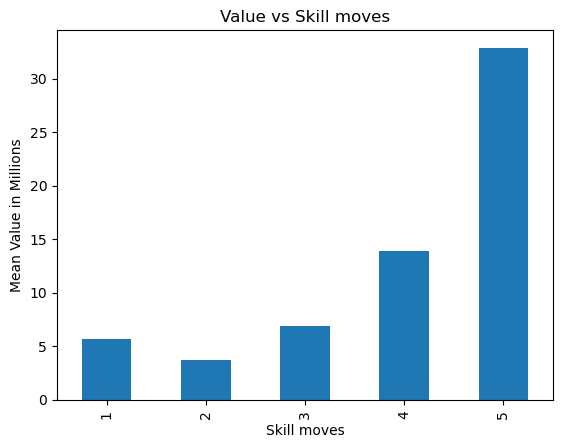

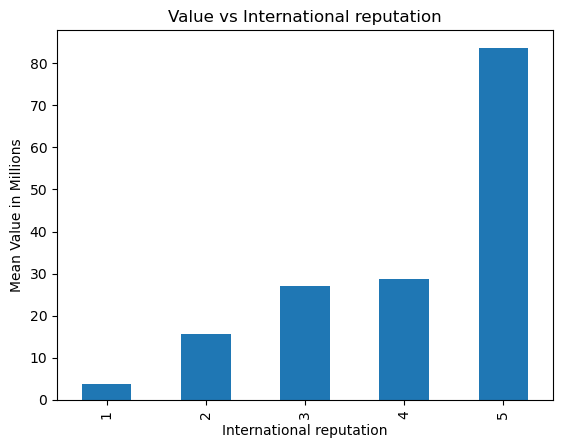

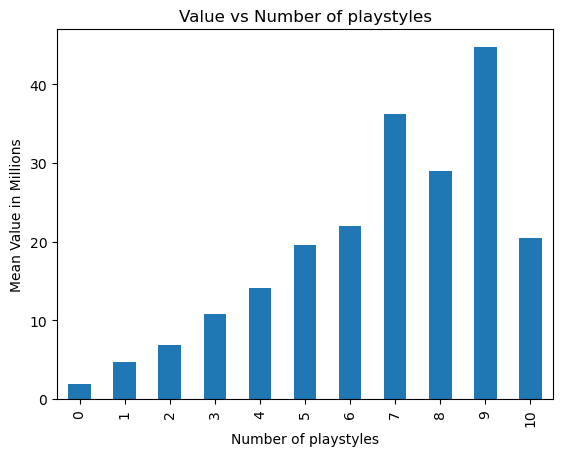

In [24]:
# Now, let's check the relationship between discrete variables and Value_mill
dataset=data.copy()
for feature in Disc_features:
    dataset.groupby(feature)['Value_mill(€)'].mean().plot.bar()
    plt.ylabel('Mean Value in Millions')
    plt.title('Value vs {}'.format(feature))
    plt.show()

In [25]:
# now I want to see the different market values of players who have the same values of one feature like the market
# value of each player having Age=16 then each who has age=17 and then 18 and so on and similarly for each discrete variable

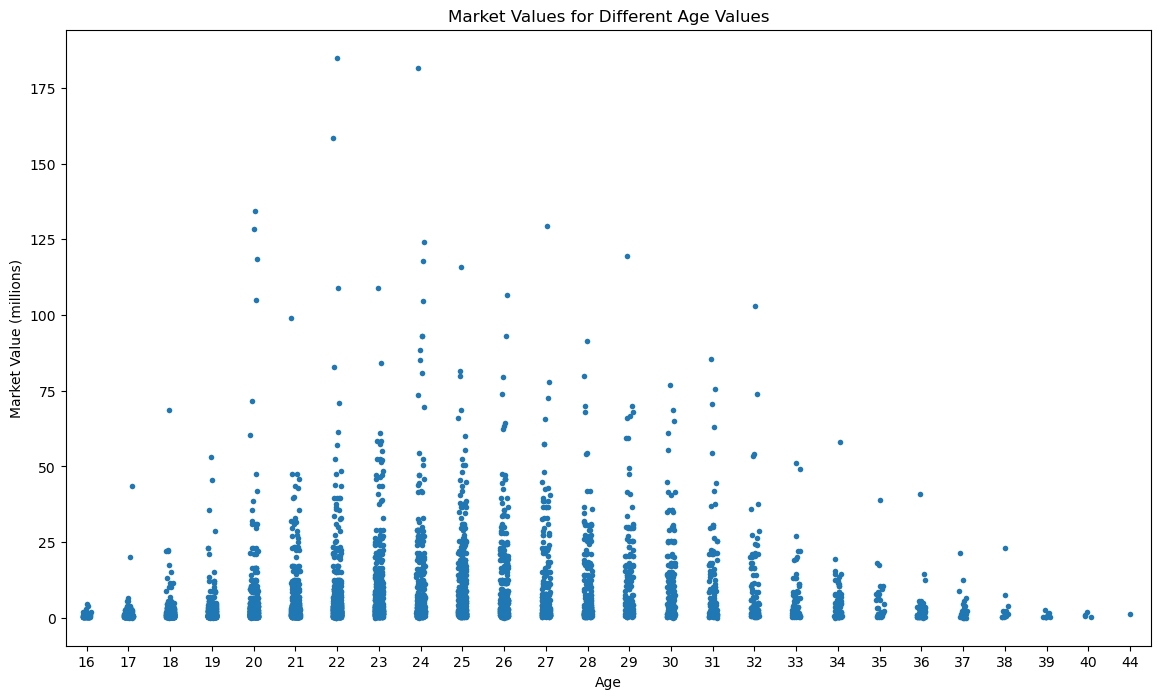

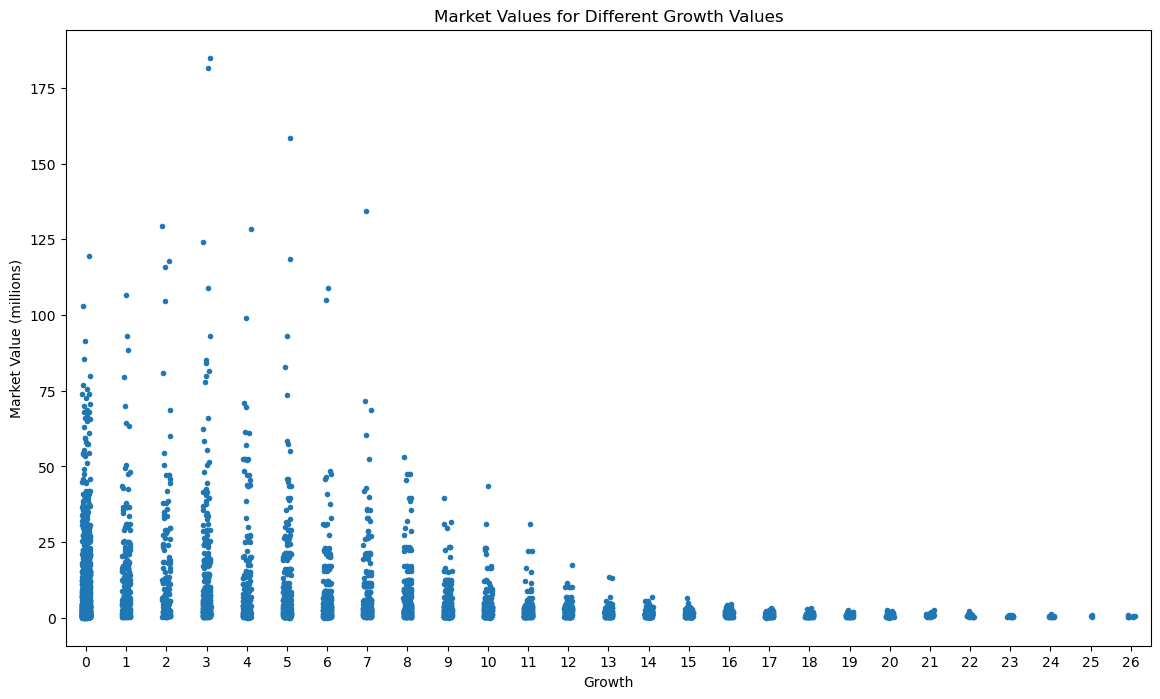

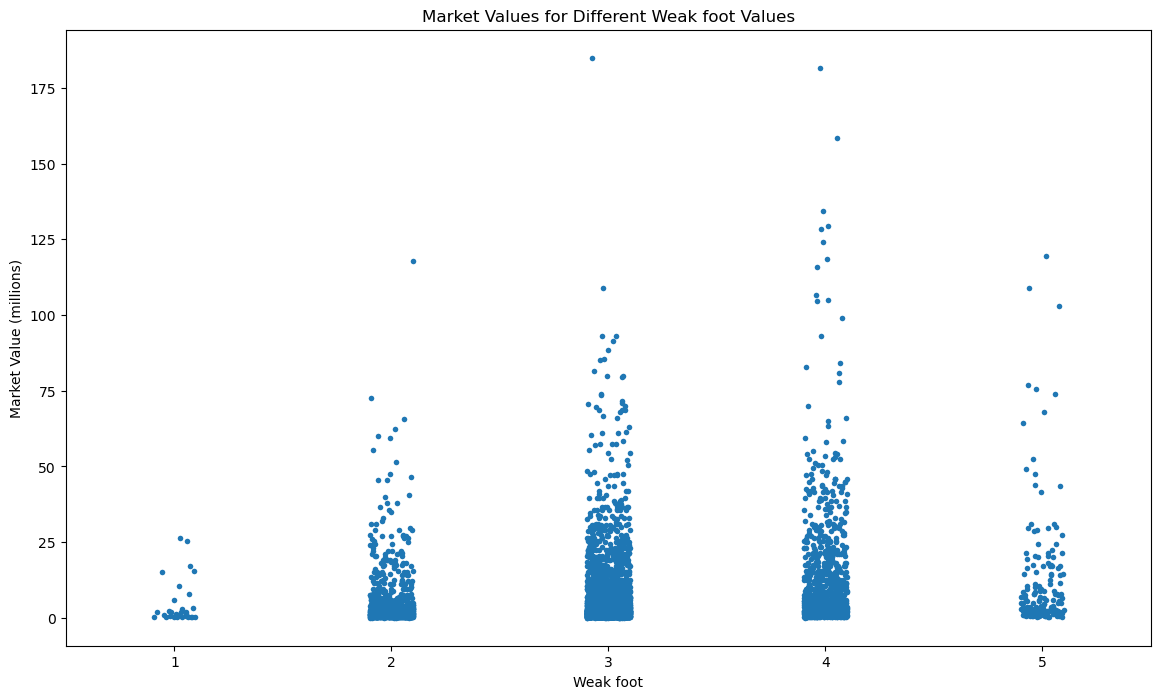

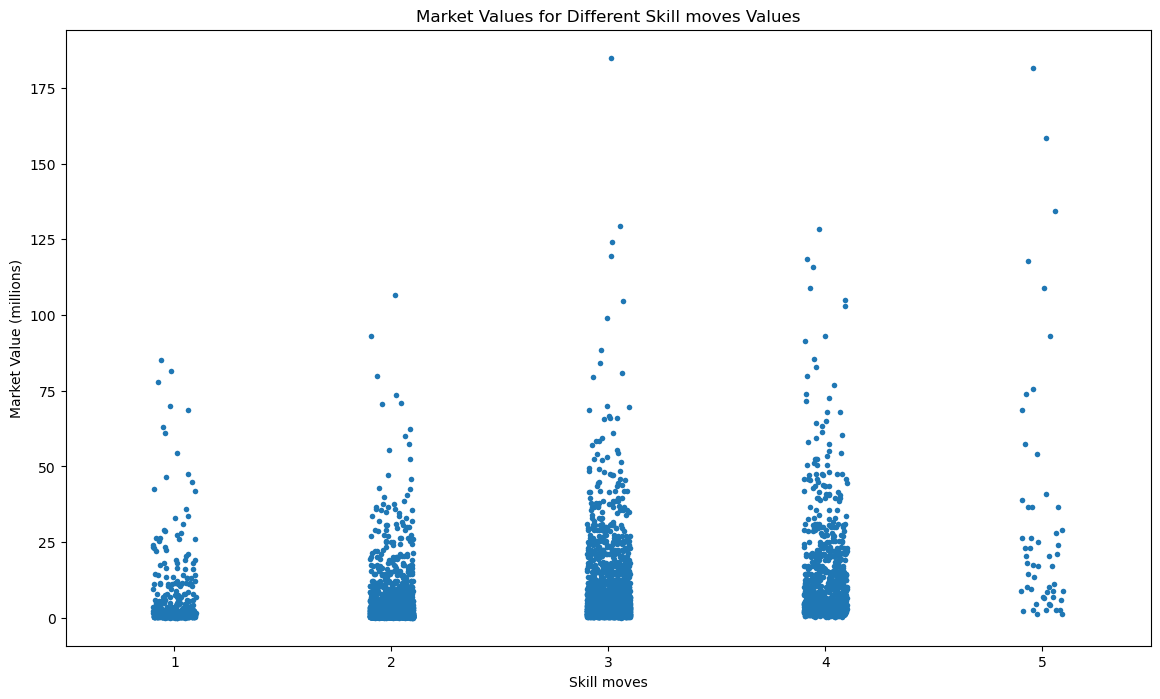

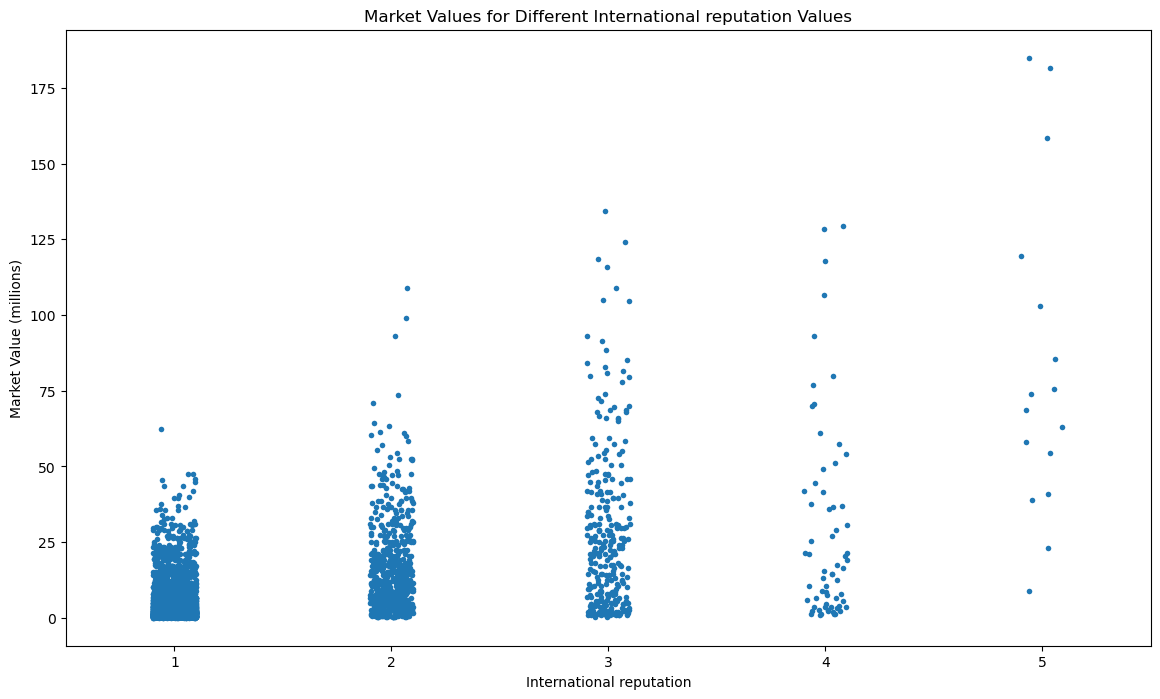

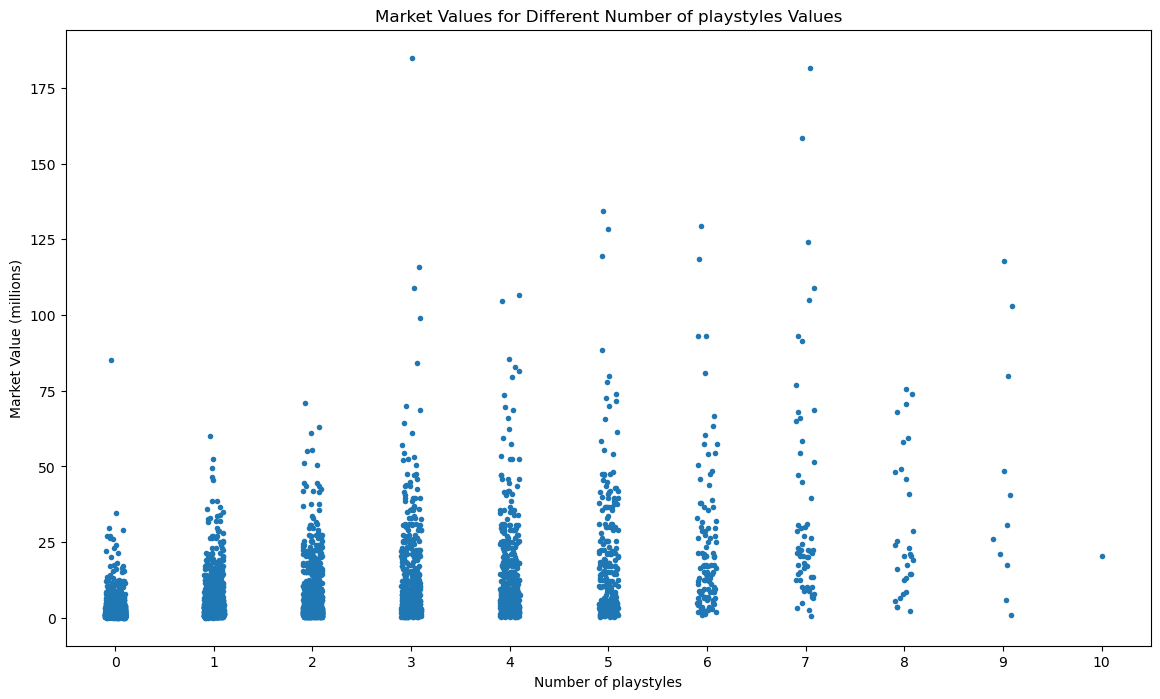

In [26]:
def generate(feature):
    plt.figure(figsize=(14, 8))
#     sns.boxplot(x=feature, y='Value_mill', data=fifa)
    sns.stripplot(data=data,x=feature,y='Value_mill(€)',jitter=True,size=4)
    plt.title(f'Market Values for Different {feature} Values')
    plt.xlabel(feature)
    plt.ylabel('Market Value (millions)')
#     plt.xticks(rotation=45)
    plt.show()


for feature in Disc_features:
    generate(feature)

In [27]:
data[(data['International reputation']>4) & (data['Value_mill(€)']<60)][['Name','Age','International reputation','Value_mill(€)']]

Name  Age  International reputation  Value_mill(€)
16    Cristiano Ronaldo   38                         5           23.0
55             L. Messi   36                         5           41.0
516          K. Benzema   35                         5           39.0
632      R. Lewandowski   34                         5           58.0
802       M. ter Stegen   31                         5           54.5
1496           M. Neuer   37                         5            9.0

In [28]:
# Categorical Features

Categoric_features=[feature for feature in data.columns if feature not in Numeric_features]

Categoric_features,len(Categoric_features)

(['Name',
  'ID',
  'foot',
  'Best position',
  'Joined',
  'Loan date end',
  'Attacking work rate',
  'Defensive work rate',
  'Body type',
  'PlayStyles',
  'PlayStyles +',
  'Team',
  'Contract'],
 13)

In [30]:

# No. of categories in each feature:

for feature in Categoric_features:
    print(feature)
    print(data[feature].nunique())

Name
5619
ID
5725
foot
2
Best position
15
Joined
1339
Loan date end
15
Attacking work rate
3
Defensive work rate
3
Body type
10
PlayStyles
1362
PlayStyles +
29
Team
764
Contract
171


In [31]:
# I only want those categorical features that do not have more than 29 categories
# I also don't want loan date end feature
Categoric_features_new=[]
for feature in Categoric_features:
    if data[feature].nunique()<=29 and feature!='Loan date end':
        print(feature)
        Categoric_features_new.append(feature)

foot
Best position
Attacking work rate
Defensive work rate
Body type
PlayStyles +


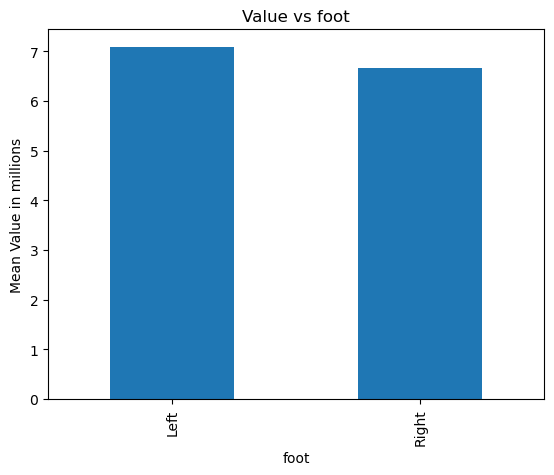

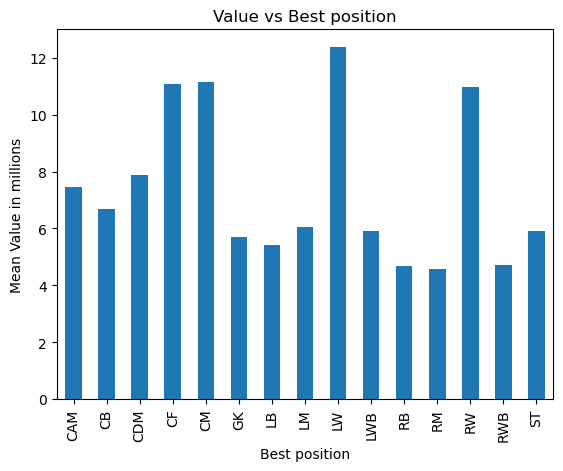

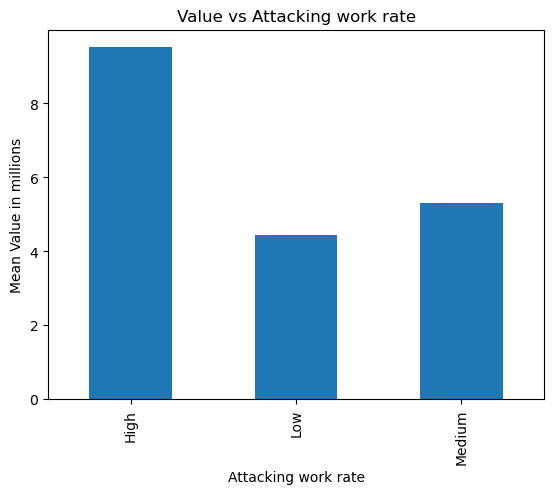

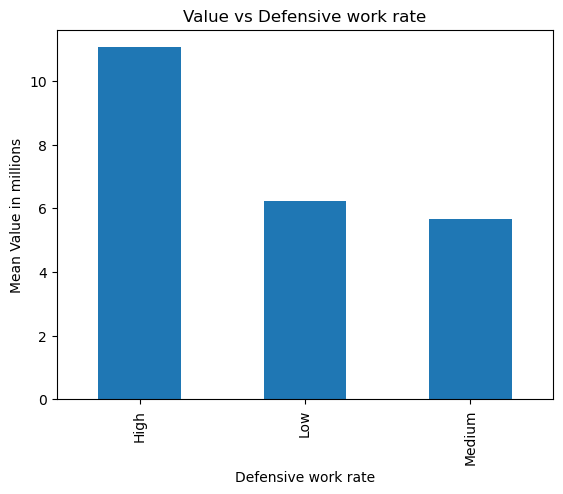

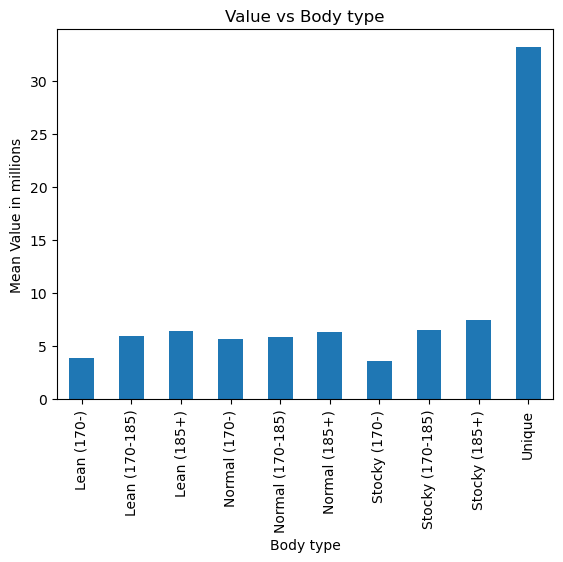

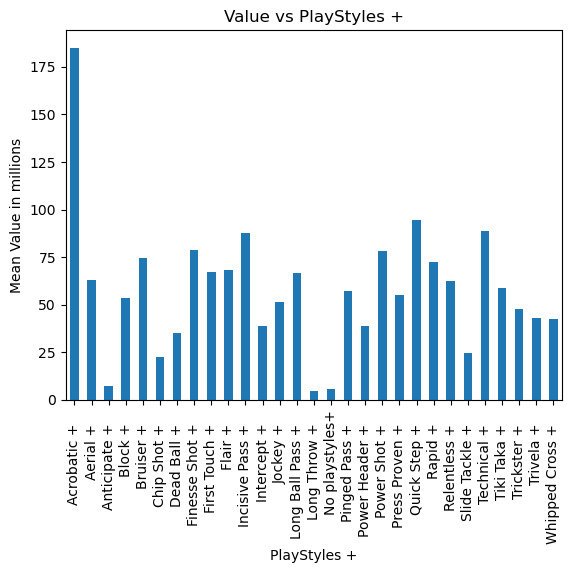

In [32]:
# Relationship between Categorical features_new and Value_mill

for feature in Categoric_features_new:
    data.groupby(feature)['Value_mill(€)'].mean().plot.bar()
    plt.ylabel('Mean Value in millions')
    plt.title('Value vs {}'.format(feature))
#     plt.xticks(rotation=60)
    plt.show()

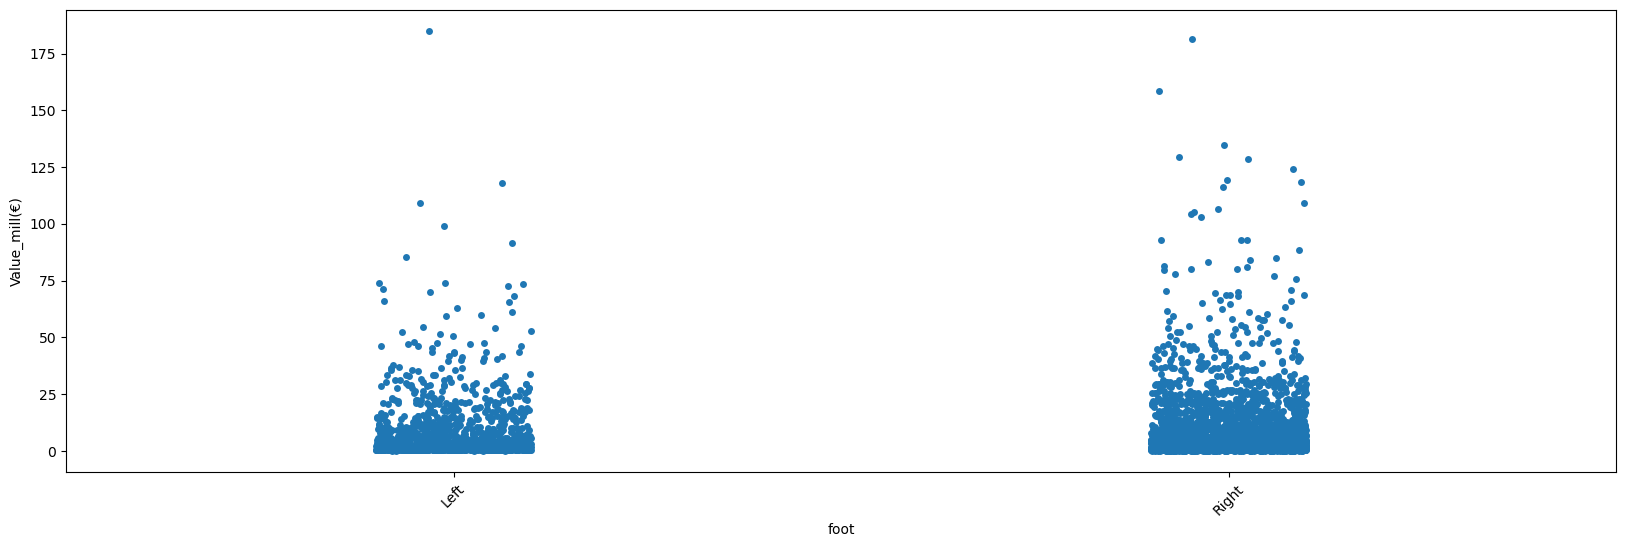

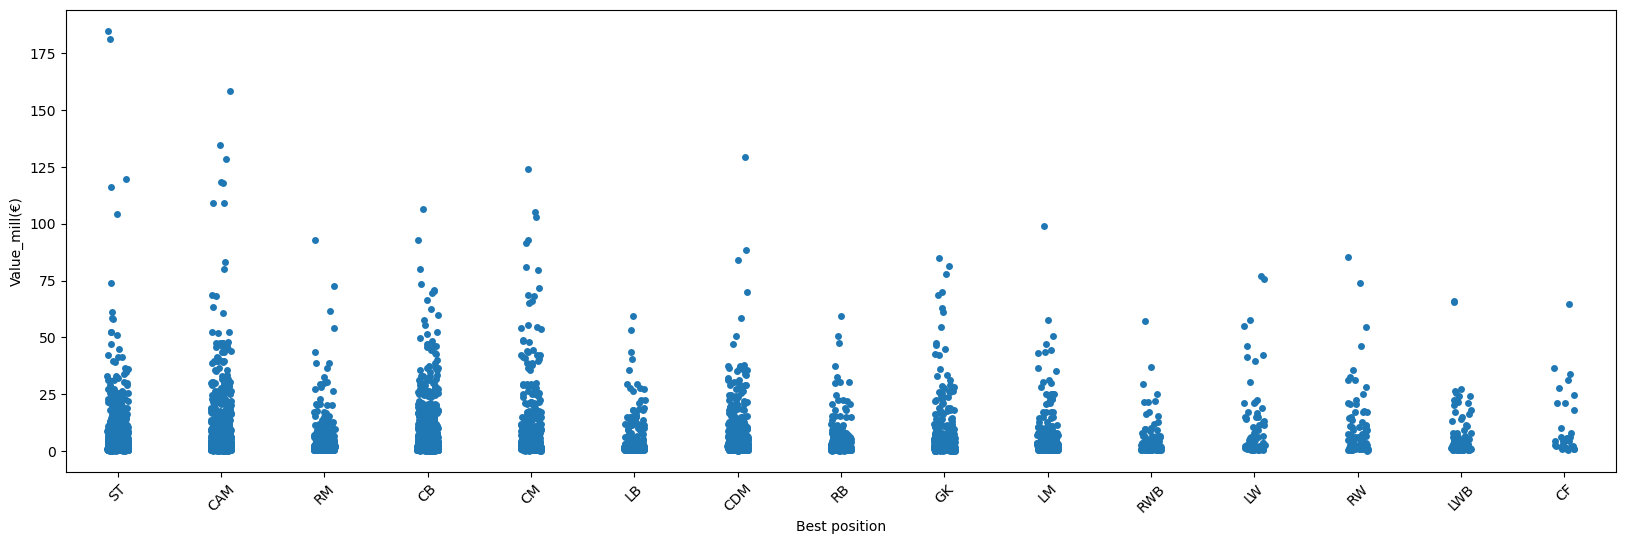

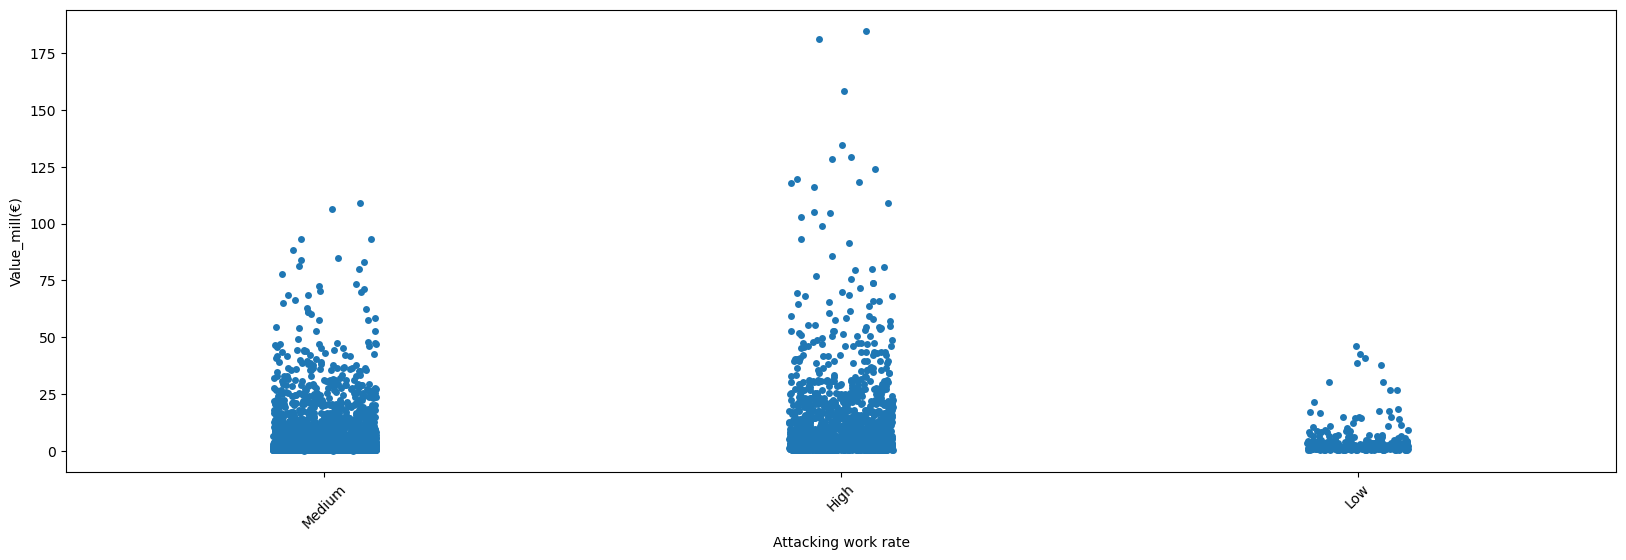

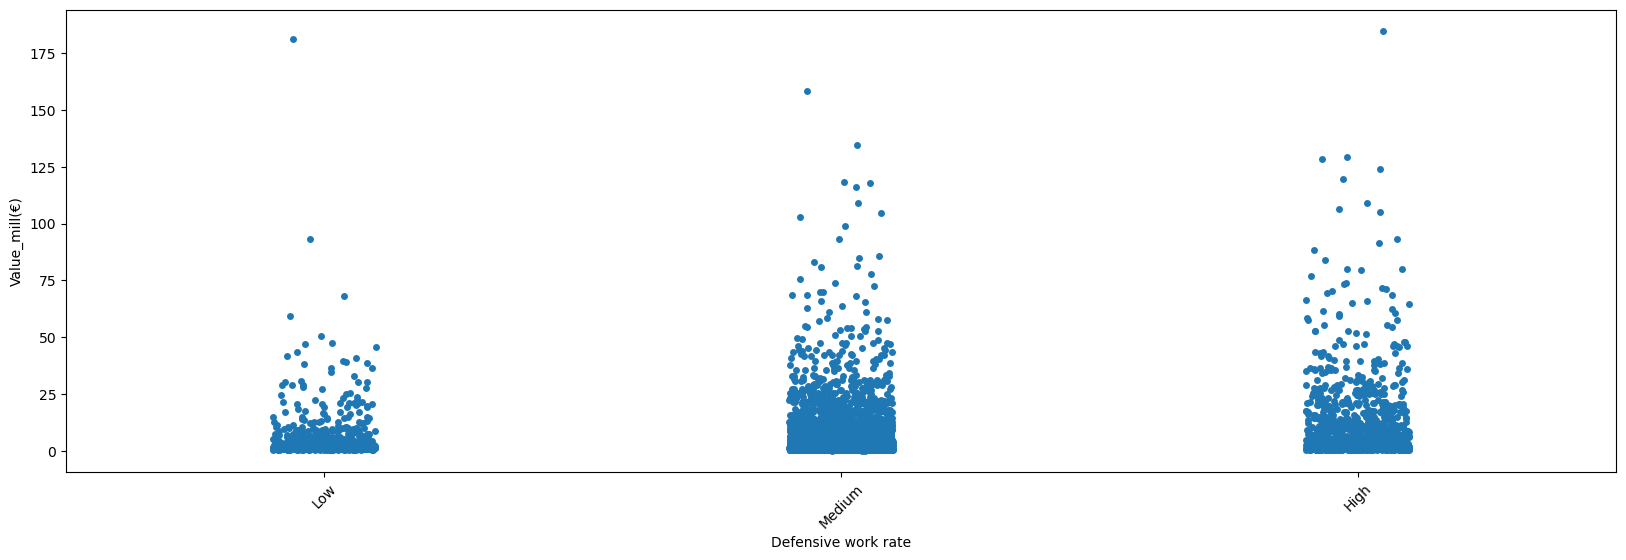

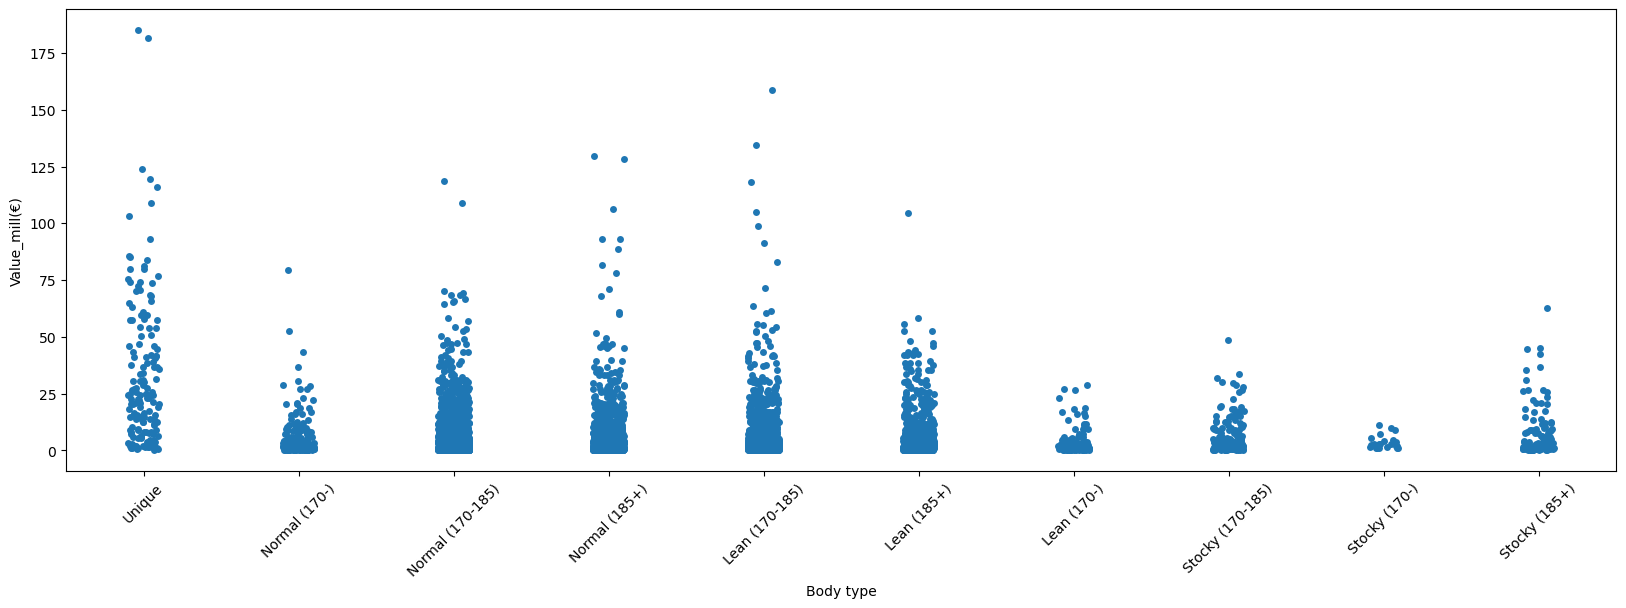

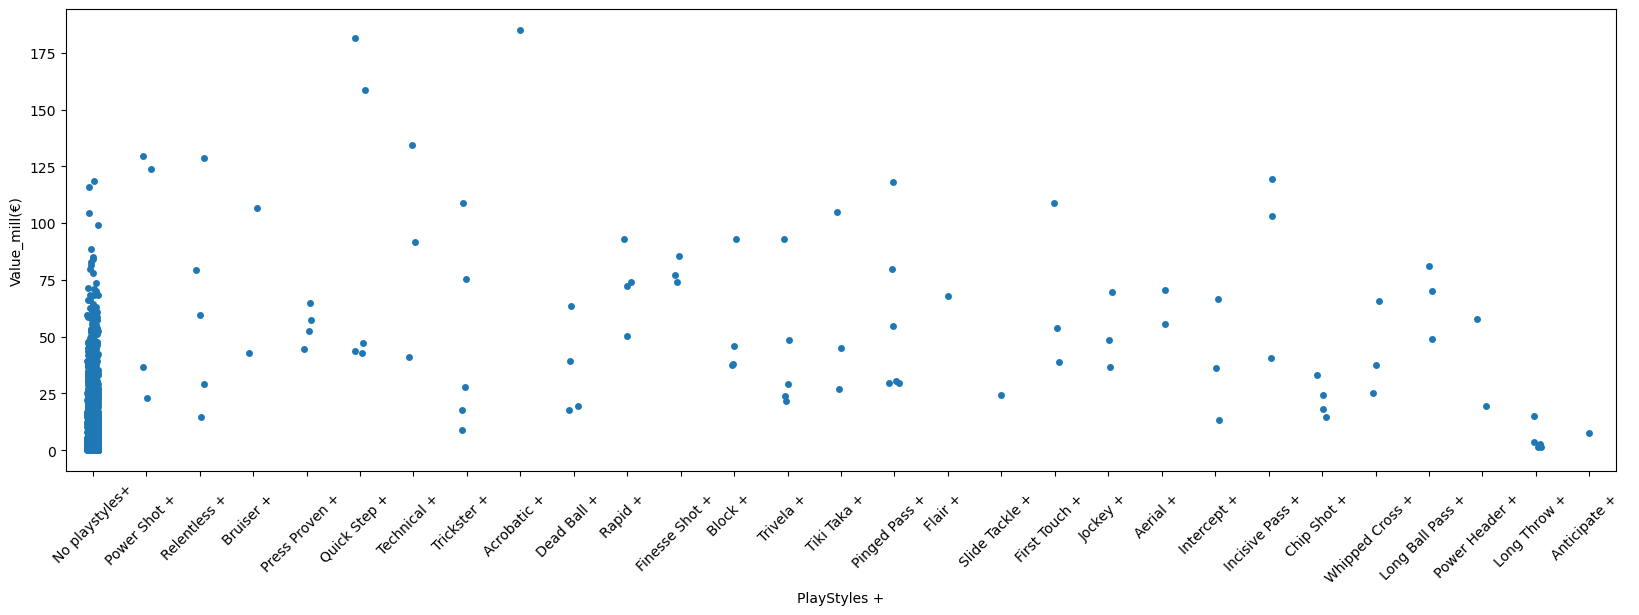

In [33]:
for feature in Categoric_features_new:
    plt.figure(figsize=(20,6))
    sns.stripplot(data=data,x=feature,y='Value_mill(€)',jitter=True)
    plt.xticks(rotation=45)
    plt.show()

In [34]:
data

Name  Age  Overall rating  Potential      ID  Height_cm  \
0         Y. Moukoko   18              77         87  240833        179   
1       M. El Arouch   19              66         81  269852        166   
2     Yang Min Hyeok   17              53         68   71106        171   
3             H. Ito   24              78         81  234205        188   
4        N. Mazraoui   25              81         83  236401        183   
...              ...  ...             ...        ...     ...        ...   
5720         R. Yapi   22              63         72  252707        178   
5721         B. Barr   22              54         57  252756        177   
5722  22 K. Ouattara   22              57         63  252772        174   
5723     K. Bąkowski   20              62         76  252783        190   
5724   R. Neshcheret   21              65         75  252789        190   

      Weight_kg   foot Best position  Growth        Joined Loan date end  \
0            72   Left            ST      10  Nov 20, 2020           NaN   
1            64  Right           CAM      15  May 10, 2022           NaN   
2            61  Right            RM      15  Dec 29, 2023           NaN   
3            84   Left            CB       3  May 20, 2022           NaN   
4            65  Right            RM       2   Jul 1, 2022           NaN   
...         ...    ...           ...     ...           ...           ...   
5720         70  Right            RB       9   Sep 1, 2023           NaN   
5721         71  Right           CAM       3  Feb 14, 2023           NaN   
5722         69   Left            LB       6   Jan 7, 2020           NaN   
5723         75  Right            GK      14   Feb 4, 2019  Jun 30, 2024   
5724         81  Right            GK      10   Jan 1, 2019           NaN   

      Total attacking  Crossing  Finishing  Heading accuracy  Short passing  \
0                 343        47         79                69             71   
1                 269        58         56                32             67   
2                 223        52         53                33             43   
3                 311        68         48                74             76   
4                 352        79         69                65             83   
...               ...       ...        ...               ...            ...   
5720              205        56         24                44             50   
5721              208        36         39                41             59   
5722              177        45         30                35             42   
5723               64         8          7                12             31   
5724               98        10          9                14             56   

      Volleys  Total skill  Dribbling  Curve  FK Accuracy  Long passing  \
0          77          318         79     68           42            48   
1          56          336         73     65           62            64   
2          42          224         61     44           31            37   
3          45          320         68     52           45            80   
4          56          354         83     69           42            76   
...       ...          ...        ...    ...          ...           ...   
5720       31          220         63     38           27            39   
5721       33          223         53     45           26            44   
5722       25          220         58     40           38            28   
5723        6           84         15     12           11            32   
5724        9          110         11     10           12            61   

      Ball control  Total movement  Acceleration  Sprint speed  Agility  \
0               81             409            82            79       85   
1               72             382            77            71       88   
2               51             331            67            70       72   
3               75             379            81    

In [38]:
#Dividing the contract column into two columns Start year and end year

# data=fifa.copy()
# data['ContStartYear']=data['Contract']
# data['ContEndYear']=data['Contract']
# for row in range (0,len(data['Contract'])):
#     data['ContStartYear'][row]=data['Contract'][row].split('~')[0]
#     data['ContEndYear'][row]=data['Contract'][row].split('~')[-1]


data = dataset.copy()

# Use the str.split() method to split the 'Contract' column into two new columns
data[['ContStartYear', 'ContEndYear']] = data['Contract'].str.replace(' ','').str.split('~', expand=True)
data.drop(columns='Contract',inplace=True)
data


Name  Age  Overall rating  Potential      ID  Height_cm  \
0         Y. Moukoko   18              77         87  240833        179   
1       M. El Arouch   19              66         81  269852        166   
2     Yang Min Hyeok   17              53         68   71106        171   
3             H. Ito   24              78         81  234205        188   
4        N. Mazraoui   25              81         83  236401        183   
...              ...  ...             ...        ...     ...        ...   
5719        E. López   22              67         74  252706        175   
5720         R. Yapi   22              63         72  252707        178   
5721         B. Barr   22              54         57  252756        177   
5722  22 K. Ouattara   22              57         63  252772        174   
5724   R. Neshcheret   21              65         75  252789        190   

      Weight_kg   foot Best position  Growth        Joined  Total attacking  \
0            72   Left            ST      10  Nov 20, 2020              343   
1            64  Right           CAM      15  May 10, 2022              269   
2            61  Right            RM      15  Dec 29, 2023              223   
3            84   Left            CB       3  May 20, 2022              311   
4            65  Right            RM       2   Jul 1, 2022              352   
...         ...    ...           ...     ...           ...              ...   
5719         76  Right            RM       7   Jan 8, 2024              267   
5720         70  Right            RB       9   Sep 1, 2023              205   
5721         71  Right           CAM       3  Feb 14, 2023              208   
5722         69   Left            LB       6   Jan 7, 2020              177   
5724         81  Right            GK      10   Jan 1, 2019               98   

      Crossing  Finishing  Heading accuracy  Short passing  Volleys  \
0           47         79                69             71       77   
1           58         56                32             67       56   
2           52         53                33             43       42   
3           68         48                74             76       45   
4           79         69                65             83       56   
...        ...        ...               ...            ...      ...   
5719        68         46                46             62       45   
5720        56         24                44             50       31   
5721        36         39                41             59       33   
5722        45         30                35             42       25   
5724        10          9                14             56        9   

      Total skill  Dribbling  Curve  FK Accuracy  Long passing  Ball control  \
0             318         79     68           42            48            81   
1             336         73     65           62            64            72   
2             224         61     44           31            37            51   
3             320         68     52           45            80            75   
4             354         83     69           42            76            84   
...           ...        ...    ...          ...           ...           ...   
5719          303         70     55           52            56            70   
5720          220         63     38           27            39            53   
5721          223         53     45           26            44            55   
5722          220         58     40           38            28            56   
5724          110         11     10           12            61            16   

      Total movement  Acceleration  Sprint speed  Agility  Reactions  Balance  \
0                409            82            79       85         77       86   
1                382            77            71       88         58       88   
2                331            67            70       72         39       83   
3                379        

In [39]:
data['ContEndYear']=data['ContEndYear'].astype(int)
data['ContStartYear']=data['ContStartYear'].astype(int)

In [40]:
data['ContractLength']=data['ContEndYear']-data['ContStartYear'].astype(int)

In [41]:
data['RemainingCont']=data['ContEndYear']-2024

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5048 entries, 0 to 5724
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      5048 non-null   object 
 1   Age                       5048 non-null   int64  
 2   Overall rating            5048 non-null   int64  
 3   Potential                 5048 non-null   int64  
 4   ID                        5048 non-null   int64  
 5   Height_cm                 5048 non-null   int64  
 6   Weight_kg                 5048 non-null   int64  
 7   foot                      5048 non-null   object 
 8   Best position             5048 non-null   object 
 9   Growth                    5048 non-null   int64  
 10  Joined                    5048 non-null   object 
 11  Total attacking           5048 non-null   int64  
 12  Crossing                  5048 non-null   int64  
 13  Finishing                 5048 non-null   int64  
 14  Heading accur

In [43]:
data

Name  Age  Overall rating  Potential      ID  Height_cm  \
0         Y. Moukoko   18              77         87  240833        179   
1       M. El Arouch   19              66         81  269852        166   
2     Yang Min Hyeok   17              53         68   71106        171   
3             H. Ito   24              78         81  234205        188   
4        N. Mazraoui   25              81         83  236401        183   
...              ...  ...             ...        ...     ...        ...   
5719        E. López   22              67         74  252706        175   
5720         R. Yapi   22              63         72  252707        178   
5721         B. Barr   22              54         57  252756        177   
5722  22 K. Ouattara   22              57         63  252772        174   
5724   R. Neshcheret   21              65         75  252789        190   

      Weight_kg   foot Best position  Growth        Joined  Total attacking  \
0            72   Left            ST      10  Nov 20, 2020              343   
1            64  Right           CAM      15  May 10, 2022              269   
2            61  Right            RM      15  Dec 29, 2023              223   
3            84   Left            CB       3  May 20, 2022              311   
4            65  Right            RM       2   Jul 1, 2022              352   
...         ...    ...           ...     ...           ...              ...   
5719         76  Right            RM       7   Jan 8, 2024              267   
5720         70  Right            RB       9   Sep 1, 2023              205   
5721         71  Right           CAM       3  Feb 14, 2023              208   
5722         69   Left            LB       6   Jan 7, 2020              177   
5724         81  Right            GK      10   Jan 1, 2019               98   

      Crossing  Finishing  Heading accuracy  Short passing  Volleys  \
0           47         79                69             71       77   
1           58         56                32             67       56   
2           52         53                33             43       42   
3           68         48                74             76       45   
4           79         69                65             83       56   
...        ...        ...               ...            ...      ...   
5719        68         46                46             62       45   
5720        56         24                44             50       31   
5721        36         39                41             59       33   
5722        45         30                35             42       25   
5724        10          9                14             56        9   

      Total skill  Dribbling  Curve  FK Accuracy  Long passing  Ball control  \
0             318         79     68           42            48            81   
1             336         73     65           62            64            72   
2             224         61     44           31            37            51   
3             320         68     52           45            80            75   
4             354         83     69           42            76            84   
...           ...        ...    ...          ...           ...           ...   
5719          303         70     55           52            56            70   
5720          220         63     38           27            39            53   
5721          223         53     45           26            44            55   
5722          220         58     40           38            28            56   
5724          110         11     10           12            61            16   

      Total movement  Acceleration  Sprint speed  Agility  Reactions  Balance  \
0                409            82            79       85         77       86   
1                382            77            71       88         58       88   
2                331            67            70       72         39       83   
3                379        

In [44]:
data['RemainingCont'].unique()

array([  2,   1,   3,   0,   4,   5,   7,   6,   8,  -2,  -1,  -4,  -6,
        -8,  -3,  -7,  -5, -11, -10,  -9])

In [45]:
data[data['RemainingCont']<0]

Name  Age  Overall rating  Potential      ID  Height_cm  \
804     22 J. Rodríguez   29              81         81  198710        180   
980           23 De Gea   31              87         87  193080        192   
1204     22 Fernandinho   36              81         81  135507        179   
1211     23 Diego Costa   33              75         75  179844        186   
1487        20 Casillas   38              79         79    5479        185   
...                 ...  ...             ...        ...     ...        ...   
5710        20 J. White   17              49         69  252584        188   
5711  21 C. King-Harmes   18              53         73  252585        182   
5713         20 C. Fath   18              50         67  252591        178   
5715    20 Lee Do Hyeon   23              52         61  252610        187   
5722     22 K. Ouattara   22              57         63  252772        174   

      Weight_kg   foot Best position  Growth        Joined  Total attacking  \
804          75   Left           CAM       0   Sep 7, 2020              409   
980          76  Right            GK       0   Jul 1, 2011              103   
1204         67  Right           CDM       0   Jul 1, 2013              356   
1211         87  Right            ST       0  Sep 12, 2022              360   
1487         84   Left            GK       0  Jul 12, 2015               85   
...         ...    ...           ...     ...           ...              ...   
5710         72   Left            CB      20   Jul 1, 2019              148   
5711         67  Right            RM      20   Jul 1, 2019              216   
5713         68   Left           CDM      17   Jul 1, 2019              206   
5715         79  Right            CB       9   Jan 4, 2019              149   
5722         69   Left            LB       6   Jan 7, 2020              177   

      Crossing  Finishing  Heading accuracy  Short passing  Volleys  \
804         89         84                62             84       90   
980         17         13                18             42       13   
1204        68         66                70             82       70   
1211        65         77                77             63       78   
1487        13         12                25             21       14   
...        ...        ...               ...            ...      ...   
5710        33         24                43             25       23   
5711        51         49                32             49       35   
5713        40         31                52             56       27   
5715        26         19                41             33       30   
5722        45         30                35             42       25   

      Total skill  Dribbling  Curve  FK Accuracy  Long passing  Ball control  \
804           436         86     89           86            85            90   
980           133         18     21           19            43            32   
1204          375         76     68           71            79            81   
1211          323         72     65           59            52            75   
1487          108         25     25           13            22            23   
...           ...        ...    ...          ...           ...           ...   
5710          179         53     30           32            29            35   
5711          220         55     43           30            39            53   
5713          210         46     38           35            42            49   
5715          140         30     30           22            23            35   
5722          220         58     40           38            28            56   

      Total movement  Acceleration  Sprint speed  Agility  Reactions  Balance  \
804              343            55            51       78         83       76   
980              282            47            45       63         87       40   
1204             345            66            52       68         82       7

In [46]:
# Some players have remaining contracts in negative
# They are old records
# I am removing them

dataset=data.copy()
dataset=dataset[dataset['RemainingCont']>=0]
dataset.reset_index(inplace=True)
dataset

index            Name  Age  Overall rating  Potential      ID  \
0         0      Y. Moukoko   18              77         87  240833   
1         1    M. El Arouch   19              66         81  269852   
2         2  Yang Min Hyeok   17              53         68   71106   
3         3          H. Ito   24              78         81  234205   
4         4     N. Mazraoui   25              81         83  236401   
...     ...             ...  ...             ...        ...     ...   
4703   5718    S. Nicholson   26              72         73  252692   
4704   5719        E. López   22              67         74  252706   
4705   5720         R. Yapi   22              63         72  252707   
4706   5721         B. Barr   22              54         57  252756   
4707   5724   R. Neshcheret   21              65         75  252789   

      Height_cm  Weight_kg   foot Best position  Growth        Joined  \
0           179         72   Left            ST      10  Nov 20, 2020   
1           166         64  Right           CAM      15  May 10, 2022   
2           171         61  Right            RM      15  Dec 29, 2023   
3           188         84   Left            CB       3  May 20, 2022   
4           183         65  Right            RM       2   Jul 1, 2022   
...         ...        ...    ...           ...     ...           ...   
4703        192         83  Right            ST       1   Jan 1, 2022   
4704        175         76  Right            RM       7   Jan 8, 2024   
4705        178         70  Right            RB       9   Sep 1, 2023   
4706        177         71  Right           CAM       3  Feb 14, 2023   
4707        190         81  Right            GK      10   Jan 1, 2019   

      Total attacking  Crossing  Finishing  Heading accuracy  Short passing  \
0                 343        47         79                69             71   
1                 269        58         56                32             67   
2                 223        52         53                33             43   
3                 311        68         48                74             76   
4                 352        79         69                65             83   
...               ...       ...        ...               ...            ...   
4703              327        53         75                69             65   
4704              267        68         46                46             62   
4705              205        56         24                44             50   
4706              208        36         39                41             59   
4707               98        10          9                14             56   

      Volleys  Total skill  Dribbling  Curve  FK Accuracy  Long passing  \
0          77          318         79     68           42            48   
1          56          336         73     65           62            64   
2          42          224         61     44           31            37   
3          45          320         68     52           45            80   
4          56          354         83     69           42            76   
...       ...          ...        ...    ...          ...           ...   
4703       65          291         69     48           56            51   
4704       45          303         70     55           52            56   
4705       31          220         63     38           27            39   
4706       33          223         53     45           26            44   
4707        9          110         11     10           12            61   

      Ball control  Total movement  Acceleration  Sprint speed  Agility  \
0               81             409            82            79       85   
1               72             382            77            71       88   
2               51             331            67            70       72   
3               75             379            81            81       66   
4               84             393            83   

In [47]:
## Now there are only 4708 players

In [49]:
dataset.to_csv('SoFifa_data_new.csv')